In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# original sentences

In [2]:
all_sentences = pd.read_csv('/home/congress-user/data_collection/tokenized_sentences.csv')
all_sentences = all_sentences.drop(columns=['Unnamed: 0'])
all_sentences = all_sentences.dropna()
all_sentences['date'] = pd.to_datetime(all_sentences['date'])
all_sentences

date hearing_num  \
0       2002-09-26     107-130   
1       2002-09-26     107-130   
2       2002-09-26     107-130   
3       2002-09-26     107-130   
4       2002-09-26     107-130   
...            ...         ...   
2988724 2019-09-19      116-62   
2988725 2019-09-19      116-62   
2988726 2019-09-19      116-62   
2988727 2019-09-19      116-62   
2988728 2019-09-19      116-62   

                                                 sentences  \
0                                                      Hon   
1        Clifford Stearns Chairman Subcommittee on     ...   
2        I am pleased to welcome you all especially our...   
3        This hearing is one of a number of hearings th...   
4        The others hearings have included examinations...   
...                                                    ...   
2988724                                         Ms DeGette   
2988725  I want to thank the witnesses for coming today...   
2988726  I ask that the witnesses agree to respond prom...   
2988727  Whereupon at 1247 pm the subcommittee was adjo...   
2988728  Material submitted for inclusion in the record...   

                                                    tokens  
0                                                  ['Hon']  
1        ['Clifford', 'Stearns', 'Chairman', 'Subcommit...  
2        ['I', 'am', 'pleased', 'to', 'welcome', 'you',...  
3        ['This', 'hearing', 'is', 'one', 'of', 'a', 'n...  
4        ['The', 'others', 'hearings', 'have', 'include...  
...                                                    ...  
2988724                                  ['Ms', 'DeGette']  
2988725  ['I', 'want', 'to', 'thank', 'the', 'witnesses...  
2988726  ['I', 'ask', 'that', 'the', 'witnesses', 'agre...  
2988727  ['Whereupon', 'at', '1247', 'pm', 'the', 'subc...  
2988728  ['Material', 'submitted', 'for', 'inclusion', ...  

[2985451 rows x 4 columns]

In [3]:
all_sentences['date'].describe()

/tmp/ipykernel_247990/2955700118.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  all_sentences['date'].describe()


count                 2985451
unique                   1037
top       2009-04-21 00:00:00
freq                    16272
first     2001-02-08 00:00:00
last      2023-02-08 00:00:00
Name: date, dtype: object

# 100 keyword filtered sentences

In [4]:
keyword_list = pd.read_csv('/home/congress-user/data_collection/EDA/word_list/word_list.csv',header=None)
keyword_list = keyword_list.rename(columns={0:'keyword'})
keyword_list

keyword
0            shale
1     conservation
2        megawatts
3   desalinization
4           biogas
..             ...
95            fuel
96     exhaustible
97      desalinate
98         ethanol
99      feedstocks

[100 rows x 1 columns]

In [5]:
filtered_df = all_sentences.copy()
filtered_df = filtered_df[filtered_df['sentences'].str.lower().str.contains(fr"\b(?:{'|'.join(keyword_list['keyword'].values)})\b")]
filtered_df['sentences'] = filtered_df['sentences'].replace(r'\s+', ' ', regex=True)
filtered_df

date hearing_num  \
94      2002-09-26     107-130   
287     2002-09-26     107-130   
509     2002-09-26     107-130   
511     2002-09-26     107-130   
557     2002-09-26     107-130   
...            ...         ...   
2985903 2019-10-16      116-69   
2986395 2019-10-16      116-69   
2986406 2019-10-16      116-69   
2986418 2019-10-16      116-69   
2986604 2019-10-16      116-69   

                                                 sentences  \
94       Billy Tauzin Chairman Committee on Energy and ...   
287      James Madison wrote Such a use of the power by...   
509      In Central Hudson Gas Electric versus Public S...   
511      Such a law would help to mitigate the special ...   
557      This strange confluence is a product of raw lo...   
...                                                    ...   
2985903  I think this is a really important area to sho...   
2986395  About 20 years ago I harnessed the power of th...   
2986406  This time however the foundation received an e...   
2986418  I think it is important to understand the work...   
2986604  I think I just said courts do have the power o...   

                                                    tokens  
94       ['Billy', 'Tauzin', 'Chairman', 'Committee', '...  
287      ['James', 'Madison', 'wrote', 'Such', 'a', 'us...  
509      ['In', 'Central', 'Hudson', 'Gas', 'Electric',...  
511      ['Such', 'a', 'law', 'would', 'help', 'to', 'm...  
557      ['This', 'strange', 'confluence', 'is', 'a', '...  
...                                                    ...  
2985903  ['I', 'think', 'this', 'is', 'a', 'really', 'i...  
2986395  ['About', '20', 'years', 'ago', 'I', 'harnesse...  
2986406  ['This', 'time', 'however', 'the', 'foundation...  
2986418  ['I', 'think', 'it', 'is', 'important', 'to', ...  
2986604  ['I', 'think', 'I', 'just', 'said', 'courts', ...  

[159492 rows x 4 columns]

# relevancy classifier result

In [6]:
relevancy_result = pd.read_csv('/home/congress-user/data_collection/Result Analysis/relevancy_full_labeled.csv')
relevancy_result

id        date hearing_num  \
0           557  2002-09-26     107-130   
1          1317  2002-02-13      107-82   
2          1308  2002-02-13      107-82   
3           511  2002-09-26     107-130   
4            94  2002-09-26     107-130   
...         ...         ...         ...   
159487  2984834  2019-10-16      116-69   
159488  2986406  2019-10-16      116-69   
159489  2986418  2019-10-16      116-69   
159490  2986395  2019-10-16      116-69   
159491  2986604  2019-10-16      116-69   

                                                 sentence label  
0       This strange confluence is a product of raw lo...     i  
1       We still need these capitalintensive projects ...     r  
2       During our experience last year on the Western...     r  
3       Such a law would help to mitigate the special ...     i  
4       Billy Tauzin Chairman Committee on Energy and ...     i  
...                                                   ...   ...  
159487  It is important to understand that rather than...     i  
159488  This time however the foundation received an e...     i  
159489  I think it is important to understand the work...     i  
159490  About 20 years ago I harnessed the power of th...     i  
159491  I think I just said courts do have the power o...     i  

[159492 rows x 5 columns]

In [7]:
# generate inc/dec dataset
# relevancy_result = relevancy_result[relevancy_result['label'] == 'r']
# relevancy_result = relevancy_result.drop(columns=['label'])
# relevancy_result.to_csv('IncDec_full_unlabeled.csv')
# relevancy_result

# inc_dec result

In [8]:
incdec_result = pd.read_csv('/home/congress-user/data_collection/Result Analysis/IncDec_full_labeled.csv')
incdec_result

id        date hearing_num  \
0          1309  2002-02-13      107-82   
1          1292  2002-02-13      107-82   
2          1317  2002-02-13      107-82   
3          1289  2002-02-13      107-82   
4          1535  2002-02-13      107-82   
...         ...         ...         ...   
122551  2984302  2019-04-02      116-20   
122552  2984284  2019-04-02      116-20   
122553  2984311  2019-04-02      116-20   
122554  2985903  2019-10-16      116-69   
122555  2984312  2019-04-02      116-20   

                                                 sentence label  
0       And since nearly everybody in town tells me th...     d  
1       The biggest marketmaker in both electricity an...     n  
2       We still need these capitalintensive projects ...     d  
3       We knew energy markets worked but I think we w...     n  
4       The result has been an overall decline in the ...     p  
...                                                   ...   ...  
122551  I think as Ranking Member Shimkus said earlier...     d  
122552  Fortunately you know for the Shell petrol chem...     p  
122553  They include a report by the University of Mon...     p  
122554  I think this is a really important area to sho...     n  
122555  Now Their Jobs Are in Renewables an article fr...     d  

[122556 rows x 5 columns]

# measure construction

In [9]:
hearing_dates = all_sentences[['date','hearing_num']].drop_duplicates().sort_values(by=['date','hearing_num'])
hearing_dates

date hearing_num
92993   2001-02-08       107-4
191518  2001-02-14      107-25
391882  2001-02-15       107-1
169634  2001-02-15       107-7
286952  2001-02-28      107-11
...            ...         ...
2726397 2021-07-29      117-47
1244730 2023-02-01       118-2
1238086 2023-02-01       118-3
1242698 2023-02-02       118-5
1239571 2023-02-08       118-8

[1510 rows x 2 columns]

In [10]:
# merging results
df1 = all_sentences.groupby(by=['hearing_num'])['sentences'].count().reset_index()
df1 = df1.rename(columns={'sentences':'sentence_count'})

df2 = filtered_df.groupby(by=['hearing_num'])['sentences'].count().reset_index()
df2 = df2.rename(columns={'sentences':'keyword_count'})

df3 = relevancy_result[relevancy_result['label'] == 'i'].groupby(by=['hearing_num'])['sentence'].count().reset_index()
df3 = df3.rename(columns={'sentence':'irrel_count'})

df4 = relevancy_result[relevancy_result['label'] == 'r'].groupby(by=['hearing_num'])['sentence'].count().reset_index()
df4 = df4.rename(columns={'sentence':'rel_count'})

df5 = incdec_result[incdec_result['label'] == 'n'].groupby(by=['hearing_num'])['sentence'].count().reset_index()
df5 = df5.rename(columns={'sentence':'neutral_count'})

df6 = incdec_result[incdec_result['label'] == 'p'].groupby(by=['hearing_num'])['sentence'].count().reset_index()
df6 = df6.rename(columns={'sentence':'inc_count'})

df7 = incdec_result[incdec_result['label'] == 'd'].groupby(by=['hearing_num'])['sentence'].count().reset_index()
df7 = df7.rename(columns={'sentence':'dec_count'})

# result frame basics
result_df = df1.merge(df2, on='hearing_num', how='left').merge(df3, on='hearing_num', how='left').merge(df4, on='hearing_num', how='left').merge(df5, on='hearing_num', how='left').merge(df6, on='hearing_num', how='left').merge(df7, on='hearing_num', how='left')
result_df = result_df.fillna(0)
result_df['sentence_count'] = result_df['sentence_count'].astype(int)
result_df['keyword_count'] = result_df['keyword_count'].astype(int)
result_df['irrel_count'] = result_df['irrel_count'].astype(int)
result_df['rel_count'] = result_df['rel_count'].astype(int)
result_df['neutral_count'] = result_df['neutral_count'].astype(int)
result_df['inc_count'] = result_df['inc_count'].astype(int)
result_df['dec_count'] = result_df['dec_count'].astype(int)
result_df = result_df.merge(hearing_dates,on='hearing_num',how='left')
result_df['date'] = pd.to_datetime(result_df['date'])
result_df['year'] = result_df['date'].dt.to_period('Y')
result_df['month'] = result_df['date'].dt.to_period('M')
result_df['quarter'] = result_df['date'].dt.to_period('Q')

# indicator calculators
result_df['keyword_pct'] = result_df['keyword_count']*100/result_df['sentence_count']
result_df['relevancy_pct'] = result_df['rel_count']*100/result_df['sentence_count']
result_df['neutral_pct'] = result_df['neutral_count']*100/result_df['sentence_count']
result_df['inc_pct'] = result_df['inc_count']*100/result_df['sentence_count']
result_df['dec_pct'] = result_df['dec_count']*100/result_df['sentence_count']
result_df['inc_dec_diff'] = (result_df['inc_count']-result_df['dec_count'])*100/result_df['rel_count']
result_df = result_df.fillna(0)

# result_df[['date','quarter','month','hearing_num','sentence_count','keyword_count','irrel_count',
#            'rel_count','neutral_count','inc_count','dec_count',
#            'keyword_pct','relevancy_pct','neutral_pct','inc_pct','dec_pct','inc_dec_diff']].to_csv('measures.csv')
result_df

hearing_num  sentence_count  keyword_count  irrel_count  rel_count  \
0        107-017            3080             42            2         40   
1          107-1            2606             18           15          3   
2         107-10            3284           1100           90       1010   
3        107-100            1832             16           14          2   
4        107-101            3326             10            9          1   
...          ...             ...            ...          ...        ...   
1505       117-9            2820              3            3          0   
1506       118-2            2902              7            7          0   
1507       118-3            1485             28           12         16   
1508       118-5            2032             12           10          2   
1509       118-8            3127             28           12         16   

      neutral_count  inc_count  dec_count       date  year    month quarter  \
0                30          0         10 2001-03-07  2001  2001-03  2001Q1   
1                 3          0          0 2001-02-15  2001  2001-02  2001Q1   
2               409        211        390 2001-03-27  2001  2001-03  2001Q1   
3                 1          1          0 2002-03-13  2002  2002-03  2002Q1   
4                 1          0          0 2002-04-17  2002  2002-04  2002Q2   
...             ...        ...        ...        ...   ...      ...     ...   
1505              0          0          0 2021-03-02  2021  2021-03  2021Q1   
1506              0          0          0 2023-02-01  2023  2023-02  2023Q1   
1507              2          3         11 2023-02-01  2023  2023-02  2023Q1   
1508              0          1          1 2023-02-02  2023  2023-02  2023Q1   
1509              7          2          7 2023-02-08  2023  2023-02  2023Q1   

      keyword_pct  relevancy_pct  neutral_pct   inc_pct    dec_pct  \
0        1.363636       1.298701     0.974026  0.000000   0.324675   
1        0.690714       0.115119     0.115119  0.000000   0.000000   
2       33.495737      30.755177    12.454324  6.425091  11.875761   
3        0.873362       0.109170     0.054585  0.054585   0.000000   
4        0.300661       0.030066     0.030066  0.000000   0.000000   
...           ...            ...          ...       ...        ...   
1505     0.106383       0.000000     0.000000  0.000000   0.000000   
1506     0.241213       0.000000     0.000000  0.000000   0.000000   
1507     1.885522       1.077441     0.134680  0.202020   0.740741   
1508     0.590551       0.098425     0.000000  0.049213   0.049213   
1509     0.895427       0.511673     0.223857  0.063959   0.223857   

      inc_dec_diff  
0       -25.000000  
1         0.000000  
2       -17.722772  
3        50.000000  
4         0.000000  
...            ...  
1505      0.000000  
1506      0.000000  
1507    -50.000000  
1508      0.000000  
1509    -31.250000  

[1510 rows x 18 columns]

## distribution analysis

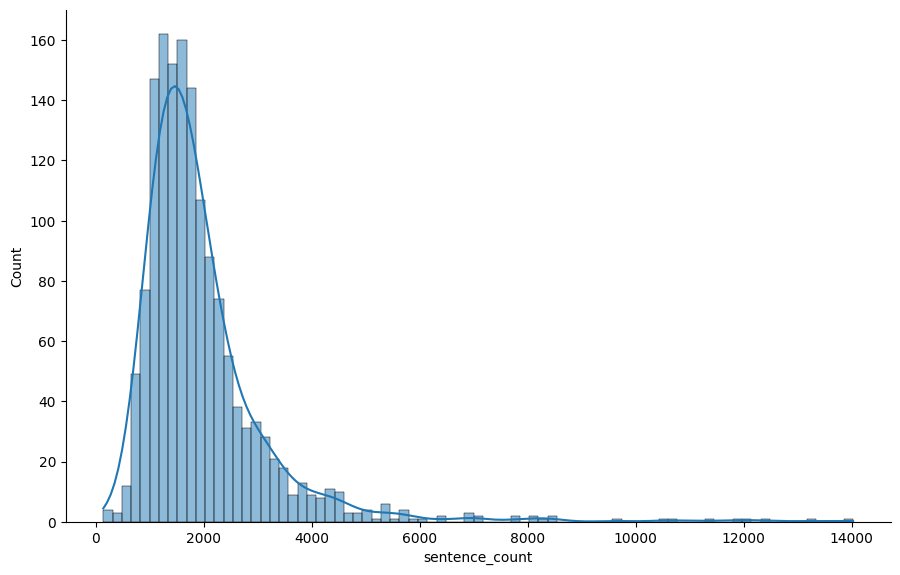

In [11]:
g = sns.displot(result_df['sentence_count'], kde=True)
g.fig.set_size_inches(10,6)

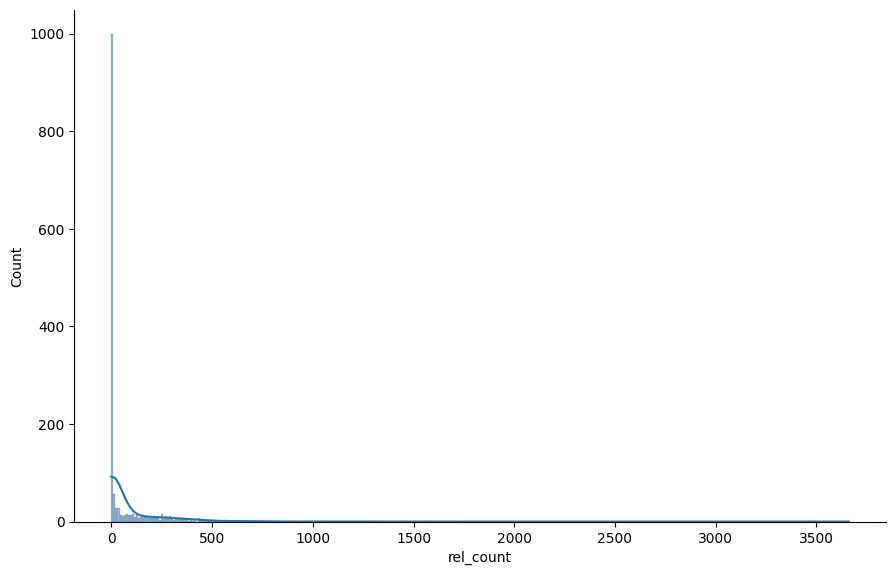

In [67]:
g = sns.displot(result_df['rel_count'], kde=True)
g.fig.set_size_inches(10,6)

Text(0.5, 1.0, 'inc_dec_diff distribution')

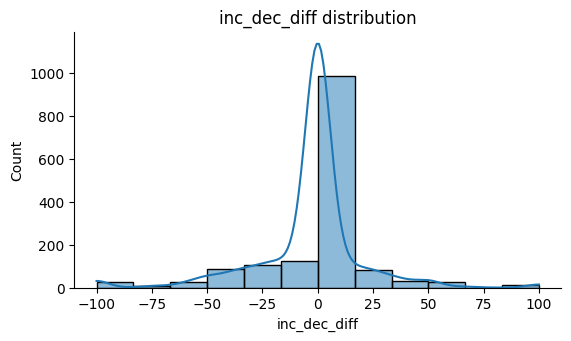

In [79]:
g = sns.displot(result_df['inc_dec_diff'], kde=True)
g.fig.set_size_inches(6,3)
plt.title('inc_dec_diff distribution')

Text(0.5, 1.0, 'inc_dec_diff and rel_count bivariate kde')

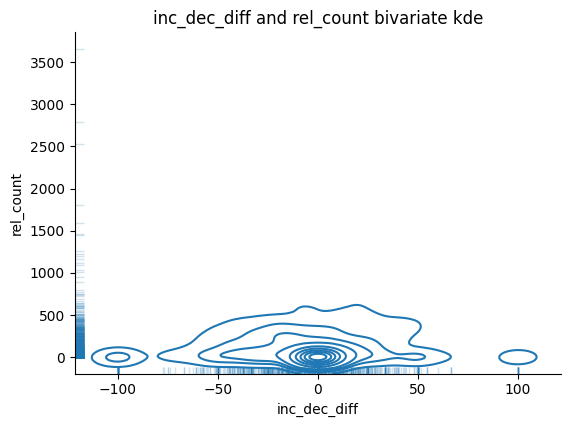

In [83]:
g = sns.displot(data=result_df, x="inc_dec_diff", y="rel_count", kind='kde', 
            rug=True, rug_kws={"alpha": 0.2, "height": 0.02})

g.fig.set_size_inches(6,4)
plt.title('inc_dec_diff and rel_count bivariate kde')

Text(0.5, 1.0, 'inc_dec_diff and sentenc_count bivariate kde')

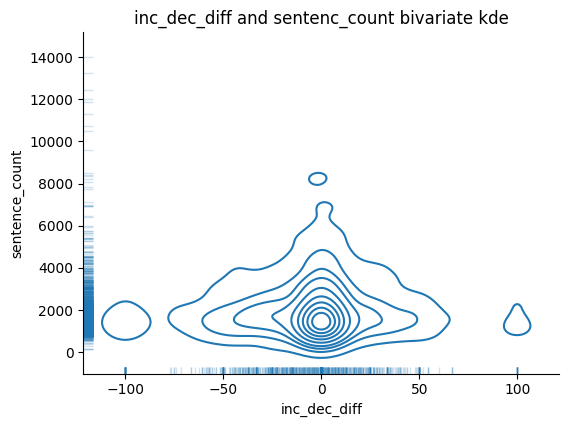

In [84]:
g = sns.displot(data=result_df, x="inc_dec_diff", y="sentence_count", kind='kde', 
            rug=True, rug_kws={"alpha": 0.2, "height": 0.02})

g.fig.set_size_inches(6,4)
plt.title('inc_dec_diff and sentence_count bivariate kde')

### group by inc_dec_diff (0,-1,1)

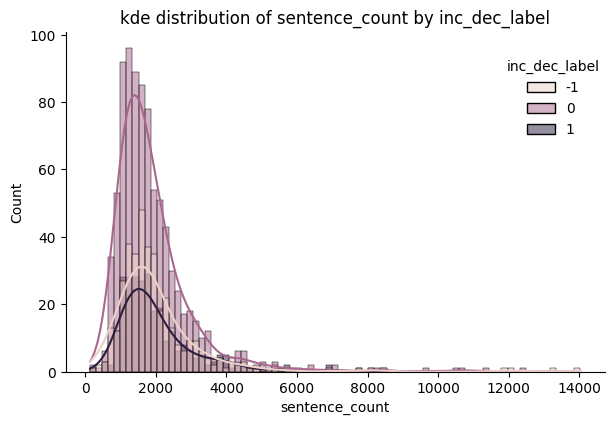

In [14]:
temp = result_df.copy()
temp['inc_dec_label'] = np.select((temp['inc_dec_diff'] == 0, temp['inc_dec_diff'] < 0, temp['inc_dec_diff'] > 0),
                                  (0,-1,1))
g = sns.displot(data=temp, x="sentence_count", hue="inc_dec_label", kde=True)
g.fig.set_size_inches(8,4)
plt.title('kde distribution of sentence_count by inc_dec_label')
sns.move_legend(g, "center right", bbox_to_anchor=(0.8, 0.8))

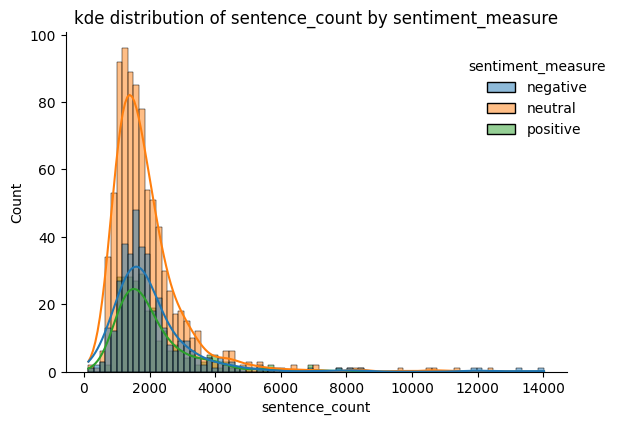

In [13]:
temp = result_df.copy()
temp['sentiment_measure'] = np.select((temp['inc_dec_diff'] == 0, temp['inc_dec_diff'] < 0, temp['inc_dec_diff'] > 0),
                                  ('neutral', 'negative', 'positive'))
g = sns.displot(data=temp, x="sentence_count", hue="sentiment_measure", kde=True)
g.fig.set_size_inches(8,4)
plt.title('kde distribution of sentence_count by sentiment_measure')
sns.move_legend(g, "center right", bbox_to_anchor=(0.8, 0.8))

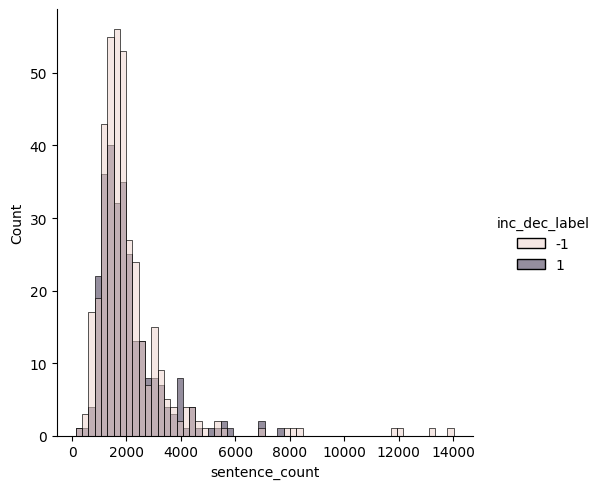

In [62]:
temp = result_df.copy()
temp['inc_dec_label'] = np.select((temp['inc_dec_diff'] == 0, temp['inc_dec_diff'] < 0, temp['inc_dec_diff'] > 0),
                                  (0, -1, 1))
sns.displot(data=temp[temp['inc_dec_label'] != 0], x="sentence_count", hue="inc_dec_label")

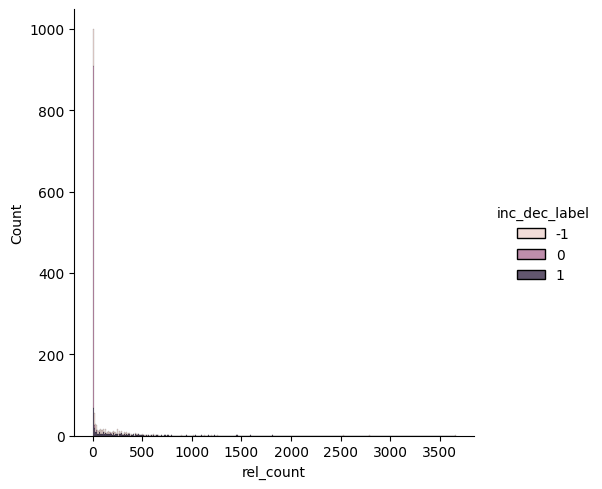

In [85]:
sns.displot(data=temp, x="rel_count", hue="inc_dec_label", multiple="stack")

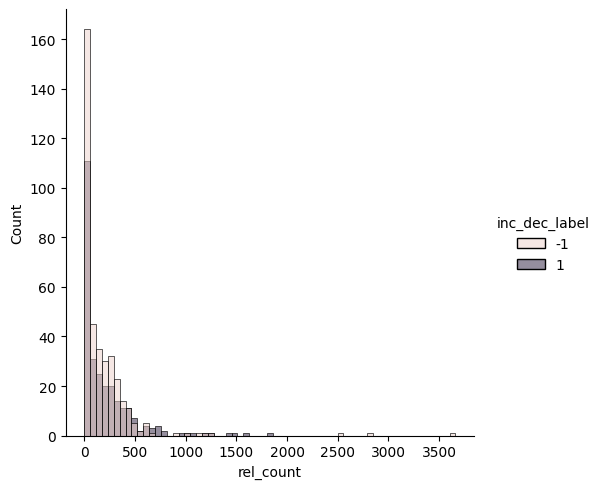

In [64]:
temp = result_df.copy()
temp['inc_dec_label'] = np.select((temp['inc_dec_diff'] == 0, temp['inc_dec_diff'] < 0, temp['inc_dec_diff'] > 0),
                                  (0, -1, 1))
sns.displot(data=temp[temp['inc_dec_label'] != 0], x="rel_count", hue="inc_dec_label")

### group by rel_count (threshold 22: 'short','long')

) missing from current font.ib/python3.8/site-packages/seaborn/utils.py:80: UserWarning: Glyph 13 (
  fig.canvas.draw()
) missing from current font.ib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 13 (
  func(*args, **kwargs)
) missing from current font.ib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


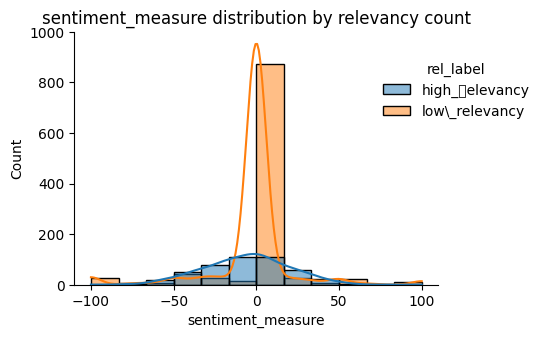

In [110]:
temp2 = result_df.copy()
temp2['rel_label'] = np.select((temp['rel_count'] >= 22, temp['rel_count'] < 22),
                                  ('high_relevancy','low_relevancy'))
g = sns.displot(data=temp2, x="inc_dec_diff", hue="rel_label", kde=True)
g.fig.set_size_inches(6,3)
plt.title('sentiment_measure distribution by relevancy count')
plt.xlabel('sentiment_measure')
sns.move_legend(g, "upper right", bbox_to_anchor=(0.9, 0.9))

In [ ]:
temp2 = result_df.copy()
temp2['rel_label'] = np.select((temp['rel_count'] >= 22, temp['rel_count'] < 22),
                                  ('long','short'))
g = sns.displot(data=temp2, x="inc_dec_diff", hue="rel_label")
g.fig.set_size_inches(6,3)
plt.title('kde distribution of inc_dec_diff by rel_label')
sns.move_legend(g, "upper right", bbox_to_anchor=(0.9, 0.9))

# analysis

## number of relevant sentence - set to 0

In [22]:
result_df['rel_count'].describe(percentiles=[0.1, 0.25, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 1.0])

count    1510.000000
mean       81.170861
std       218.168131
min         0.000000
10%         0.000000
25%         0.000000
50%         2.000000
60%         4.000000
70%        22.000000
75%        59.000000
80%       115.400000
90%       273.300000
100%     3660.000000
max      3660.000000
Name: rel_count, dtype: float64

<Axes: xlabel='rel_count', ylabel='Density'>

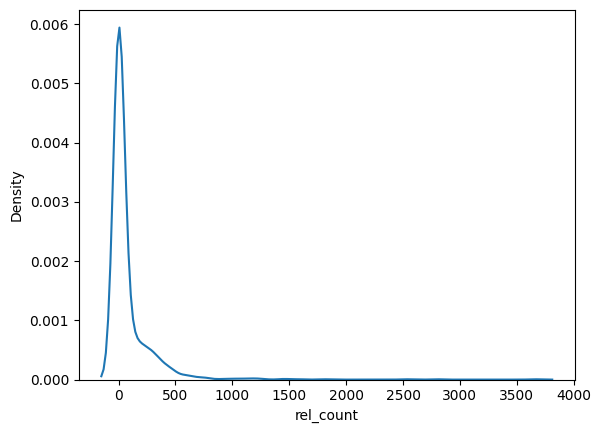

In [18]:
sns.kdeplot(result_df['rel_count'])

In [22]:
# criteria1: relevant sentence count, threshold = 22 (70%)
analysis1 = result_df.copy()
analysis1['inc_dec_diff'] = np.where(analysis1['rel_count'] < 22, 0, analysis1['inc_dec_diff'])
analysis1

hearing_num  sentence_count  keyword_count  irrel_count  rel_count  \
0        107-017            3080             42            2         40   
1          107-1            2606             18           15          3   
2         107-10            3284           1100           90       1010   
3        107-100            1832             16           14          2   
4        107-101            3326             10            9          1   
...          ...             ...            ...          ...        ...   
1505       117-9            2820              3            3          0   
1506       118-2            2902              7            7          0   
1507       118-3            1485             28           12         16   
1508       118-5            2032             12           10          2   
1509       118-8            3127             28           12         16   

      neutral_count  inc_count  dec_count       date  year    month quarter  \
0                30          0         10 2001-03-07  2001  2001-03  2001Q1   
1                 3          0          0 2001-02-15  2001  2001-02  2001Q1   
2               409        211        390 2001-03-27  2001  2001-03  2001Q1   
3                 1          1          0 2002-03-13  2002  2002-03  2002Q1   
4                 1          0          0 2002-04-17  2002  2002-04  2002Q2   
...             ...        ...        ...        ...   ...      ...     ...   
1505              0          0          0 2021-03-02  2021  2021-03  2021Q1   
1506              0          0          0 2023-02-01  2023  2023-02  2023Q1   
1507              2          3         11 2023-02-01  2023  2023-02  2023Q1   
1508              0          1          1 2023-02-02  2023  2023-02  2023Q1   
1509              7          2          7 2023-02-08  2023  2023-02  2023Q1   

      keyword_pct  relevancy_pct  neutral_pct   inc_pct    dec_pct  \
0        1.363636       1.298701     0.974026  0.000000   0.324675   
1        0.690714       0.115119     0.115119  0.000000   0.000000   
2       33.495737      30.755177    12.454324  6.425091  11.875761   
3        0.873362       0.109170     0.054585  0.054585   0.000000   
4        0.300661       0.030066     0.030066  0.000000   0.000000   
...           ...            ...          ...       ...        ...   
1505     0.106383       0.000000     0.000000  0.000000   0.000000   
1506     0.241213       0.000000     0.000000  0.000000   0.000000   
1507     1.885522       1.077441     0.134680  0.202020   0.740741   
1508     0.590551       0.098425     0.000000  0.049213   0.049213   
1509     0.895427       0.511673     0.223857  0.063959   0.223857   

      inc_dec_diff  
0       -25.000000  
1         0.000000  
2       -17.722772  
3         0.000000  
4         0.000000  
...            ...  
1505      0.000000  
1506      0.000000  
1507      0.000000  
1508      0.000000  
1509      0.000000  

[1510 rows x 18 columns]

Text(0.5, 1.0, 'inc_dec_diff distribution after normalize by relevancy count')

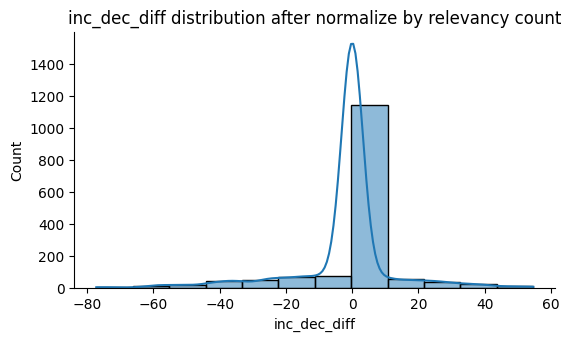

In [12]:
g = sns.displot(analysis1['inc_dec_diff'], kde=True)
g.fig.set_size_inches(6,3)
plt.title('inc_dec_diff distribution after normalize by relevancy count')

### VDE benchmark

In [11]:
# return: 1day, volatility: 7 day, rsi: 14 day
vde_df = pd.read_csv('/home/congress-user/data_collection/energy_data/vde.csv')
vde_df = vde_df.drop(columns=['Unnamed: 0'])
vde_df['DATE'] = pd.to_datetime(vde_df['DATE'])
vde_df['year'] = vde_df['DATE'].dt.year
vde_df = vde_df[['DATE','year','PRICE','Volume']]
vde_df['returns'] = vde_df['PRICE'].pct_change()
vde_df['volatility'] = vde_df['returns'].rolling(window=7).std()

def rsi_calc(df):
    change = df['PRICE'].diff()
    change.dropna(inplace=True)
    change_up = change.copy()
    change_down = change.copy()
    change_up[change_up<0] = 0
    change_down[change_down>0] = 0
    change.equals(change_up+change_down)
    
    avg_up = change_up.rolling(14).mean()
    avg_down = change_down.rolling(14).mean().abs()
    rsi = 100*avg_up/(avg_up+avg_down)
    return rsi

vde_df['rsi'] = rsi_calc(vde_df)

vde_df = vde_df[~vde_df['volatility'].isna()]
vde_df = vde_df[~vde_df['rsi'].isna()]
vde_df

DATE  year       PRICE  Volume   returns  volatility        rsi
14   2004-10-19  2004   49.740002     400 -0.004802    0.010683  48.306341
15   2004-10-20  2004   50.720001   10600  0.019702    0.014469  52.049199
16   2004-10-21  2004   51.230000   14100  0.010055    0.014789  51.114206
17   2004-10-22  2004   51.230000    3800  0.000000    0.010002  50.771395
18   2004-10-25  2004   51.000000   11700 -0.004490    0.010063  45.718435
...         ...   ...         ...     ...       ...         ...        ...
4858 2024-01-18  2024  111.769997  730600 -0.000983    0.012024  27.080824
4859 2024-01-19  2024  112.050003  505100  0.002505    0.011651  31.443672
4860 2024-01-22  2024  112.500000  660300  0.004016    0.011578  34.296996
4861 2024-01-23  2024  112.839996  517600  0.003022    0.011680  30.507311
4862 2024-01-24  2024  114.470001  713400  0.014445    0.011938  30.891523

[4849 rows x 7 columns]

In [124]:
merged_df = analysis1.merge(vde_df, left_on='date',right_on='DATE')
merged_df

hearing_num  sentence_count  keyword_count  irrel_count  rel_count  \
0        108-126            3958             20           19          1   
1        108-134            3246             10            9          1   
2          109-1           11883           4591          931       3660   
3         109-36            3948             17           16          1   
4         109-10            1590             11           10          1   
...          ...             ...            ...          ...        ...   
1239       117-9            2820              3            3          0   
1240       118-2            2902              7            7          0   
1241       118-3            1485             28           12         16   
1242       118-5            2032             12           10          2   
1243       118-8            3127             28           12         16   

      neutral_count  inc_count  dec_count       date year_x  ...   inc_pct  \
0                 1          0          0 2004-12-07   2004  ...  0.000000   
1                 1          0          0 2004-11-18   2004  ...  0.000000   
2              1778        935        947 2005-02-10   2005  ...  7.868383   
3                 1          0          0 2005-02-10   2005  ...  0.000000   
4                 1          0          0 2005-01-26   2005  ...  0.000000   
...             ...        ...        ...        ...    ...  ...       ...   
1239              0          0          0 2021-03-02   2021  ...  0.000000   
1240              0          0          0 2023-02-01   2023  ...  0.000000   
1241              2          3         11 2023-02-01   2023  ...  0.202020   
1242              0          1          1 2023-02-02   2023  ...  0.049213   
1243              7          2          7 2023-02-08   2023  ...  0.063959   

       dec_pct  inc_dec_diff       DATE  year_y       PRICE   Volume  \
0     0.000000      0.000000 2004-12-07    2004   50.889999     5100   
1     0.000000      0.000000 2004-11-18    2004   51.750000     3800   
2     7.969368     -0.327869 2005-02-10    2005   57.900002    18600   
3     0.000000      0.000000 2005-02-10    2005   57.900002    18600   
4     0.000000      0.000000 2005-01-26    2005   53.630001     7800   
...        ...           ...        ...     ...         ...      ...   
1239  0.000000      0.000000 2021-03-02    2021   68.050003  1317400   
1240  0.000000      0.000000 2023-02-01    2023  122.589996   709000   
1241  0.740741      0.000000 2023-02-01    2023  122.589996   709000   
1242  0.049213      0.000000 2023-02-02    2023  119.709999  1257000   
1243  0.223857      0.000000 2023-02-08    2023  121.519997   274300   

       returns volatility        rsi  
0    -0.015858   0.013268  50.837314  
1     0.008772   0.013602  58.599531  
2     0.025868   0.011747  84.162290  
3     0.025868   0.011747  84.162290  
4     0.009031   0.005358  84.030424  
...        ...        ...        ...  
1239 -0.006714   0.025190  68.462364  
1240 -0.018338   0.018901  51.733829  
1241 -0.018338   0.018901  51.733829  
1242 -0.023493   0.020416  39.457951  
1243 -0.007838   0.018388  45.215514  

[1244 rows x 25 columns]

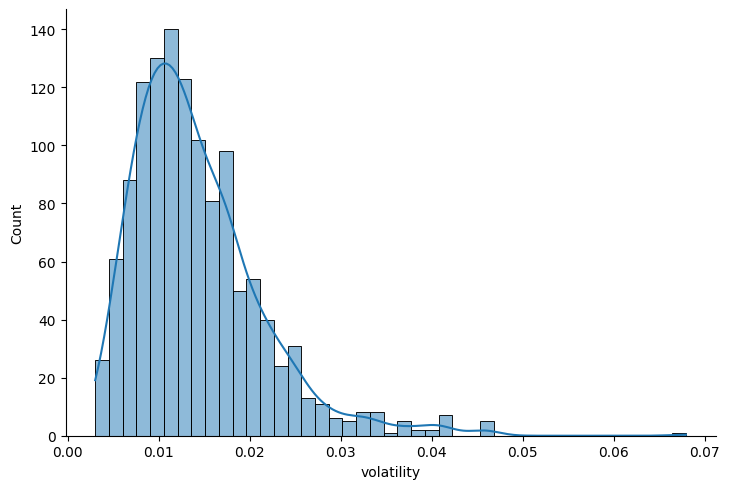

In [125]:
g = sns.displot(merged_df['volatility'], kde=True)
g.fig.set_size_inches(8,5)

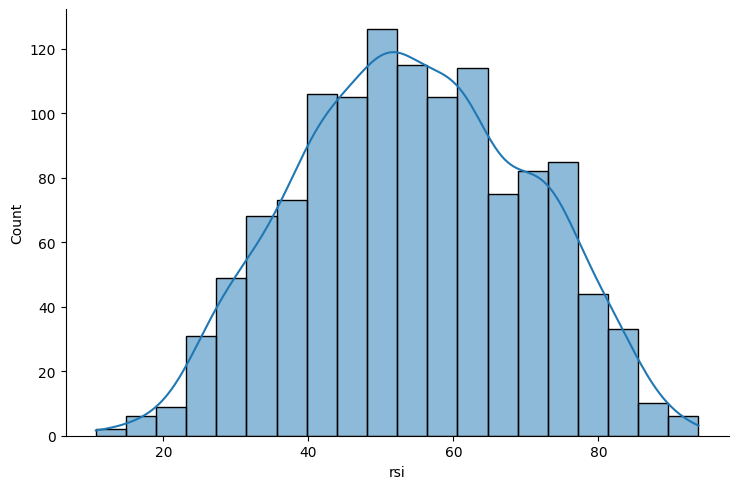

In [114]:
g = sns.displot(merged_df['rsi'], kde=True)
g.fig.set_size_inches(8,5)

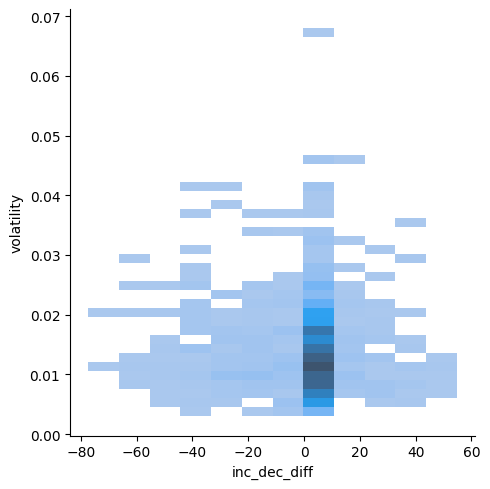

In [115]:
sns.displot(data=merged_df, x="inc_dec_diff", y="prev7_volatility")

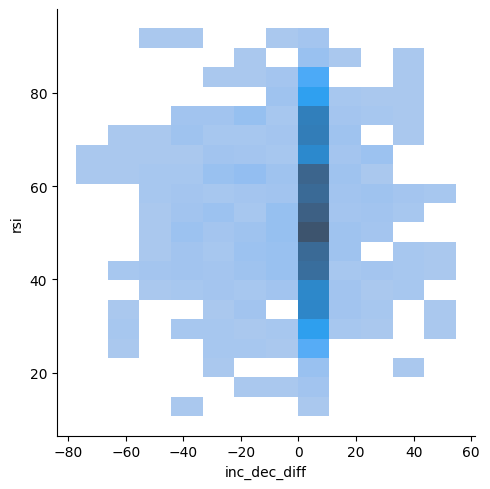

In [116]:
sns.displot(data=merged_df, x="inc_dec_diff", y="prev14_rsi")

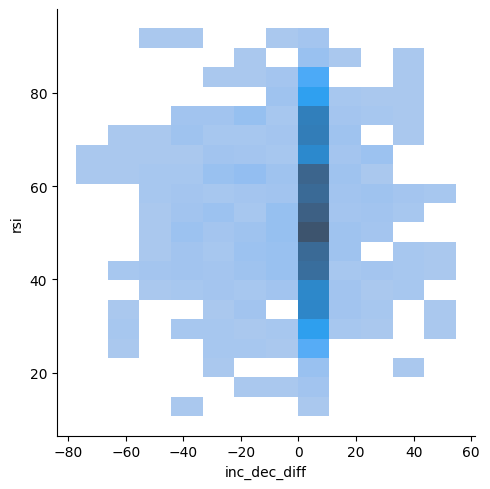

In [120]:
sns.displot(data=merged_df, x="inc_dec_diff", y="rsi")

In [126]:
vde_benchmark = pd.read_csv('/home/congress-user/data_collection/energy_data/vde.csv')
vde_benchmark = vde_benchmark.drop(columns=['Unnamed: 0'])
vde_benchmark['DATE'] = pd.to_datetime(vde_benchmark['DATE'])
vde_benchmark['year'] = vde_benchmark['DATE'].dt.year
vde_benchmark['RETURN_2'] = vde_benchmark['PRICE'].pct_change(2).shift(-2)
vde_benchmark['RETURN_3'] = vde_benchmark['PRICE'].pct_change(3).shift(-3)
vde_benchmark['RETURN_4'] = vde_benchmark['PRICE'].pct_change(4).shift(-4)
vde_benchmark['RETURN_6'] = vde_benchmark['PRICE'].pct_change(6).shift(-6)
vde_benchmark


DATE       PRICE  Volume  RETURN_1  RETURN_5  RETURN_7  RETURN_14  \
0    2004-09-29   49.970001     900  0.009005  0.052231  0.045027  -0.004603   
1    2004-09-30   50.419998    4500  0.012892  0.033122  0.025387   0.005950   
2    2004-10-01   51.070000    6700  0.000979  0.022518  0.002546   0.003133   
3    2004-10-04   51.119999    6800  0.009194  0.011346 -0.023279   0.002152   
4    2004-10-05   51.590000    8600  0.019190 -0.007560 -0.023066  -0.011436   
...         ...         ...     ...       ...       ...       ...        ...   
4858 2024-01-18  111.769997  730600  0.002505       NaN       NaN        NaN   
4859 2024-01-19  112.050003  505100  0.004016       NaN       NaN        NaN   
4860 2024-01-22  112.500000  660300  0.003022       NaN       NaN        NaN   
4861 2024-01-23  112.839996  517600  0.014445       NaN       NaN        NaN   
4862 2024-01-24  114.470001  713400       NaN       NaN       NaN        NaN   

      RETURN_21  RETURN_28  VOLUME_1  ...  VOLATILITY_5  VOLATILITY_7  \
0     -0.004603   0.010406  4.000000  ...           NaN           NaN   
1     -0.001388  -0.003372  0.488889  ...           NaN           NaN   
2     -0.018602  -0.004308  0.014925  ...           NaN           NaN   
3     -0.035016  -0.005477  0.264706  ...           NaN           NaN   
4     -0.022097   0.004071  0.674419  ...           NaN           NaN   
...         ...        ...       ...  ...           ...           ...   
4858        NaN        NaN -0.308650  ...      0.216330      0.191882   
4859        NaN        NaN  0.307266  ...      0.218600      0.186006   
4860        NaN        NaN -0.216114  ...      0.181165      0.184966   
4861        NaN        NaN  0.378284  ...      0.079150      0.186592   
4862        NaN        NaN       NaN  ...      0.091652      0.190593   

      VOLATILITY_14  VOLATILITY_21  VOLATILITY_28  year  RETURN_2  RETURN_3  \
0               NaN            NaN            NaN  2004  0.022013  0.023014   
1               NaN            NaN            NaN  2004  0.013883  0.023205   
2               NaN            NaN            NaN  2004  0.010182  0.029567   
3               NaN            NaN            NaN  2004  0.028560  0.018975   
4               NaN            NaN            NaN  2004  0.009692  0.012212   
...             ...            ...            ...   ...       ...       ...   
4858       0.182926       0.170046       0.190981  2024  0.006531  0.009573   
4859       0.179740       0.165537       0.190739  2024  0.007050  0.021597   
4860       0.182547       0.165894       0.187445  2024  0.017511       NaN   
4861       0.175293       0.164247       0.187752  2024       NaN       NaN   
4862       0.177809       0.171982       0.187615  2024       NaN       NaN   

      RETURN_4  RETURN_6  
0     0.032419  0.042425  
1     0.042840  0.035700  
2     0.019973  0.012336  
3     0.021518  0.001565  
4     0.002132 -0.032177  
...        ...       ...  
4858  0.024157       NaN  
4859       NaN       NaN  
4860       NaN       NaN  
4861       NaN       NaN  
4862       NaN       NaN  

[4863 rows x 26 columns]

In [127]:
merged_df

hearing_num  sentence_count  keyword_count  irrel_count  rel_count  \
0        108-126            3958             20           19          1   
1        108-134            3246             10            9          1   
2          109-1           11883           4591          931       3660   
3         109-36            3948             17           16          1   
4         109-10            1590             11           10          1   
...          ...             ...            ...          ...        ...   
1239       117-9            2820              3            3          0   
1240       118-2            2902              7            7          0   
1241       118-3            1485             28           12         16   
1242       118-5            2032             12           10          2   
1243       118-8            3127             28           12         16   

      neutral_count  inc_count  dec_count       date year_x  ...   inc_pct  \
0                 1          0          0 2004-12-07   2004  ...  0.000000   
1                 1          0          0 2004-11-18   2004  ...  0.000000   
2              1778        935        947 2005-02-10   2005  ...  7.868383   
3                 1          0          0 2005-02-10   2005  ...  0.000000   
4                 1          0          0 2005-01-26   2005  ...  0.000000   
...             ...        ...        ...        ...    ...  ...       ...   
1239              0          0          0 2021-03-02   2021  ...  0.000000   
1240              0          0          0 2023-02-01   2023  ...  0.000000   
1241              2          3         11 2023-02-01   2023  ...  0.202020   
1242              0          1          1 2023-02-02   2023  ...  0.049213   
1243              7          2          7 2023-02-08   2023  ...  0.063959   

       dec_pct  inc_dec_diff       DATE  year_y       PRICE   Volume  \
0     0.000000      0.000000 2004-12-07    2004   50.889999     5100   
1     0.000000      0.000000 2004-11-18    2004   51.750000     3800   
2     7.969368     -0.327869 2005-02-10    2005   57.900002    18600   
3     0.000000      0.000000 2005-02-10    2005   57.900002    18600   
4     0.000000      0.000000 2005-01-26    2005   53.630001     7800   
...        ...           ...        ...     ...         ...      ...   
1239  0.000000      0.000000 2021-03-02    2021   68.050003  1317400   
1240  0.000000      0.000000 2023-02-01    2023  122.589996   709000   
1241  0.740741      0.000000 2023-02-01    2023  122.589996   709000   
1242  0.049213      0.000000 2023-02-02    2023  119.709999  1257000   
1243  0.223857      0.000000 2023-02-08    2023  121.519997   274300   

       returns volatility        rsi  
0    -0.015858   0.013268  50.837314  
1     0.008772   0.013602  58.599531  
2     0.025868   0.011747  84.162290  
3     0.025868   0.011747  84.162290  
4     0.009031   0.005358  84.030424  
...        ...        ...        ...  
1239 -0.006714   0.025190  68.462364  
1240 -0.018338   0.018901  51.733829  
1241 -0.018338   0.018901  51.733829  
1242 -0.023493   0.020416  39.457951  
1243 -0.007838   0.018388  45.215514  

[1244 rows x 25 columns]

In [129]:
data_df = merged_df[['date','inc_dec_diff','volatility','rsi']].merge(vde_benchmark, left_on='date',right_on='DATE')
data_df

date  inc_dec_diff  volatility        rsi       DATE       PRICE  \
0    2004-12-07      0.000000    0.013268  50.837314 2004-12-07   50.889999   
1    2004-11-18      0.000000    0.013602  58.599531 2004-11-18   51.750000   
2    2005-02-10     -0.327869    0.011747  84.162290 2005-02-10   57.900002   
3    2005-02-10      0.000000    0.011747  84.162290 2005-02-10   57.900002   
4    2005-01-26      0.000000    0.005358  84.030424 2005-01-26   53.630001   
...         ...           ...         ...        ...        ...         ...   
1239 2021-03-02      0.000000    0.025190  68.462364 2021-03-02   68.050003   
1240 2023-02-01      0.000000    0.018901  51.733829 2023-02-01  122.589996   
1241 2023-02-01      0.000000    0.018901  51.733829 2023-02-01  122.589996   
1242 2023-02-02      0.000000    0.020416  39.457951 2023-02-02  119.709999   
1243 2023-02-08      0.000000    0.018388  45.215514 2023-02-08  121.519997   

       Volume  RETURN_1  RETURN_5  RETURN_7  ...  VOLATILITY_5  VOLATILITY_7  \
0        5100  0.002358  0.024956  0.026921  ...      0.236556      0.212659   
1        3800  0.010628  0.051208  0.046184  ...      0.255672      0.216680   
2       18600  0.011572  0.027806  0.041796  ...      0.211866      0.184929   
3       18600  0.011572  0.027806  0.041796  ...      0.211866      0.184929   
4        7800  0.009696  0.045870  0.055379  ...      0.096877      0.085015   
...       ...       ...       ...       ...  ...           ...           ...   
1239  1317400  0.014548  0.058927  0.093608  ...      0.438120      0.397403   
1240   709000 -0.023493 -0.008728  0.020638  ...      0.365824      0.299273   
1241   709000 -0.023493 -0.008728  0.020638  ...      0.365824      0.299273   
1242  1257000 -0.002255  0.005513  0.041016  ...      0.228438      0.323597   
1243   274300 -0.009463  0.012015 -0.034809  ...      0.315132      0.290835   

      VOLATILITY_14  VOLATILITY_21  VOLATILITY_28  year  RETURN_2  RETURN_3  \
0          0.217639       0.219487       0.222631  2004  0.011397  0.006878   
1          0.221714       0.213776       0.215165  2004  0.025894  0.033043   
2          0.152575       0.137788       0.185820  2005  0.013126  0.012781   
3          0.152575       0.137788       0.185820  2005  0.013126  0.012781   
4          0.110688       0.172494       0.178962  2005  0.000559  0.013798   
...             ...            ...            ...   ...       ...       ...   
1239       0.343622       0.327181       0.353027  2021  0.041146  0.079353   
1240       0.251271       0.264096       0.281870  2023 -0.025695 -0.030916   
1241       0.251271       0.264096       0.281870  2023 -0.025695 -0.030916   
1242       0.253971       0.236328       0.285609  2023 -0.007602  0.023139   
1243       0.276405       0.249180       0.260859  2023  0.029625  0.025510   

      RETURN_4  RETURN_6  
0     0.019061  0.036746  
1     0.043285  0.043671  
2     0.040587  0.049741  
3     0.040587  0.049741  
4     0.029275  0.049599  
...        ...       ...  
1239  0.081117  0.090962  
1240 -0.000897 -0.018109  
1241 -0.000897 -0.018109  
1242  0.015120  0.045193  
1243  0.027238  0.001975  

[1244 rows x 30 columns]

In [129]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn import preprocessing 

X = data_df[['inc_dec_diff','prev7_volatility','prev14_rsi']]
y = data_df['RETURN_6']

X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size=0.3, random_state=101) 

model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test) 

print( 
  'mean_squared_error : ', mean_squared_error(y_test, predictions)) 
print( 
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions)) 

print(model.intercept_, model.coef_, model.score(X, y))

mean_squared_error :  0.0015104267974875684
mean_absolute_error :  0.02890133840067407
0.004764891405582676 [ 4.52335551e-05  7.91384974e-02 -8.34823438e-05] 0.002662664571976725


<Axes: xlabel='inc_dec_diff', ylabel='RETURN_28'>

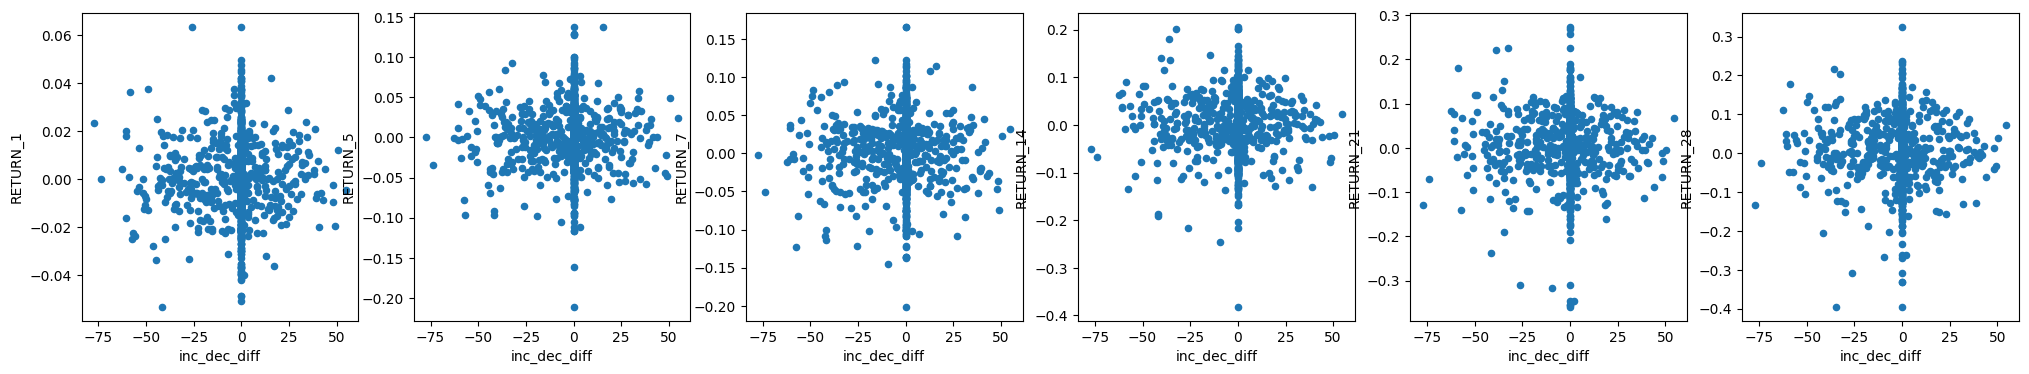

In [120]:
# threshold: vol - 0.12, rsi - 30/70
fig, axes = plt.subplots(nrows=1, ncols=6,figsize=(25,4))

data_df.plot(x='inc_dec_diff',y='RETURN_1',kind='scatter',ax=axes[0])
data_df.plot(x='inc_dec_diff',y='RETURN_5',kind='scatter',ax=axes[1])
data_df.plot(x='inc_dec_diff',y='RETURN_7',kind='scatter',ax=axes[2])
data_df.plot(x='inc_dec_diff',y='RETURN_14',kind='scatter',ax=axes[3])
data_df.plot(x='inc_dec_diff',y='RETURN_21',kind='scatter',ax=axes[4])
data_df.plot(x='inc_dec_diff',y='RETURN_28',kind='scatter',ax=axes[5])

<Axes: xlabel='volatility', ylabel='RETURN_28'>

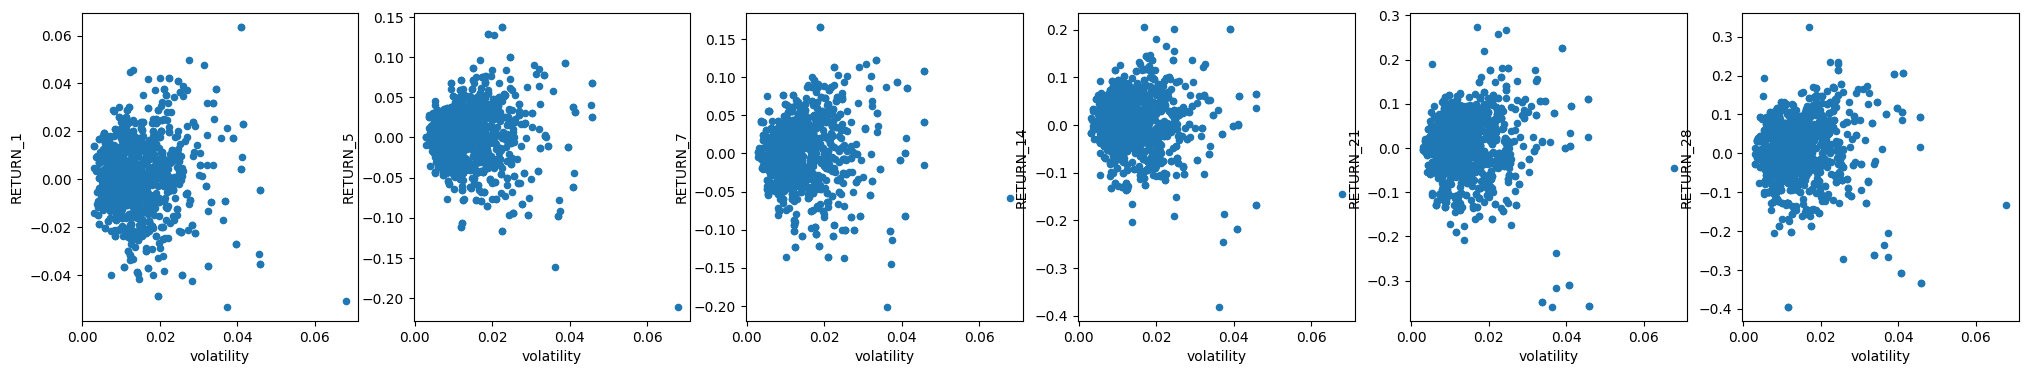

In [121]:
# threshold: vol - 0.12, rsi - 30/70
fig, axes = plt.subplots(nrows=1, ncols=6,figsize=(25,4))

data_df.plot(x='volatility',y='RETURN_1',kind='scatter',ax=axes[0])
data_df.plot(x='volatility',y='RETURN_5',kind='scatter',ax=axes[1])
data_df.plot(x='volatility',y='RETURN_7',kind='scatter',ax=axes[2])
data_df.plot(x='volatility',y='RETURN_14',kind='scatter',ax=axes[3])
data_df.plot(x='volatility',y='RETURN_21',kind='scatter',ax=axes[4])
data_df.plot(x='volatility',y='RETURN_28',kind='scatter',ax=axes[5])

In [21]:
import statsmodels.api as sm

X = data_df[['inc_dec_diff','prev7_volatility','prev14_rsi']]
Y = data_df['RETURN_6']

S = sm.add_constant(X)

#fit linear regression model
model = sm.OLS(Y, X).fit()

#view model summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:               RETURN_6   R-squared (uncentered):                   0.004
Model:                            OLS   Adj. R-squared (uncentered):              0.001
Method:                 Least Squares   F-statistic:                              1.470
Date:                Fri, 29 Mar 2024   Prob (F-statistic):                       0.221
Time:                        16:01:06   Log-Likelihood:                          2321.1
No. Observations:                1244   AIC:                                     -4636.
Df Residuals:                    1241   BIC:                                     -4621.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [130]:
import statsmodels.api as sm

X = data_df[['inc_dec_diff','volatility','rsi']]
Y = data_df['RETURN_6']

S = sm.add_constant(X)

#fit linear regression model
model = sm.OLS(Y, X).fit()

#view model summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:               RETURN_6   R-squared (uncentered):                   0.006
Model:                            OLS   Adj. R-squared (uncentered):              0.003
Method:                 Least Squares   F-statistic:                              2.401
Date:                Fri, 29 Mar 2024   Prob (F-statistic):                      0.0662
Time:                        16:28:27   Log-Likelihood:                          2322.5
No. Observations:                1244   AIC:                                     -4639.
Df Residuals:                    1241   BIC:                                     -4624.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [135]:
import statsmodels.api as sm

X = data_df[['inc_dec_diff','prev7_volatility','prev14_rsi']]
Y = data_df['RETURN_7']

S = sm.add_constant(X)

#fit linear regression model
model = sm.OLS(Y, X).fit()

#view model summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:               RETURN_7   R-squared (uncentered):                   0.005
Model:                            OLS   Adj. R-squared (uncentered):              0.003
Method:                 Least Squares   F-statistic:                              2.078
Date:                Thu, 28 Mar 2024   Prob (F-statistic):                       0.101
Time:                        22:35:05   Log-Likelihood:                          2204.1
No. Observations:                1244   AIC:                                     -4402.
Df Residuals:                    1241   BIC:                                     -4387.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [37]:
import statsmodels.api as sm

X = data_df[['inc_dec_diff','prev7_volatility','prev14_rsi']]
Y = data_df['PRICE']

S = sm.add_constant(X)

#fit linear regression model
model = sm.OLS(Y, X).fit()

#view model summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  PRICE   R-squared (uncentered):                   0.909
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                              1301.
Date:                Fri, 29 Mar 2024   Prob (F-statistic):                   2.30e-202
Time:                        16:05:11   Log-Likelihood:                         -1883.4
No. Observations:                 392   AIC:                                      3773.
Df Residuals:                     389   BIC:                                      3785.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [39]:
import statsmodels.api as sm

X = data_df[['prev7_volatility','prev14_rsi']]
Y = data_df['PRICE']

S = sm.add_constant(X)

#fit linear regression model
model = sm.OLS(Y, X).fit()

#view model summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  PRICE   R-squared (uncentered):                   0.908
Model:                            OLS   Adj. R-squared (uncentered):              0.907
Method:                 Least Squares   F-statistic:                              1918.
Date:                Fri, 29 Mar 2024   Prob (F-statistic):                   1.54e-202
Time:                        16:06:04   Log-Likelihood:                         -1886.9
No. Observations:                 392   AIC:                                      3778.
Df Residuals:                     390   BIC:                                      3786.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

### predict icln base on VDE

In [151]:
# return: 1day, volatility: 7 day, rsi: 14 day
vde_df = pd.read_csv('/home/congress-user/data_collection/energy_data/vde.csv')
vde_df = vde_df.drop(columns=['Unnamed: 0'])
vde_df['DATE'] = pd.to_datetime(vde_df['DATE'])
vde_df['year'] = vde_df['DATE'].dt.year
vde_df = vde_df[['DATE','year','PRICE']]
vde_df = vde_df.rename(columns={'PRICE':'vde_price'})
vde_df

DATE  year   vde_price
0    2004-09-29  2004   49.970001
1    2004-09-30  2004   50.419998
2    2004-10-01  2004   51.070000
3    2004-10-04  2004   51.119999
4    2004-10-05  2004   51.590000
...         ...   ...         ...
4858 2024-01-18  2024  111.769997
4859 2024-01-19  2024  112.050003
4860 2024-01-22  2024  112.500000
4861 2024-01-23  2024  112.839996
4862 2024-01-24  2024  114.470001

[4863 rows x 3 columns]

In [150]:
icln_df = pd.read_csv('/home/congress-user/data_collection/energy_data/icln.csv')
icln_df = icln_df.drop(columns=['Unnamed: 0'])
icln_df['DATE'] = pd.to_datetime(icln_df['DATE'])
icln_df['year'] = icln_df['DATE'].dt.year
icln_df

DATE      PRICE   Volume  RETURN_1  RETURN_5  RETURN_7  RETURN_14  \
0    2008-06-25  52.770000     2000 -0.032405 -0.099678 -0.091908  -0.061967   
1    2008-06-26  51.060001     9800 -0.017626 -0.069526 -0.060909  -0.028594   
2    2008-06-27  50.160000     7700  0.001794 -0.044657 -0.051037  -0.019537   
3    2008-06-30  50.250000    17100 -0.028856 -0.045771 -0.044378  -0.002388   
4    2008-07-01  48.799999    14900 -0.026434 -0.024590 -0.011066   0.008197   
...         ...        ...      ...       ...       ...       ...        ...   
3917 2024-01-18  13.770000  3770200 -0.000726       NaN       NaN        NaN   
3918 2024-01-19  13.760000  4393400  0.010174       NaN       NaN        NaN   
3919 2024-01-22  13.900000  3623300  0.012230       NaN       NaN        NaN   
3920 2024-01-23  14.070000  3054100 -0.009240       NaN       NaN        NaN   
3921 2024-01-24  13.940000  2201300       NaN       NaN       NaN        NaN   

      RETURN_21  RETURN_28  VOLUME_1  ...  VOLUME_14  VOLUME_21  VOLUME_28  \
0     -0.099678  -0.111806  3.900000  ...   1.150000   0.350000  -0.200000   
1     -0.075402  -0.072072 -0.214286  ...  -0.520408   0.918367  -0.591837   
2     -0.036683  -0.055821  1.220779  ...  -0.376623   1.493506  -0.207792   
3     -0.016119  -0.073831 -0.128655  ...   0.011696  -0.789474  -0.713450   
4      0.002869  -0.060656 -0.550336  ...  -0.362416  -0.785235  -0.832215   
...         ...        ...       ...  ...        ...        ...        ...   
3917        NaN        NaN  0.165296  ...        NaN        NaN        NaN   
3918        NaN        NaN -0.175286  ...        NaN        NaN        NaN   
3919        NaN        NaN -0.157094  ...        NaN        NaN        NaN   
3920        NaN        NaN -0.279231  ...        NaN        NaN        NaN   
3921        NaN        NaN       NaN  ...        NaN        NaN        NaN   

       Log_Ret  VOLATILITY_5  VOLATILITY_7  VOLATILITY_14  VOLATILITY_21  \
0          NaN           NaN           NaN            NaN            NaN   
1    -0.032941           NaN           NaN            NaN            NaN   
2    -0.017784           NaN           NaN            NaN            NaN   
3     0.001793           NaN           NaN            NaN            NaN   
4    -0.029280           NaN           NaN            NaN            NaN   
...        ...           ...           ...            ...            ...   
3917  0.004367      0.241621      0.223528       0.193935       0.281524   
3918 -0.000726      0.263010      0.227958       0.186133       0.280015   
3919  0.010123      0.309861      0.254783       0.203891       0.261974   
3920  0.012156      0.224577      0.282545       0.220238       0.235324   
3921 -0.009282      0.137626      0.283197       0.207516       0.199957   

      VOLATILITY_28  year  
0               NaN  2008  
1               NaN  2008  
2               NaN  2008  
3               NaN  2008  
4               NaN  2008  
...             ...   ...  
3917       0.324564  2024  
3918       0.324337  2024  
3919       0.324512  2024  
3920       0.326600  2024  
3921       0.323627  2024  

[3922 rows x 22 columns]

In [153]:
data_df = analysis1[['date','inc_dec_diff']].merge(vde_df, left_on='date',right_on='DATE').merge(icln_df, left_on='date',right_on='DATE')
data_df

date  inc_dec_diff     DATE_x  year_x   vde_price     DATE_y  \
0    2008-06-26    -30.000000 2008-06-26    2008  126.709999 2008-06-26   
1    2008-07-10     -3.040541 2008-07-10    2008  121.209999 2008-07-10   
2    2008-07-15    -10.276680 2008-07-15    2008  116.750000 2008-07-15   
3    2008-07-17    -34.853420 2008-07-17    2008  112.320000 2008-07-17   
4    2008-07-17      0.000000 2008-07-17    2008  112.320000 2008-07-17   
...         ...           ...        ...     ...         ...        ...   
1027 2021-03-02      0.000000 2021-03-02    2021   68.050003 2021-03-02   
1028 2023-02-01      0.000000 2023-02-01    2023  122.589996 2023-02-01   
1029 2023-02-01      0.000000 2023-02-01    2023  122.589996 2023-02-01   
1030 2023-02-02      0.000000 2023-02-02    2023  119.709999 2023-02-02   
1031 2023-02-08      0.000000 2023-02-08    2023  121.519997 2023-02-08   

          PRICE   Volume  RETURN_1  RETURN_5  ...  VOLUME_14  VOLUME_21  \
0     51.060001     9800 -0.017626 -0.069526  ...  -0.520408   0.918367   
1     48.020000     1100  0.004998  0.032903  ...   2.272727   3.454545   
2     48.380001    12100  0.023150  0.016949  ...  -0.719008  -0.685950   
3     49.599998     4700 -0.008468 -0.053226  ...  -0.148936  -0.148936   
4     49.599998     4700 -0.008468 -0.053226  ...  -0.148936  -0.148936   
...         ...      ...       ...       ...  ...        ...        ...   
1027  25.969999  5318600 -0.065460 -0.070851  ...   0.206915   1.295303   
1028  20.950001  3272400 -0.006205 -0.042960  ...   0.753912  -0.389561   
1029  20.950001  3272400 -0.006205 -0.042960  ...   0.753912  -0.389561   
1030  20.820000  6915000 -0.025937 -0.053314  ...  -0.630311  -0.625481   
1031  20.049999  4849100 -0.016958  0.004988  ...  -0.107319  -0.110536   

      VOLUME_28   Log_Ret  VOLATILITY_5  VOLATILITY_7  VOLATILITY_14  \
0     -0.591837 -0.032941           NaN           NaN            NaN   
1      0.636364  0.008785      0.107159      0.249803            NaN   
2     -0.504132 -0.017417      0.229922      0.192495            NaN   
3     -0.042553  0.002018      0.256271      0.226306       0.252597   
4     -0.042553  0.002018      0.256271      0.226306       0.252597   
...         ...       ...           ...           ...            ...   
1027   0.220077 -0.032579      0.588303      0.621481       0.487467   
1028  -0.302408  0.010074      0.276799      0.241308       0.255548   
1029  -0.302408  0.010074      0.276799      0.241308       0.255548   
1030  -0.500000 -0.006225      0.284227      0.239577       0.247570   
1031   0.080530 -0.007948      0.161872      0.267463       0.223581   

      VOLATILITY_21  VOLATILITY_28  year_y  
0               NaN            NaN    2008  
1               NaN            NaN    2008  
2               NaN            NaN    2008  
3               NaN            NaN    2008  
4               NaN            NaN    2008  
...             ...            ...     ...  
1027       0.436061       0.461054    2021  
1028       0.266047       0.250460    2023  
1029       0.266047       0.250460    2023  
1030       0.263384       0.248140    2023  
1031       0.256162       0.251629    2023  

[1032 rows x 27 columns]

In [154]:
import statsmodels.api as sm

X = data_df[['inc_dec_diff','vde_price']]
Y = data_df['PRICE']

S = sm.add_constant(X)

#fit linear regression model
model = sm.OLS(Y, X).fit()

#view model summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  PRICE   R-squared (uncentered):                   0.740
Model:                            OLS   Adj. R-squared (uncentered):              0.739
Method:                 Least Squares   F-statistic:                              1465.
Date:                Thu, 28 Mar 2024   Prob (F-statistic):                   5.76e-302
Time:                        22:48:17   Log-Likelihood:                         -3525.6
No. Observations:                1032   AIC:                                      7055.
Df Residuals:                    1030   BIC:                                      7065.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [160]:
import statsmodels.api as sm

X = data_df[['inc_dec_diff','vde_price']]
Y = data_df['VOLUME_7']

S = sm.add_constant(X)

#fit linear regression model
model = sm.OLS(Y, X).fit()

#view model summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:               VOLUME_7   R-squared (uncentered):                   0.069
Model:                            OLS   Adj. R-squared (uncentered):              0.068
Method:                 Least Squares   F-statistic:                              38.38
Date:                Thu, 28 Mar 2024   Prob (F-statistic):                    8.42e-17
Time:                        22:49:46   Log-Likelihood:                         -2135.8
No. Observations:                1032   AIC:                                      4276.
Df Residuals:                    1030   BIC:                                      4286.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

## number of relevant sentence - filter out

In [12]:
# criteria1: relevant sentence count, threshold = 22 (70%)
analysis2 = result_df.copy()
analysis2 = analysis2[analysis2['rel_count'] >= 22]
analysis2

hearing_num  sentence_count  keyword_count  irrel_count  rel_count  \
0        107-017            3080             42            2         40   
2         107-10            3284           1100           90       1010   
9        107-106            2644            491           37        454   
11       107-108            2163            185            5        180   
13        107-11            4503           1707          119       1588   
...          ...             ...            ...          ...        ...   
1492      117-36            1673             49           15         34   
1494       117-4            1867            416           38        378   
1495      117-40            2932            591          225        366   
1498      117-45            2235            453          109        344   
1502       117-6            2586            775          111        664   

      neutral_count  inc_count  dec_count       date  year    month quarter  \
0                30          0         10 2001-03-07  2001  2001-03  2001Q1   
2               409        211        390 2001-03-27  2001  2001-03  2001Q1   
9               167         88        199 2002-05-01  2002  2002-05  2002Q2   
11              141         26         13 2002-05-21  2002  2002-05  2002Q2   
13              820        694         74 2001-02-28  2001  2001-02  2001Q1   
...             ...        ...        ...        ...   ...      ...     ...   
1492             21          7          6 2021-06-08  2021  2021-06  2021Q2   
1494             87         72        219 2021-02-09  2021  2021-02  2021Q1   
1495            117         26        223 2021-06-29  2021  2021-06  2021Q2   
1498            192         46        106 2021-07-27  2021  2021-07  2021Q3   
1502            225        100        339 2021-02-18  2021  2021-02  2021Q1   

      keyword_pct  relevancy_pct  neutral_pct    inc_pct    dec_pct  \
0        1.363636       1.298701     0.974026   0.000000   0.324675   
2       33.495737      30.755177    12.454324   6.425091  11.875761   
9       18.570348      17.170953     6.316188   3.328290   7.526475   
11       8.552936       8.321775     6.518724   1.202034   0.601017   
13      37.908061      35.265379    18.210082  15.411948   1.643349   
...           ...            ...          ...        ...        ...   
1492     2.928870       2.032277     1.255230   0.418410   0.358637   
1494    22.281735      20.246385     4.659882   3.856454  11.730048   
1495    20.156889      12.482947     3.990450   0.886767   7.605730   
1498    20.268456      15.391499     8.590604   2.058166   4.742729   
1502    29.969064      25.676721     8.700696   3.866976  13.109049   

      inc_dec_diff  
0       -25.000000  
2       -17.722772  
9       -24.449339  
11        7.222222  
13       39.042821  
...            ...  
1492      2.941176  
1494    -38.888889  
1495    -53.825137  
1498    -17.441860  
1502    -35.993976  

[455 rows x 18 columns]

Text(0.5, 1.0, 'sentiment_measure distribution after normalize by relevancy count - remove 0')

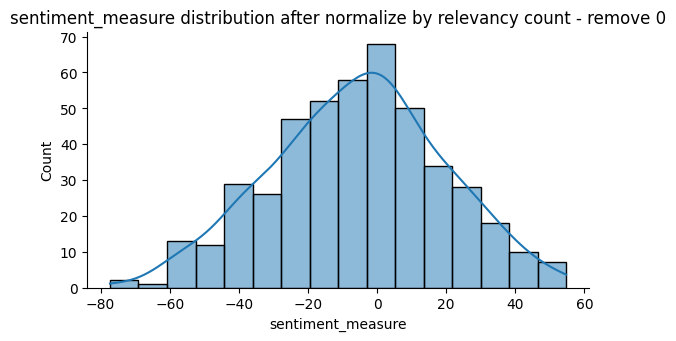

In [20]:
g = sns.displot(analysis2['inc_dec_diff'], kde=True)
g.fig.set_size_inches(6,3)
plt.xlabel('sentiment_measure')
plt.title('sentiment_measure distribution after normalize by relevancy count - remove 0')

### VDE benchmark

In [13]:
# return: 1day, volatility: 7 day, rsi: 14 day
vde_df = pd.read_csv('/home/congress-user/data_collection/energy_data/vde.csv')
vde_df = vde_df.drop(columns=['Unnamed: 0'])
vde_df['DATE'] = pd.to_datetime(vde_df['DATE'])
vde_df['year'] = vde_df['DATE'].dt.year
vde_df = vde_df[['DATE','year','PRICE','Volume']]
vde_df['returns'] = vde_df['PRICE'].pct_change()
vde_df['volatility'] = vde_df['returns'].rolling(window=7).std()

def rsi_calc(df):
    change = df['PRICE'].diff()
    change.dropna(inplace=True)
    change_up = change.copy()
    change_down = change.copy()
    change_up[change_up<0] = 0
    change_down[change_down>0] = 0
    change.equals(change_up+change_down)
    
    avg_up = change_up.rolling(14).mean()
    avg_down = change_down.rolling(14).mean().abs()
    rsi = 100*avg_up/(avg_up+avg_down)
    return rsi

vde_df['rsi'] = rsi_calc(vde_df)


vde_df = vde_df[~vde_df['volatility'].isna()]
vde_df = vde_df[~vde_df['rsi'].isna()]
vde_df

DATE  year       PRICE  Volume   returns  volatility        rsi
14   2004-10-19  2004   49.740002     400 -0.004802    0.010683  48.306341
15   2004-10-20  2004   50.720001   10600  0.019702    0.014469  52.049199
16   2004-10-21  2004   51.230000   14100  0.010055    0.014789  51.114206
17   2004-10-22  2004   51.230000    3800  0.000000    0.010002  50.771395
18   2004-10-25  2004   51.000000   11700 -0.004490    0.010063  45.718435
...         ...   ...         ...     ...       ...         ...        ...
4858 2024-01-18  2024  111.769997  730600 -0.000983    0.012024  27.080824
4859 2024-01-19  2024  112.050003  505100  0.002505    0.011651  31.443672
4860 2024-01-22  2024  112.500000  660300  0.004016    0.011578  34.296996
4861 2024-01-23  2024  112.839996  517600  0.003022    0.011680  30.507311
4862 2024-01-24  2024  114.470001  713400  0.014445    0.011938  30.891523

[4849 rows x 7 columns]

In [14]:
merged_df = analysis2.merge(vde_df, left_on='date',right_on='DATE')
merged_df

hearing_num  sentence_count  keyword_count  irrel_count  rel_count  \
0         109-1           11883           4591          931       3660   
1        109-11            2334            270           14        256   
2       109-118            1414            169           20        149   
3         109-2            2434             78           25         53   
4        109-27            2225             92           36         56   
..          ...             ...            ...          ...        ...   
387      117-36            1673             49           15         34   
388       117-4            1867            416           38        378   
389      117-40            2932            591          225        366   
390      117-45            2235            453          109        344   
391       117-6            2586            775          111        664   

     neutral_count  inc_count  dec_count       date year_x  ...   inc_pct  \
0             1778        935        947 2005-02-10   2005  ...  7.868383   
1              133         51         72 2005-03-02   2005  ...  2.185090   
2               83         33         33 2006-07-19   2006  ...  2.333805   
3               33          4         16 2005-03-09   2005  ...  0.164339   
4               44          4          8 2005-06-23   2005  ...  0.179775   
..             ...        ...        ...        ...    ...  ...       ...   
387             21          7          6 2021-06-08   2021  ...  0.418410   
388             87         72        219 2021-02-09   2021  ...  3.856454   
389            117         26        223 2021-06-29   2021  ...  0.886767   
390            192         46        106 2021-07-27   2021  ...  2.058166   
391            225        100        339 2021-02-18   2021  ...  3.866976   

       dec_pct  inc_dec_diff       DATE  year_y      PRICE   Volume   returns  \
0     7.969368     -0.327869 2005-02-10    2005  57.900002    18600  0.025868   
1     3.084833     -8.203125 2005-03-02    2005  62.950001    22500  0.013851   
2     2.333805      0.000000 2006-07-19    2006  81.540001    33100  0.009783   
3     0.657354    -22.641509 2005-03-09    2005  62.380001   105200 -0.025769   
4     0.359551     -7.142857 2005-06-23    2005  64.639999    47800 -0.001082   
..         ...           ...        ...     ...        ...      ...       ...   
387   0.358637      2.941176 2021-06-08    2021  78.470001   903000  0.009001   
388  11.730048    -38.888889 2021-02-09    2021  60.990002   826900 -0.010063   
389   7.605730    -53.825137 2021-06-29    2021  74.900002  1041000 -0.005312   
390   4.742729    -17.441860 2021-07-27    2021  69.099998  1300700 -0.012293   
391  13.109049    -35.993976 2021-02-18    2021  62.910000   840400 -0.026613   

    volatility        rsi  
0     0.011747  84.162290  
1     0.016653  76.399026  
2     0.015423  59.268297  
3     0.016766  58.459098  
4     0.012877  74.197877  
..         ...        ...  
387   0.015240  67.978990  
388   0.018947  52.439031  
389   0.019783  39.309885  
390   0.025478  38.522713  
391   0.019949  70.113578  

[392 rows x 25 columns]

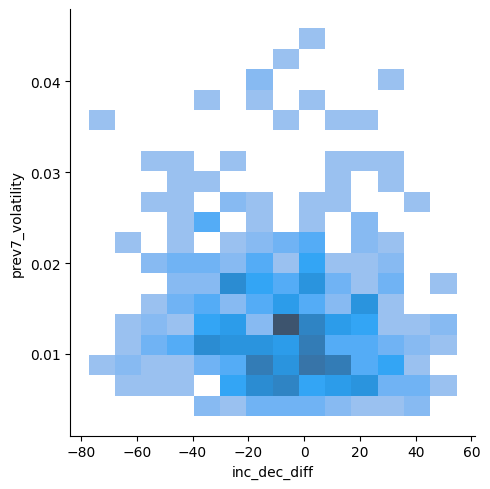

In [29]:
sns.displot(data=merged_df, x="inc_dec_diff", y="prev7_volatility")

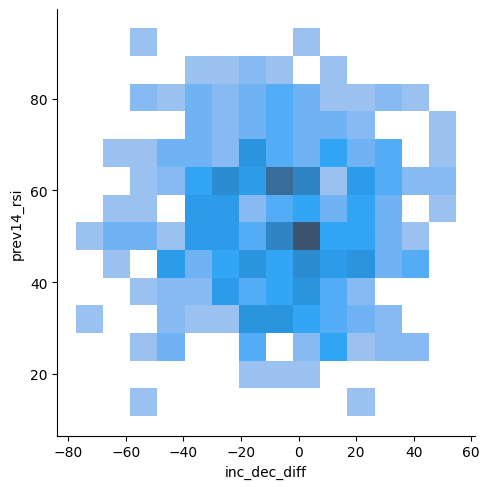

In [30]:
sns.displot(data=merged_df, x="inc_dec_diff", y="prev14_rsi")

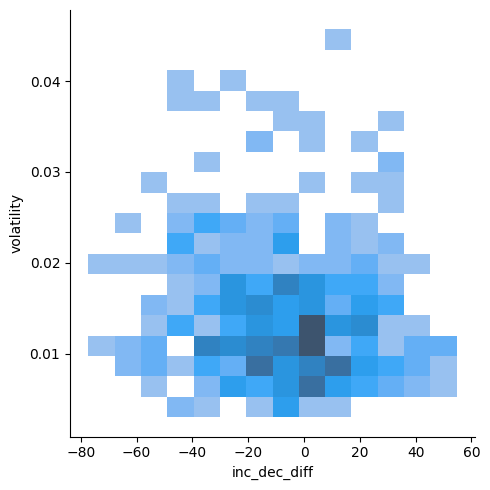

In [135]:
sns.displot(data=merged_df, x="inc_dec_diff", y="volatility")

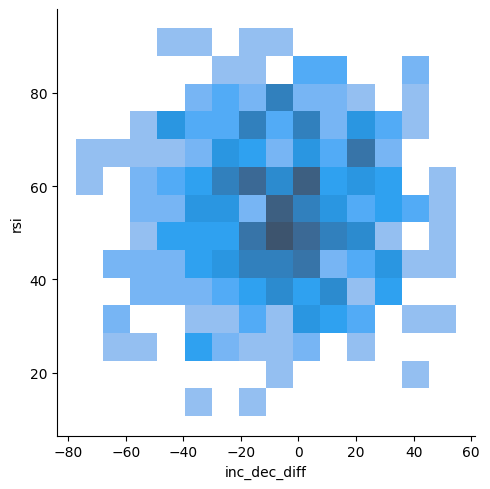

In [136]:
sns.displot(data=merged_df, x="inc_dec_diff", y="rsi")

In [137]:
vde_benchmark = pd.read_csv('/home/congress-user/data_collection/energy_data/vde.csv')
vde_benchmark = vde_benchmark.drop(columns=['Unnamed: 0'])
vde_benchmark['DATE'] = pd.to_datetime(vde_benchmark['DATE'])
vde_benchmark['year'] = vde_benchmark['DATE'].dt.year
vde_benchmark['RETURN_2'] = vde_benchmark['PRICE'].pct_change(2).shift(-2)
vde_benchmark['RETURN_3'] = vde_benchmark['PRICE'].pct_change(3).shift(-3)
vde_benchmark['RETURN_4'] = vde_benchmark['PRICE'].pct_change(4).shift(-4)
vde_benchmark['RETURN_6'] = vde_benchmark['PRICE'].pct_change(6).shift(-6)
vde_benchmark


DATE       PRICE  Volume  RETURN_1  RETURN_5  RETURN_7  RETURN_14  \
0    2004-09-29   49.970001     900  0.009005  0.052231  0.045027  -0.004603   
1    2004-09-30   50.419998    4500  0.012892  0.033122  0.025387   0.005950   
2    2004-10-01   51.070000    6700  0.000979  0.022518  0.002546   0.003133   
3    2004-10-04   51.119999    6800  0.009194  0.011346 -0.023279   0.002152   
4    2004-10-05   51.590000    8600  0.019190 -0.007560 -0.023066  -0.011436   
...         ...         ...     ...       ...       ...       ...        ...   
4858 2024-01-18  111.769997  730600  0.002505       NaN       NaN        NaN   
4859 2024-01-19  112.050003  505100  0.004016       NaN       NaN        NaN   
4860 2024-01-22  112.500000  660300  0.003022       NaN       NaN        NaN   
4861 2024-01-23  112.839996  517600  0.014445       NaN       NaN        NaN   
4862 2024-01-24  114.470001  713400       NaN       NaN       NaN        NaN   

      RETURN_21  RETURN_28  VOLUME_1  ...  VOLATILITY_5  VOLATILITY_7  \
0     -0.004603   0.010406  4.000000  ...           NaN           NaN   
1     -0.001388  -0.003372  0.488889  ...           NaN           NaN   
2     -0.018602  -0.004308  0.014925  ...           NaN           NaN   
3     -0.035016  -0.005477  0.264706  ...           NaN           NaN   
4     -0.022097   0.004071  0.674419  ...           NaN           NaN   
...         ...        ...       ...  ...           ...           ...   
4858        NaN        NaN -0.308650  ...      0.216330      0.191882   
4859        NaN        NaN  0.307266  ...      0.218600      0.186006   
4860        NaN        NaN -0.216114  ...      0.181165      0.184966   
4861        NaN        NaN  0.378284  ...      0.079150      0.186592   
4862        NaN        NaN       NaN  ...      0.091652      0.190593   

      VOLATILITY_14  VOLATILITY_21  VOLATILITY_28  year  RETURN_2  RETURN_3  \
0               NaN            NaN            NaN  2004  0.022013  0.023014   
1               NaN            NaN            NaN  2004  0.013883  0.023205   
2               NaN            NaN            NaN  2004  0.010182  0.029567   
3               NaN            NaN            NaN  2004  0.028560  0.018975   
4               NaN            NaN            NaN  2004  0.009692  0.012212   
...             ...            ...            ...   ...       ...       ...   
4858       0.182926       0.170046       0.190981  2024  0.006531  0.009573   
4859       0.179740       0.165537       0.190739  2024  0.007050  0.021597   
4860       0.182547       0.165894       0.187445  2024  0.017511       NaN   
4861       0.175293       0.164247       0.187752  2024       NaN       NaN   
4862       0.177809       0.171982       0.187615  2024       NaN       NaN   

      RETURN_4  RETURN_6  
0     0.032419  0.042425  
1     0.042840  0.035700  
2     0.019973  0.012336  
3     0.021518  0.001565  
4     0.002132 -0.032177  
...        ...       ...  
4858  0.024157       NaN  
4859       NaN       NaN  
4860       NaN       NaN  
4861       NaN       NaN  
4862       NaN       NaN  

[4863 rows x 26 columns]

In [138]:
data_df = merged_df[['date','inc_dec_diff','volatility','rsi']].merge(vde_benchmark, left_on='date',right_on='DATE')
data_df

date  inc_dec_diff  volatility        rsi       DATE      PRICE  \
0   2005-02-10     -0.327869    0.011747  84.162290 2005-02-10  57.900002   
1   2005-03-02     -8.203125    0.016653  76.399026 2005-03-02  62.950001   
2   2006-07-19      0.000000    0.015423  59.268297 2006-07-19  81.540001   
3   2005-03-09    -22.641509    0.016766  58.459098 2005-03-09  62.380001   
4   2005-06-23     -7.142857    0.012877  74.197877 2005-06-23  64.639999   
..         ...           ...         ...        ...        ...        ...   
387 2021-06-08      2.941176    0.015240  67.978990 2021-06-08  78.470001   
388 2021-02-09    -38.888889    0.018947  52.439031 2021-02-09  60.990002   
389 2021-06-29    -53.825137    0.019783  39.309885 2021-06-29  74.900002   
390 2021-07-27    -17.441860    0.025478  38.522713 2021-07-27  69.099998   
391 2021-02-18    -35.993976    0.019949  70.113578 2021-02-18  62.910000   

      Volume  RETURN_1  RETURN_5  RETURN_7  ...  VOLATILITY_5  VOLATILITY_7  \
0      18600  0.011572  0.027806  0.041796  ...      0.211866      0.184929   
1      22500  0.014138 -0.009055 -0.022399  ...      0.300617      0.263649   
2      33100 -0.023669  0.027962  0.019990  ...      0.262291      0.246410   
3     105200 -0.021962 -0.016351  0.010741  ...      0.264971      0.267300   
4      47800 -0.004796 -0.013614  0.036974  ...      0.217179      0.204720   
..       ...       ...       ...       ...  ...           ...           ...   
387   903000 -0.005225  0.006372 -0.034790  ...      0.133182      0.237294   
388   826900  0.018364  0.059682  0.049680  ...      0.353554      0.295051   
389  1041000  0.013218 -0.023498 -0.005875  ...      0.271206      0.314490   
390  1300700  0.009841  0.010709 -0.006946  ...      0.354742      0.404282   
391   840400  0.017644  0.084088  0.089016  ...      0.353701      0.316807   

     VOLATILITY_14  VOLATILITY_21  VOLATILITY_28  year  RETURN_2  RETURN_3  \
0         0.152575       0.137788       0.185820  2005  0.013126  0.012781   
1         0.245098       0.214308       0.192471  2005  0.028118  0.020651   
2         0.226148       0.214854       0.292738  2006 -0.038877 -0.011038   
3         0.259512       0.242449       0.223227  2005 -0.013466 -0.006733   
4         0.180107       0.164214       0.179628  2005  0.009437 -0.006343   
..             ...            ...            ...   ...       ...       ...   
387       0.249144       0.278819       0.289827  2021 -0.006754 -0.009048   
388       0.366285       0.375872       0.362719  2021  0.003443  0.019511   
389       0.310782       0.302675       0.271494  2021  0.031509  0.028171   
390       0.348788       0.335723       0.341999  2021  0.017945  0.002750   
391       0.351103       0.340272       0.354501  2021  0.049595  0.066285   

     RETURN_4  RETURN_6  
0    0.040587  0.049741  
1    0.017156 -0.030818  
2    0.009934  0.020726  
3   -0.020519 -0.001763  
4   -0.007426  0.005105  
..        ...       ...  
387 -0.013381  0.002931  
388  0.045745  0.031481  
389 -0.005875 -0.026569  
390 -0.005644 -0.019537  
391  0.106183  0.059450  

[392 rows x 30 columns]

In [146]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn import preprocessing 

X = data_df[['inc_dec_diff','prev7_volatility','prev14_rsi']]
y = data_df['RETURN_6']

X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size=0.3, random_state=101) 

model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test) 

print( 
  'mean_squared_error : ', mean_squared_error(y_test, predictions)) 
print( 
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions)) 

print(model.intercept_, model.coef_, model.score(X, y))

mean_squared_error :  0.0017616341022037164
mean_absolute_error :  0.03152837655578258
0.012853629977234314 [-3.13784494e-05 -3.58818160e-01 -1.58305827e-04] 0.007546397847274844


In [33]:
import statsmodels.api as sm

X = data_df[['inc_dec_diff','prev7_volatility','prev14_rsi']]
Y = data_df['RETURN_6']

S = sm.add_constant(X)

#fit linear regression model
model = sm.OLS(Y, X).fit()

#view model summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:               RETURN_6   R-squared (uncentered):                   0.007
Model:                            OLS   Adj. R-squared (uncentered):             -0.000
Method:                 Least Squares   F-statistic:                             0.9681
Date:                Fri, 29 Mar 2024   Prob (F-statistic):                       0.408
Time:                        16:03:54   Log-Likelihood:                          712.46
No. Observations:                 392   AIC:                                     -1419.
Df Residuals:                     389   BIC:                                     -1407.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [139]:
import statsmodels.api as sm

X = data_df[['inc_dec_diff','volatility','rsi']]
Y = data_df['RETURN_6']

S = sm.add_constant(X)

#fit linear regression model
model = sm.OLS(Y, X).fit()

#view model summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:               RETURN_6   R-squared (uncentered):                   0.004
Model:                            OLS   Adj. R-squared (uncentered):             -0.004
Method:                 Least Squares   F-statistic:                             0.4657
Date:                Fri, 29 Mar 2024   Prob (F-statistic):                       0.706
Time:                        16:30:00   Log-Likelihood:                          711.70
No. Observations:                 392   AIC:                                     -1417.
Df Residuals:                     389   BIC:                                     -1405.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [34]:
import statsmodels.api as sm

X = data_df[['inc_dec_diff','prev7_volatility','prev14_rsi']]
Y = data_df['RETURN_7']

S = sm.add_constant(X)

#fit linear regression model
model = sm.OLS(Y, X).fit()

#view model summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:               RETURN_7   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):             -0.004
Method:                 Least Squares   F-statistic:                             0.4542
Date:                Fri, 29 Mar 2024   Prob (F-statistic):                       0.714
Time:                        16:04:05   Log-Likelihood:                          686.23
No. Observations:                 392   AIC:                                     -1366.
Df Residuals:                     389   BIC:                                     -1355.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [36]:
import statsmodels.api as sm

X = data_df[['inc_dec_diff','prev7_volatility','prev14_rsi']]
Y = data_df['PRICE']

S = sm.add_constant(X)

#fit linear regression model
model = sm.OLS(Y, X).fit()

#view model summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  PRICE   R-squared (uncentered):                   0.909
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                              1301.
Date:                Fri, 29 Mar 2024   Prob (F-statistic):                   2.30e-202
Time:                        16:04:39   Log-Likelihood:                         -1883.4
No. Observations:                 392   AIC:                                      3773.
Df Residuals:                     389   BIC:                                      3785.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

### filter out by more criteria - volatility & rsi

In [140]:
# return: 1day, volatility: 7 day, rsi: 14 day
vde_df = pd.read_csv('/home/congress-user/data_collection/energy_data/vde.csv')
vde_df = vde_df.drop(columns=['Unnamed: 0'])
vde_df['DATE'] = pd.to_datetime(vde_df['DATE'])
vde_df['year'] = vde_df['DATE'].dt.year
vde_df = vde_df[['DATE','year','PRICE','Volume']]
vde_df['returns'] = vde_df['PRICE'].pct_change()
vde_df['log_ret'] = np.log(vde_df['PRICE']) - np.log(vde_df['PRICE'].shift(1))
vde_df['volatility'] = vde_df['log_ret'].rolling(window=7).std()

def rsi_calc(df):
    change = df['PRICE'].diff()
    change.dropna(inplace=True)
    change_up = change.copy()
    change_down = change.copy()
    change_up[change_up<0] = 0
    change_down[change_down>0] = 0
    change.equals(change_up+change_down)
    
    avg_up = change_up.rolling(14).mean()
    avg_down = change_down.rolling(14).mean().abs()
    rsi = 100*avg_up/(avg_up+avg_down)
    return rsi

vde_df['rsi'] = rsi_calc(vde_df)

# vde_df['prev7_volatility'] = vde_df['volatility'].shift(7)
# vde_df['prev14_rsi'] = vde_df['rsi'].shift(14)
# vde_df = vde_df[~vde_df['prev7_volatility'].isna()]
# vde_df = vde_df[~vde_df['prev14_rsi'].isna()]
vde_df = vde_df[~vde_df['volatility'].isna()]
vde_df = vde_df[~vde_df['rsi'].isna()]
vde_df

DATE  year       PRICE  Volume   returns   log_ret  volatility  \
14   2004-10-19  2004   49.740002     400 -0.004802 -0.004813    0.010765   
15   2004-10-20  2004   50.720001   10600  0.019702  0.019511    0.014501   
16   2004-10-21  2004   51.230000   14100  0.010055  0.010005    0.014831   
17   2004-10-22  2004   51.230000    3800  0.000000  0.000000    0.009954   
18   2004-10-25  2004   51.000000   11700 -0.004490 -0.004500    0.010011   
...         ...   ...         ...     ...       ...       ...         ...   
4858 2024-01-18  2024  111.769997  730600 -0.000983 -0.000984    0.012087   
4859 2024-01-19  2024  112.050003  505100  0.002505  0.002502    0.011717   
4860 2024-01-22  2024  112.500000  660300  0.004016  0.004008    0.011652   
4861 2024-01-23  2024  112.839996  517600  0.003022  0.003018    0.011754   
4862 2024-01-24  2024  114.470001  713400  0.014445  0.014342    0.012006   

            rsi  
14    48.306341  
15    52.049199  
16    51.114206  
17    50.771395  
18    45.718435  
...         ...  
4858  27.080824  
4859  31.443672  
4860  34.296996  
4861  30.507311  
4862  30.891523  

[4849 rows x 8 columns]

In [141]:
filtered2 = analysis2.merge(vde_df, left_on='date',right_on='DATE')
filtered2

hearing_num  sentence_count  keyword_count  irrel_count  rel_count  \
0         109-1           11883           4591          931       3660   
1        109-11            2334            270           14        256   
2       109-118            1414            169           20        149   
3         109-2            2434             78           25         53   
4        109-27            2225             92           36         56   
..          ...             ...            ...          ...        ...   
387      117-36            1673             49           15         34   
388       117-4            1867            416           38        378   
389      117-40            2932            591          225        366   
390      117-45            2235            453          109        344   
391       117-6            2586            775          111        664   

     neutral_count  inc_count  dec_count       date year_x  ...    dec_pct  \
0             1778        935        947 2005-02-10   2005  ...   7.969368   
1              133         51         72 2005-03-02   2005  ...   3.084833   
2               83         33         33 2006-07-19   2006  ...   2.333805   
3               33          4         16 2005-03-09   2005  ...   0.657354   
4               44          4          8 2005-06-23   2005  ...   0.359551   
..             ...        ...        ...        ...    ...  ...        ...   
387             21          7          6 2021-06-08   2021  ...   0.358637   
388             87         72        219 2021-02-09   2021  ...  11.730048   
389            117         26        223 2021-06-29   2021  ...   7.605730   
390            192         46        106 2021-07-27   2021  ...   4.742729   
391            225        100        339 2021-02-18   2021  ...  13.109049   

    inc_dec_diff       DATE  year_y      PRICE   Volume   returns   log_ret  \
0      -0.327869 2005-02-10    2005  57.900002    18600  0.025868  0.025539   
1      -8.203125 2005-03-02    2005  62.950001    22500  0.013851  0.013756   
2       0.000000 2006-07-19    2006  81.540001    33100  0.009783  0.009736   
3     -22.641509 2005-03-09    2005  62.380001   105200 -0.025769 -0.026107   
4      -7.142857 2005-06-23    2005  64.639999    47800 -0.001082 -0.001082   
..           ...        ...     ...        ...      ...       ...       ...   
387     2.941176 2021-06-08    2021  78.470001   903000  0.009001  0.008961   
388   -38.888889 2021-02-09    2021  60.990002   826900 -0.010063 -0.010114   
389   -53.825137 2021-06-29    2021  74.900002  1041000 -0.005312 -0.005326   
390   -17.441860 2021-07-27    2021  69.099998  1300700 -0.012293 -0.012369   
391   -35.993976 2021-02-18    2021  62.910000   840400 -0.026613 -0.026974   

    volatility        rsi  
0     0.011649  84.162290  
1     0.016608  76.399026  
2     0.015522  59.268297  
3     0.016838  58.459098  
4     0.012896  74.197877  
..         ...        ...  
387   0.014948  67.978990  
388   0.018586  52.439031  
389   0.019811  39.309885  
390   0.025467  38.522713  
391   0.019957  70.113578  

[392 rows x 26 columns]

In [101]:
filtered2['prev7_volatility'].describe(percentiles=[0.1, 0.25, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 1.0])

count    392.000000
mean       0.014056
std        0.007442
min        0.003137
10%        0.006683
25%        0.008764
50%        0.012348
60%        0.013981
70%        0.016342
75%        0.017334
80%        0.018989
90%        0.023024
100%       0.046631
max        0.046631
Name: prev7_volatility, dtype: float64

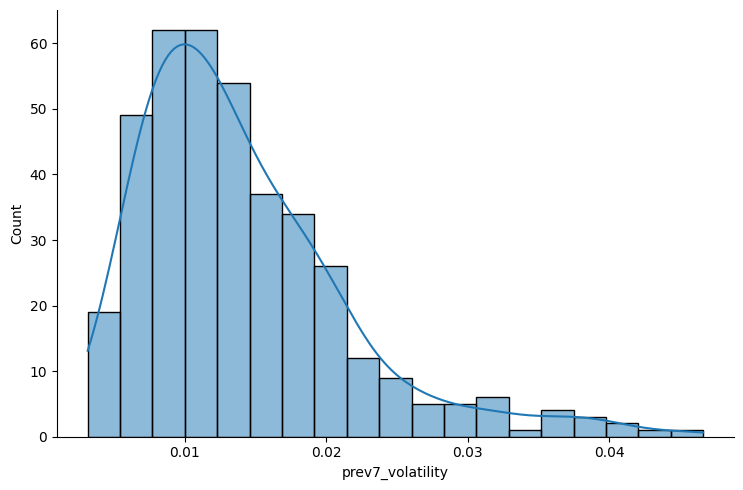

In [102]:
g = sns.displot(filtered2['prev7_volatility'], kde=True)
g.fig.set_size_inches(8,5)

In [82]:
filtered2['prev14_rsi'].describe(percentiles=[0.1, 0.25, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 1.0])

count    392.000000
mean      52.796774
std       15.827892
min       10.704179
10%       32.200938
25%       41.345882
50%       51.801919
60%       57.066289
70%       61.843432
75%       63.494088
80%       66.732956
90%       74.241381
100%      95.379772
max       95.379772
Name: prev14_rsi, dtype: float64

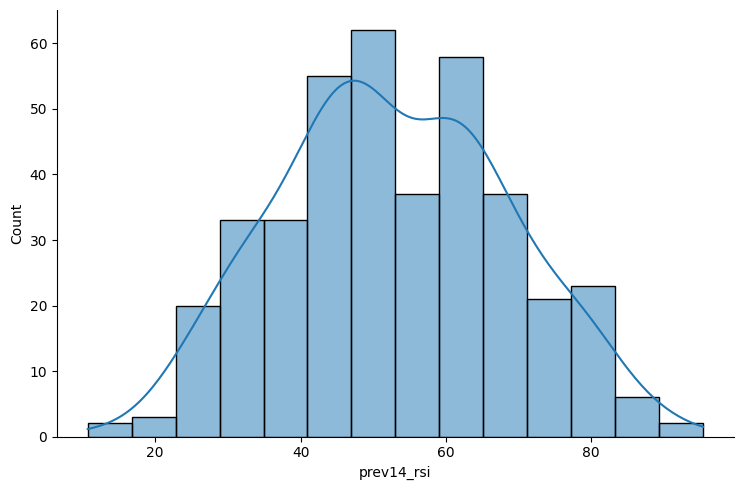

In [67]:
g = sns.displot(filtered2['prev14_rsi'], kde=True)
g.fig.set_size_inches(8,5)

In [142]:
# filtered4 = filtered3[(filtered3['rsi'] <= 40) | (filtered3['rsi'] >= 60)].copy()
# filtered4 = filtered2[(filtered2['prev14_rsi'] >= 70) | (filtered2['prev14_rsi'] <= 30)].copy()
# filtered4 = filtered4[filtered4['prev7_volatility'] >= 0.012].copy()
filtered4 = filtered2[(filtered2['rsi'] >= 70) | (filtered2['rsi'] <= 30)].copy()
filtered4 = filtered4[filtered4['volatility'] >= 0.012].copy()
filtered4.head(5)
# filtered4


hearing_num  sentence_count  keyword_count  irrel_count  rel_count  \
1       109-11            2334            270           14        256   
4       109-27            2225             92           36         56   
7       109-30            1716            165            5        160   
8       109-32            7745           2021          210       1811   
31     110-119            1831            126           13        113   

    neutral_count  inc_count  dec_count       date year_x  ...   dec_pct  \
1             133         51         72 2005-03-02   2005  ...  3.084833   
4              44          4          8 2005-06-23   2005  ...  0.359551   
7             152          8          0 2005-06-21   2005  ...  0.000000   
8            1160        578         73 2005-09-07   2005  ...  0.942544   
31             56         32         25 2008-05-20   2008  ...  1.365374   

   inc_dec_diff       DATE  year_y       PRICE  Volume   returns   log_ret  \
1     -8.203125 2005-03-02    2005   62.950001   22500  0.013851  0.013756   
4     -7.142857 2005-06-23    2005   64.639999   47800 -0.001082 -0.001082   
7      5.000000 2005-06-21    2005   64.540001   25100 -0.020637 -0.020853   
8     27.885146 2005-09-07    2005   73.690002   32700  0.002722  0.002718   
31     6.194690 2008-05-20    2008  130.520004   67400  0.008889  0.008850   

   volatility        rsi  
1    0.016608  76.399026  
4    0.012896  74.197877  
7    0.012769  75.812767  
8    0.017730  75.368976  
31   0.012347  74.893776  

[5 rows x 26 columns]

In [143]:
vde_benchmark = pd.read_csv('/home/congress-user/data_collection/energy_data/vde.csv')
vde_benchmark = vde_benchmark.drop(columns=['Unnamed: 0'])
vde_benchmark['DATE'] = pd.to_datetime(vde_benchmark['DATE'])
vde_benchmark['year'] = vde_benchmark['DATE'].dt.year
vde_benchmark['RETURN_2'] = vde_benchmark['PRICE'].pct_change(2).shift(-2)
vde_benchmark['RETURN_3'] = vde_benchmark['PRICE'].pct_change(3).shift(-3)
vde_benchmark['RETURN_4'] = vde_benchmark['PRICE'].pct_change(4).shift(-4)
vde_benchmark['RETURN_6'] = vde_benchmark['PRICE'].pct_change(6).shift(-6)
vde_benchmark
# vde_2008 = vde_2008[vde_2008['year'] == 2009]
# vde_df.plot(x='DATE',y='PRICE',figsize=(15,4))

DATE       PRICE  Volume  RETURN_1  RETURN_5  RETURN_7  RETURN_14  \
0    2004-09-29   49.970001     900  0.009005  0.052231  0.045027  -0.004603   
1    2004-09-30   50.419998    4500  0.012892  0.033122  0.025387   0.005950   
2    2004-10-01   51.070000    6700  0.000979  0.022518  0.002546   0.003133   
3    2004-10-04   51.119999    6800  0.009194  0.011346 -0.023279   0.002152   
4    2004-10-05   51.590000    8600  0.019190 -0.007560 -0.023066  -0.011436   
...         ...         ...     ...       ...       ...       ...        ...   
4858 2024-01-18  111.769997  730600  0.002505       NaN       NaN        NaN   
4859 2024-01-19  112.050003  505100  0.004016       NaN       NaN        NaN   
4860 2024-01-22  112.500000  660300  0.003022       NaN       NaN        NaN   
4861 2024-01-23  112.839996  517600  0.014445       NaN       NaN        NaN   
4862 2024-01-24  114.470001  713400       NaN       NaN       NaN        NaN   

      RETURN_21  RETURN_28  VOLUME_1  ...  VOLATILITY_5  VOLATILITY_7  \
0     -0.004603   0.010406  4.000000  ...           NaN           NaN   
1     -0.001388  -0.003372  0.488889  ...           NaN           NaN   
2     -0.018602  -0.004308  0.014925  ...           NaN           NaN   
3     -0.035016  -0.005477  0.264706  ...           NaN           NaN   
4     -0.022097   0.004071  0.674419  ...           NaN           NaN   
...         ...        ...       ...  ...           ...           ...   
4858        NaN        NaN -0.308650  ...      0.216330      0.191882   
4859        NaN        NaN  0.307266  ...      0.218600      0.186006   
4860        NaN        NaN -0.216114  ...      0.181165      0.184966   
4861        NaN        NaN  0.378284  ...      0.079150      0.186592   
4862        NaN        NaN       NaN  ...      0.091652      0.190593   

      VOLATILITY_14  VOLATILITY_21  VOLATILITY_28  year  RETURN_2  RETURN_3  \
0               NaN            NaN            NaN  2004  0.022013  0.023014   
1               NaN            NaN            NaN  2004  0.013883  0.023205   
2               NaN            NaN            NaN  2004  0.010182  0.029567   
3               NaN            NaN            NaN  2004  0.028560  0.018975   
4               NaN            NaN            NaN  2004  0.009692  0.012212   
...             ...            ...            ...   ...       ...       ...   
4858       0.182926       0.170046       0.190981  2024  0.006531  0.009573   
4859       0.179740       0.165537       0.190739  2024  0.007050  0.021597   
4860       0.182547       0.165894       0.187445  2024  0.017511       NaN   
4861       0.175293       0.164247       0.187752  2024       NaN       NaN   
4862       0.177809       0.171982       0.187615  2024       NaN       NaN   

      RETURN_4  RETURN_6  
0     0.032419  0.042425  
1     0.042840  0.035700  
2     0.019973  0.012336  
3     0.021518  0.001565  
4     0.002132 -0.032177  
...        ...       ...  
4858  0.024157       NaN  
4859       NaN       NaN  
4860       NaN       NaN  
4861       NaN       NaN  
4862       NaN       NaN  

[4863 rows x 26 columns]

In [144]:
data_df = filtered4[['date','inc_dec_diff']].merge(vde_benchmark, left_on='date',right_on='DATE')
data_df.head(5)

date  inc_dec_diff       DATE       PRICE  Volume  RETURN_1  RETURN_5  \
0 2005-03-02     -8.203125 2005-03-02   62.950001   22500  0.014138 -0.009055   
1 2005-06-23     -7.142857 2005-06-23   64.639999   47800 -0.004796 -0.013614   
2 2005-06-21      5.000000 2005-06-21   64.540001   25100  0.002634 -0.004803   
3 2005-09-07     27.885146 2005-09-07   73.690002   32700 -0.000679  0.008006   
4 2008-05-20      6.194690 2008-05-20  130.520004   67400 -0.008658 -0.031336   

   RETURN_7  RETURN_14  RETURN_21  ...  VOLATILITY_5  VOLATILITY_7  \
0 -0.022399  -0.016680   0.001906  ...      0.300617      0.263649   
1  0.036974   0.012840   0.061417  ...      0.217179      0.204720   
2 -0.012086   0.045863   0.021227  ...      0.247112      0.202695   
3  0.020084   0.045596  -0.051432  ...      0.341379      0.281452   
4 -0.042522  -0.032102  -0.025896  ...      0.213488      0.195995   

   VOLATILITY_14  VOLATILITY_21  VOLATILITY_28  year  RETURN_2  RETURN_3  \
0       0.245098       0.214308       0.192471  2005  0.028118  0.020651   
1       0.180107       0.164214       0.179628  2005  0.009437 -0.006343   
2       0.179209       0.168347       0.236714  2005  0.001549 -0.003254   
3       0.220061       0.234675       0.215275  2005  0.024427  0.005564   
4       0.232900       0.236119       0.235955  2008 -0.021453 -0.040300   

   RETURN_4  RETURN_6  
0  0.017156 -0.030818  
1 -0.007426  0.005105  
2  0.011001 -0.005888  
3 -0.002714  0.010042  
4 -0.043978 -0.049188  

[5 rows x 28 columns]

Text(0.5, 1.0, 'inc_dec_diff and sentenc_count bivariate kde')

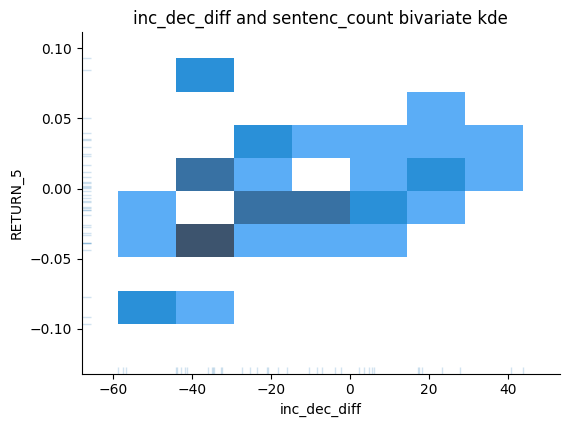

In [145]:
g = sns.displot(data=data_df, x="inc_dec_diff", y="RETURN_5", 
            rug=True, rug_kws={"alpha": 0.2, "height": 0.02})

g.fig.set_size_inches(6,4)
plt.title('inc_dec_diff and sentenc_count bivariate kde')

Text(0.5, 1.0, 'inc_dec_diff and sentenc_count bivariate kde')

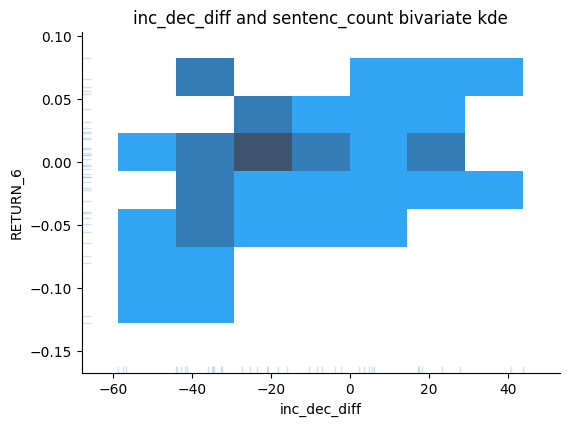

In [149]:
g = sns.displot(data=data_df, x="inc_dec_diff", y="RETURN_6", 
            rug=True, rug_kws={"alpha": 0.2, "height": 0.02})

g.fig.set_size_inches(6,4)
plt.title('inc_dec_diff and sentenc_count bivariate kde')

Text(0.5, 1.0, 'inc_dec_diff and sentenc_count bivariate kde')

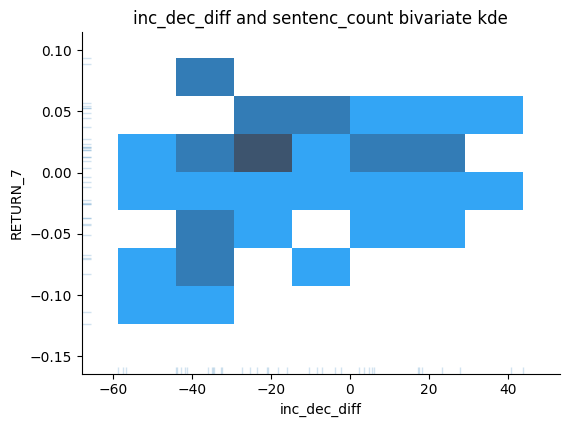

In [150]:
g = sns.displot(data=data_df, x="inc_dec_diff", y="RETURN_7", 
            rug=True, rug_kws={"alpha": 0.2, "height": 0.02})

g.fig.set_size_inches(6,4)
plt.title('inc_dec_diff and sentenc_count bivariate kde')

Text(0.5, 1.0, 'inc_dec_diff and sentenc_count bivariate kde')

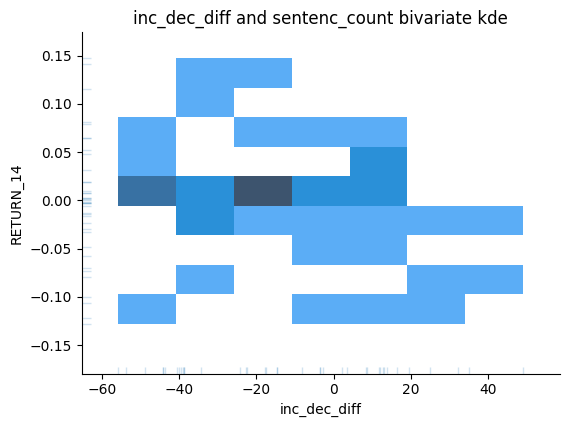

In [92]:
g = sns.displot(data=data_df, x="inc_dec_diff", y="RETURN_14", 
            rug=True, rug_kws={"alpha": 0.2, "height": 0.02})

g.fig.set_size_inches(6,4)
plt.title('inc_dec_diff and sentenc_count bivariate kde')

Text(0.5, 1.0, 'inc_dec_diff and sentenc_count bivariate kde')

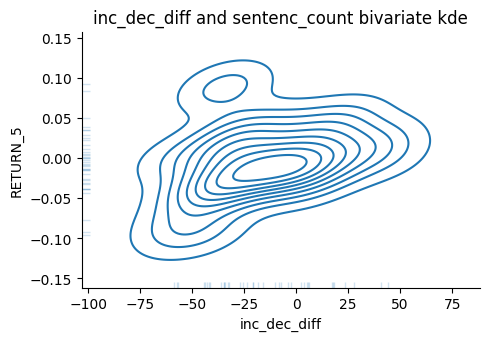

In [151]:
g = sns.displot(data=data_df, x="inc_dec_diff", y="RETURN_5", 
            rug=True, kind='kde', rug_kws={"alpha": 0.2, "height": 0.02})

g.fig.set_size_inches(5,3)
plt.title('inc_dec_diff and sentenc_count bivariate kde')

Text(0.5, 1.0, 'inc_dec_diff and sentenc_count bivariate kde')

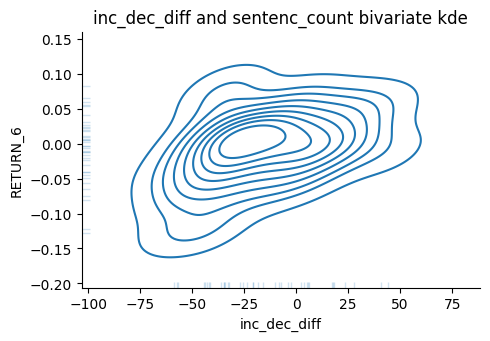

In [152]:
g = sns.displot(data=data_df, x="inc_dec_diff", y="RETURN_6", 
            rug=True, kind='kde', rug_kws={"alpha": 0.2, "height": 0.02})

g.fig.set_size_inches(5,3)
plt.title('inc_dec_diff and sentenc_count bivariate kde')

Text(0.5, 1.0, 'inc_dec_diff and sentenc_count bivariate kde')

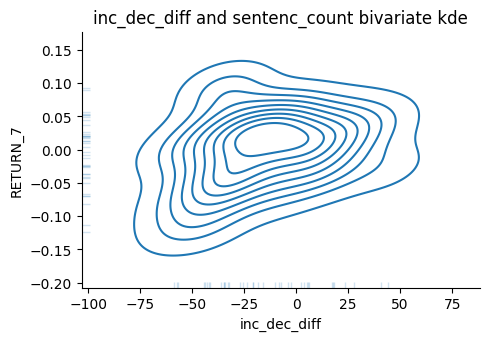

In [153]:
g = sns.displot(data=data_df, x="inc_dec_diff", y="RETURN_7", 
            rug=True, kind='kde', rug_kws={"alpha": 0.2, "height": 0.02})

g.fig.set_size_inches(5,3)
plt.title('inc_dec_diff and sentenc_count bivariate kde')

Text(0.5, 1.0, 'inc_dec_diff and sentenc_count bivariate kde')

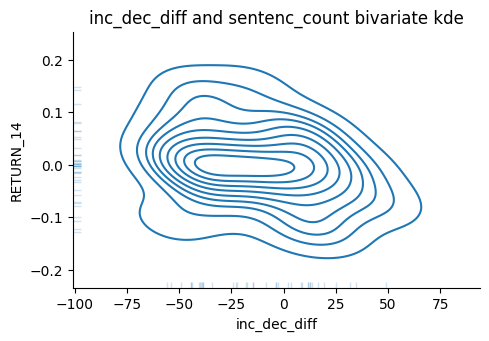

In [94]:
g = sns.displot(data=data_df, x="inc_dec_diff", y="RETURN_14", 
            rug=True, kind='kde', rug_kws={"alpha": 0.2, "height": 0.02})

g.fig.set_size_inches(5,3)
plt.title('inc_dec_diff and sentenc_count bivariate kde')

<Axes: xlabel='inc_dec_diff', ylabel='RETURN_28'>

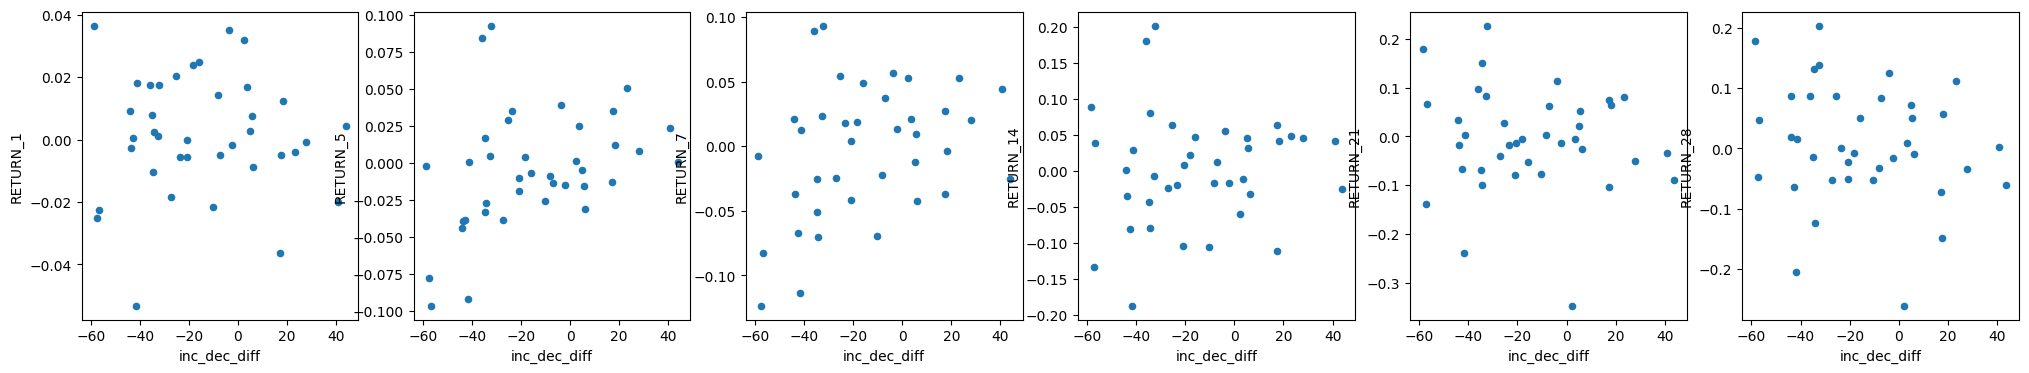

In [146]:
# threshold: vol - 0.12, rsi - 30/70
fig, axes = plt.subplots(nrows=1, ncols=6,figsize=(25,4))

data_df.plot(x='inc_dec_diff',y='RETURN_1',kind='scatter',ax=axes[0])
data_df.plot(x='inc_dec_diff',y='RETURN_5',kind='scatter',ax=axes[1])
data_df.plot(x='inc_dec_diff',y='RETURN_7',kind='scatter',ax=axes[2])
data_df.plot(x='inc_dec_diff',y='RETURN_14',kind='scatter',ax=axes[3])
data_df.plot(x='inc_dec_diff',y='RETURN_21',kind='scatter',ax=axes[4])
data_df.plot(x='inc_dec_diff',y='RETURN_28',kind='scatter',ax=axes[5])

Text(0.5, 1.0, 'inc_dec_diff and sentenc_count bivariate kde')

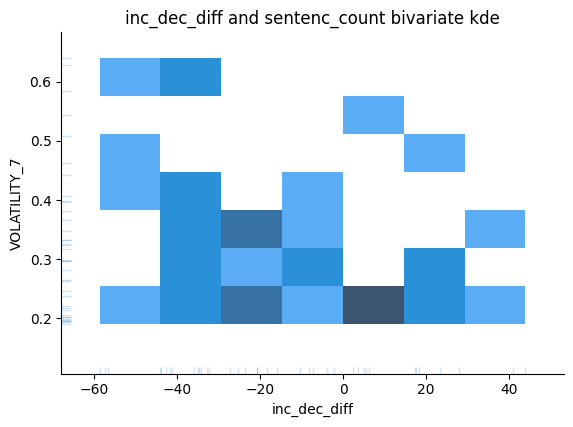

In [154]:
g = sns.displot(data=data_df, x="inc_dec_diff", y="VOLATILITY_7", 
            rug=True, rug_kws={"alpha": 0.2, "height": 0.02})

g.fig.set_size_inches(6,4)
plt.title('inc_dec_diff and sentenc_count bivariate kde')

Text(0.5, 1.0, 'inc_dec_diff and sentenc_count bivariate kde')

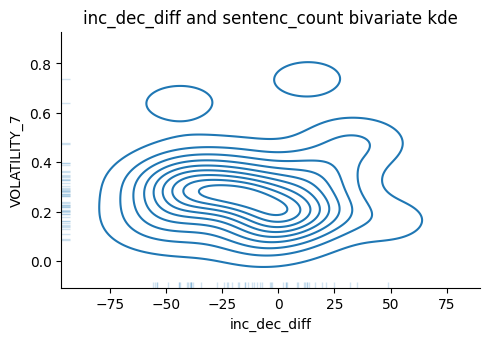

In [77]:
g = sns.displot(data=data_df, x="inc_dec_diff", y="VOLATILITY_7", kind='kde',
            rug=True, rug_kws={"alpha": 0.2, "height": 0.02})

g.fig.set_size_inches(5,3)
plt.title('inc_dec_diff and sentenc_count bivariate kde')

In [147]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

smf.ols(formula='RETURN_5 ~ inc_dec_diff', data=data_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               RETURN_5   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     5.684
Date:                Fri, 29 Mar 2024   Prob (F-statistic):             0.0225
Time:                        16:31:20   Log-Likelihood:                 71.847
No. Observations:                  38   AIC:                            -139.7
Df Residuals:                      36   BIC:                            -136.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0031      0.007      0.442      0.661      -0.011       0.017
inc_dec_diff     0.0005      0.000      2.384      0.023    8.09e-05       0.001
==============================================================================
Omnibus:                        9.070   Durbin-Watson:                   1.610
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.367
Skew:                           0.862   Prob(JB):                       0.0152
Kurtosis:                       4.521   Cond. No.                         35.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [148]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

smf.ols(formula='RETURN_6 ~ inc_dec_diff', data=data_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               RETURN_6   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     8.900
Date:                Fri, 29 Mar 2024   Prob (F-statistic):            0.00510
Time:                        16:31:28   Log-Likelihood:                 66.259
No. Observations:                  38   AIC:                            -128.5
Df Residuals:                      36   BIC:                            -125.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0039      0.008      0.479      0.635      -0.012       0.020
inc_dec_diff     0.0008      0.000      2.983      0.005       0.000       0.001
==============================================================================
Omnibus:                        0.273   Durbin-Watson:                   1.737
Prob(Omnibus):                  0.872   Jarque-Bera (JB):                0.002
Skew:                           0.003   Prob(JB):                        0.999
Kurtosis:                       3.037   Cond. No.                         35.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### shift volatility -7

In [15]:
# return: 1day, volatility: 7 day, rsi: 14 day
vde_df = pd.read_csv('/home/congress-user/data_collection/energy_data/vde.csv')
vde_df = vde_df.drop(columns=['Unnamed: 0'])
vde_df['DATE'] = pd.to_datetime(vde_df['DATE'])
vde_df['year'] = vde_df['DATE'].dt.year
vde_df = vde_df[['DATE','year','PRICE','Volume']]
vde_df['returns'] = vde_df['PRICE'].pct_change()
vde_df['log_ret'] = np.log(vde_df['PRICE']) - np.log(vde_df['PRICE'].shift(1))
vde_df['volatility'] = vde_df['log_ret'].rolling(window=7).std()

def rsi_calc(df):
    change = df['PRICE'].diff()
    change.dropna(inplace=True)
    change_up = change.copy()
    change_down = change.copy()
    change_up[change_up<0] = 0
    change_down[change_down>0] = 0
    change.equals(change_up+change_down)
    
    avg_up = change_up.rolling(14).mean()
    avg_down = change_down.rolling(14).mean().abs()
    rsi = 100*avg_up/(avg_up+avg_down)
    return rsi

vde_df['rsi'] = rsi_calc(vde_df)

vde_df['prev7_volatility'] = vde_df['volatility'].shift(7)
vde_df = vde_df[~vde_df['prev7_volatility'].isna()]
vde_df = vde_df[~vde_df['rsi'].isna()]
vde_df

DATE  year       PRICE  Volume   returns   log_ret  volatility  \
14   2004-10-19  2004   49.740002     400 -0.004802 -0.004813    0.010765   
15   2004-10-20  2004   50.720001   10600  0.019702  0.019511    0.014501   
16   2004-10-21  2004   51.230000   14100  0.010055  0.010005    0.014831   
17   2004-10-22  2004   51.230000    3800  0.000000  0.000000    0.009954   
18   2004-10-25  2004   51.000000   11700 -0.004490 -0.004500    0.010011   
...         ...   ...         ...     ...       ...       ...         ...   
4858 2024-01-18  2024  111.769997  730600 -0.000983 -0.000984    0.012087   
4859 2024-01-19  2024  112.050003  505100  0.002505  0.002502    0.011717   
4860 2024-01-22  2024  112.500000  660300  0.004016  0.004008    0.011652   
4861 2024-01-23  2024  112.839996  517600  0.003022  0.003018    0.011754   
4862 2024-01-24  2024  114.470001  713400  0.014445  0.014342    0.012006   

            rsi  prev7_volatility  
14    48.306341          0.009195  
15    52.049199          0.010911  
16    51.114206          0.011057  
17    50.771395          0.014635  
18    45.718435          0.014667  
...         ...               ...  
4858  27.080824          0.011617  
4859  31.443672          0.011843  
4860  34.296996          0.012139  
4861  30.507311          0.010811  
4862  30.891523          0.010856  

[4849 rows x 9 columns]

In [16]:
filtered2 = analysis2.merge(vde_df, left_on='date',right_on='DATE')
filtered2

hearing_num  sentence_count  keyword_count  irrel_count  rel_count  \
0         109-1           11883           4591          931       3660   
1        109-11            2334            270           14        256   
2       109-118            1414            169           20        149   
3         109-2            2434             78           25         53   
4        109-27            2225             92           36         56   
..          ...             ...            ...          ...        ...   
387      117-36            1673             49           15         34   
388       117-4            1867            416           38        378   
389      117-40            2932            591          225        366   
390      117-45            2235            453          109        344   
391       117-6            2586            775          111        664   

     neutral_count  inc_count  dec_count       date year_x  ... inc_dec_diff  \
0             1778        935        947 2005-02-10   2005  ...    -0.327869   
1              133         51         72 2005-03-02   2005  ...    -8.203125   
2               83         33         33 2006-07-19   2006  ...     0.000000   
3               33          4         16 2005-03-09   2005  ...   -22.641509   
4               44          4          8 2005-06-23   2005  ...    -7.142857   
..             ...        ...        ...        ...    ...  ...          ...   
387             21          7          6 2021-06-08   2021  ...     2.941176   
388             87         72        219 2021-02-09   2021  ...   -38.888889   
389            117         26        223 2021-06-29   2021  ...   -53.825137   
390            192         46        106 2021-07-27   2021  ...   -17.441860   
391            225        100        339 2021-02-18   2021  ...   -35.993976   

          DATE  year_y      PRICE   Volume   returns   log_ret  volatility  \
0   2005-02-10    2005  57.900002    18600  0.025868  0.025539    0.011649   
1   2005-03-02    2005  62.950001    22500  0.013851  0.013756    0.016608   
2   2006-07-19    2006  81.540001    33100  0.009783  0.009736    0.015522   
3   2005-03-09    2005  62.380001   105200 -0.025769 -0.026107    0.016838   
4   2005-06-23    2005  64.639999    47800 -0.001082 -0.001082    0.012896   
..         ...     ...        ...      ...       ...       ...         ...   
387 2021-06-08    2021  78.470001   903000  0.009001  0.008961    0.014948   
388 2021-02-09    2021  60.990002   826900 -0.010063 -0.010114    0.018586   
389 2021-06-29    2021  74.900002  1041000 -0.005312 -0.005326    0.019811   
390 2021-07-27    2021  69.099998  1300700 -0.012293 -0.012369    0.025467   
391 2021-02-18    2021  62.910000   840400 -0.026613 -0.026974    0.019957   

           rsi  prev7_volatility  
0    84.162290          0.008027  
1    76.399026          0.014918  
2    59.268297          0.013479  
3    58.459098          0.015597  
4    74.197877          0.010577  
..         ...               ...  
387  67.978990          0.013870  
388  52.439031          0.015941  
389  39.309885          0.019224  
390  38.522713          0.018068  
391  70.113578          0.024514  

[392 rows x 27 columns]

In [23]:
filtered2['prev7_volatility'].describe(percentiles=[0.1, 0.25, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 1.0])

count    392.000000
mean       0.014056
std        0.007442
min        0.003137
10%        0.006683
25%        0.008764
50%        0.012348
60%        0.013981
70%        0.016342
75%        0.017334
80%        0.018989
90%        0.023024
100%       0.046631
max        0.046631
Name: prev7_volatility, dtype: float64

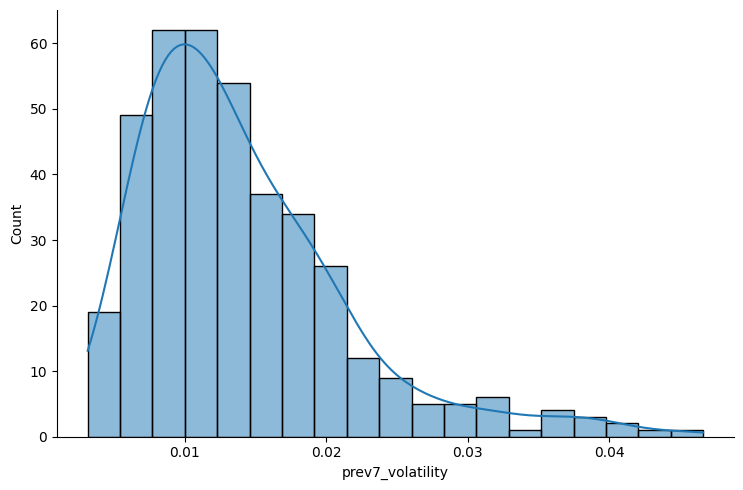

In [ ]:
g = sns.displot(filtered2['prev7_volatility'], kde=True)
g.fig.set_size_inches(8,5)

In [24]:
filtered2['rsi'].describe(percentiles=[0.1, 0.25, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 1.0])

count    392.000000
mean      54.728699
std       15.390045
min       10.669229
10%       34.462694
25%       43.610268
50%       55.112076
60%       58.846494
70%       62.905000
75%       66.184693
80%       68.678496
90%       75.053728
100%      93.791548
max       93.791548
Name: rsi, dtype: float64

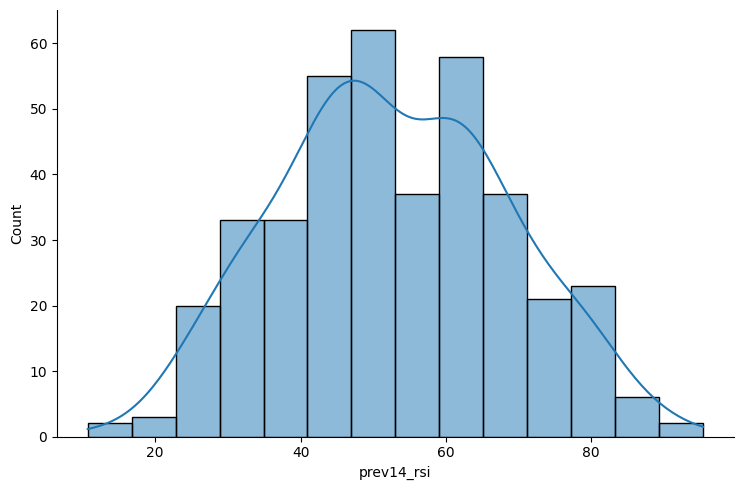

In [ ]:
g = sns.displot(filtered2['prev14_rsi'], kde=True)
g.fig.set_size_inches(8,5)

In [17]:
# filtered4 = filtered3[(filtered3['rsi'] <= 40) | (filtered3['rsi'] >= 60)].copy()
# filtered4 = filtered2[(filtered2['prev14_rsi'] >= 70) | (filtered2['prev14_rsi'] <= 30)].copy()
filtered4 = filtered2[(filtered2['rsi'] >= 70) | (filtered2['rsi'] <= 30)].copy()
filtered4 = filtered4[filtered4['prev7_volatility'] >= 0.012].copy()
# filtered4 = filtered4[filtered4['volatility'] >= 0.012].copy()
filtered4.head(5)
# filtered4


hearing_num  sentence_count  keyword_count  irrel_count  rel_count  \
1       109-11            2334            270           14        256   
31     110-119            1831            126           13        113   
37     110-135            1109            274           21        253   
38     110-136            1153            362           55        307   
40     110-145            1610            261          217         44   

    neutral_count  inc_count  dec_count       date year_x  ... inc_dec_diff  \
1             133         51         72 2005-03-02   2005  ...    -8.203125   
31             56         32         25 2008-05-20   2008  ...     6.194690   
37            131         48         74 2008-07-15   2008  ...   -10.276680   
38            184          8        115 2008-07-17   2008  ...   -34.853420   
40             37          4          3 2008-09-11   2008  ...     2.272727   

         DATE  year_y       PRICE  Volume   returns   log_ret  volatility  \
1  2005-03-02    2005   62.950001   22500  0.013851  0.013756    0.016608   
31 2008-05-20    2008  130.520004   67400  0.008889  0.008850    0.012347   
37 2008-07-15    2008  116.750000  181700 -0.039806 -0.040620    0.025070   
38 2008-07-17    2008  112.320000  158800 -0.016807 -0.016950    0.024982   
40 2008-09-11    2008   97.830002  286800  0.014518  0.014414    0.034292   

          rsi  prev7_volatility  
1   76.399026          0.014918  
31  74.893776          0.017486  
37  29.897615          0.014812  
38  27.452213          0.016938  
40  27.760456          0.024375  

[5 rows x 27 columns]

#### VDE

In [18]:
vde_benchmark = pd.read_csv('/home/congress-user/data_collection/energy_data/vde.csv')
vde_benchmark = vde_benchmark.drop(columns=['Unnamed: 0'])
vde_benchmark['DATE'] = pd.to_datetime(vde_benchmark['DATE'])
vde_benchmark['year'] = vde_benchmark['DATE'].dt.year
vde_benchmark['RETURN_2'] = vde_benchmark['PRICE'].pct_change(2).shift(-2)
vde_benchmark['RETURN_3'] = vde_benchmark['PRICE'].pct_change(3).shift(-3)
vde_benchmark['RETURN_4'] = vde_benchmark['PRICE'].pct_change(4).shift(-4)
vde_benchmark['RETURN_6'] = vde_benchmark['PRICE'].pct_change(6).shift(-6)
vde_benchmark
# vde_2008 = vde_2008[vde_2008['year'] == 2009]
# vde_df.plot(x='DATE',y='PRICE',figsize=(15,4))

DATE       PRICE  Volume  RETURN_1  RETURN_5  RETURN_7  RETURN_14  \
0    2004-09-29   49.970001     900  0.009005  0.052231  0.045027  -0.004603   
1    2004-09-30   50.419998    4500  0.012892  0.033122  0.025387   0.005950   
2    2004-10-01   51.070000    6700  0.000979  0.022518  0.002546   0.003133   
3    2004-10-04   51.119999    6800  0.009194  0.011346 -0.023279   0.002152   
4    2004-10-05   51.590000    8600  0.019190 -0.007560 -0.023066  -0.011436   
...         ...         ...     ...       ...       ...       ...        ...   
4858 2024-01-18  111.769997  730600  0.002505       NaN       NaN        NaN   
4859 2024-01-19  112.050003  505100  0.004016       NaN       NaN        NaN   
4860 2024-01-22  112.500000  660300  0.003022       NaN       NaN        NaN   
4861 2024-01-23  112.839996  517600  0.014445       NaN       NaN        NaN   
4862 2024-01-24  114.470001  713400       NaN       NaN       NaN        NaN   

      RETURN_21  RETURN_28  VOLUME_1  ...  VOLATILITY_5  VOLATILITY_7  \
0     -0.004603   0.010406  4.000000  ...           NaN           NaN   
1     -0.001388  -0.003372  0.488889  ...           NaN           NaN   
2     -0.018602  -0.004308  0.014925  ...           NaN           NaN   
3     -0.035016  -0.005477  0.264706  ...           NaN           NaN   
4     -0.022097   0.004071  0.674419  ...           NaN           NaN   
...         ...        ...       ...  ...           ...           ...   
4858        NaN        NaN -0.308650  ...      0.216330      0.191882   
4859        NaN        NaN  0.307266  ...      0.218600      0.186006   
4860        NaN        NaN -0.216114  ...      0.181165      0.184966   
4861        NaN        NaN  0.378284  ...      0.079150      0.186592   
4862        NaN        NaN       NaN  ...      0.091652      0.190593   

      VOLATILITY_14  VOLATILITY_21  VOLATILITY_28  year  RETURN_2  RETURN_3  \
0               NaN            NaN            NaN  2004  0.022013  0.023014   
1               NaN            NaN            NaN  2004  0.013883  0.023205   
2               NaN            NaN            NaN  2004  0.010182  0.029567   
3               NaN            NaN            NaN  2004  0.028560  0.018975   
4               NaN            NaN            NaN  2004  0.009692  0.012212   
...             ...            ...            ...   ...       ...       ...   
4858       0.182926       0.170046       0.190981  2024  0.006531  0.009573   
4859       0.179740       0.165537       0.190739  2024  0.007050  0.021597   
4860       0.182547       0.165894       0.187445  2024  0.017511       NaN   
4861       0.175293       0.164247       0.187752  2024       NaN       NaN   
4862       0.177809       0.171982       0.187615  2024       NaN       NaN   

      RETURN_4  RETURN_6  
0     0.032419  0.042425  
1     0.042840  0.035700  
2     0.019973  0.012336  
3     0.021518  0.001565  
4     0.002132 -0.032177  
...        ...       ...  
4858  0.024157       NaN  
4859       NaN       NaN  
4860       NaN       NaN  
4861       NaN       NaN  
4862       NaN       NaN  

[4863 rows x 26 columns]

In [19]:
data_df = filtered4[['date','inc_dec_diff']].merge(vde_benchmark, left_on='date',right_on='DATE')
data_df.head(5)

date  inc_dec_diff       DATE       PRICE  Volume  RETURN_1  RETURN_5  \
0 2005-03-02     -8.203125 2005-03-02   62.950001   22500  0.014138 -0.009055   
1 2008-05-20      6.194690 2008-05-20  130.520004   67400 -0.008658 -0.031336   
2 2008-07-15    -10.276680 2008-07-15  116.750000  181700 -0.021499 -0.025782   
3 2008-07-17    -34.853420 2008-07-17  112.320000  158800  0.007835 -0.032764   
4 2008-09-11      2.272727 2008-09-11   97.830002  286800  0.031994  0.001533   

   RETURN_7  RETURN_14  RETURN_21  ...  VOLATILITY_5  VOLATILITY_7  \
0 -0.022399  -0.016680   0.001906  ...      0.300617      0.263649   
1 -0.042522  -0.032102  -0.025896  ...      0.213488      0.195995   
2 -0.069465  -0.105353  -0.076831  ...      0.466962      0.397970   
3 -0.025285  -0.043002  -0.068999  ...      0.288472      0.396580   
4  0.052642  -0.060513  -0.347133  ...      0.653647      0.544374   

   VOLATILITY_14  VOLATILITY_21  VOLATILITY_28  year  RETURN_2  RETURN_3  \
0       0.245098       0.214308       0.192471  2005  0.028118  0.020651   
1       0.232900       0.236119       0.235955  2008 -0.021453 -0.040300   
2       0.317421       0.305456       0.322967  2008 -0.037944 -0.030407   
3       0.325826       0.299224       0.297236  2008  0.042201  0.012642   
4       0.453961       0.442684       0.421723  2008 -0.032505 -0.000818   

   RETURN_4  RETURN_6  
0  0.017156 -0.030818  
1 -0.043978 -0.049188  
2  0.002655 -0.064497  
3 -0.027600 -0.020566  
4 -0.036185  0.065317  

[5 rows x 28 columns]

In [24]:
data_df = data_df.rename(columns={'sentiment_measure':'inclination_measure'})

Text(0.5, 1.0, 'inc_dec_diff and sentenc_count bivariate kde')

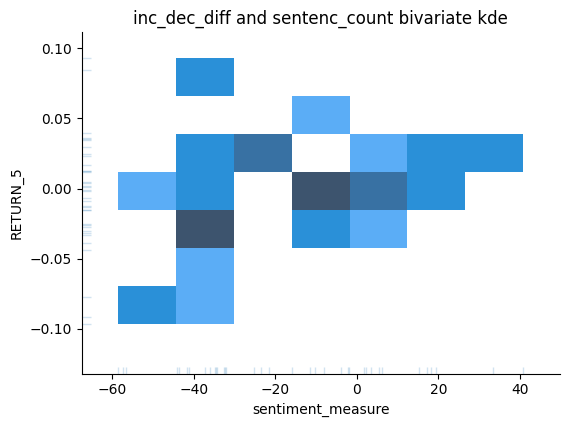

In [22]:
g = sns.displot(data=data_df, x="sentiment_measure", y="RETURN_5", 
            rug=True, rug_kws={"alpha": 0.2, "height": 0.02})

g.fig.set_size_inches(6,4)
plt.title('inc_dec_diff and sentenc_count bivariate kde')

Text(0.5, 1.0, 'inc_dec_diff and sentenc_count bivariate kde')

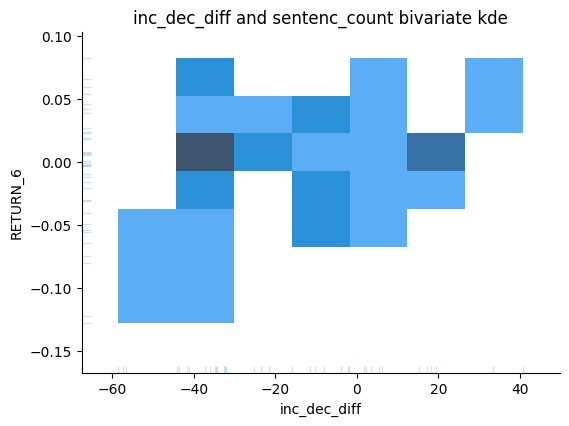

In [161]:
g = sns.displot(data=data_df, x="inc_dec_diff", y="RETURN_6", 
            rug=True, rug_kws={"alpha": 0.2, "height": 0.02})

g.fig.set_size_inches(6,4)
plt.title('inc_dec_diff and sentenc_count bivariate kde')

Text(0.5, 1.0, 'inc_dec_diff and sentenc_count bivariate kde')

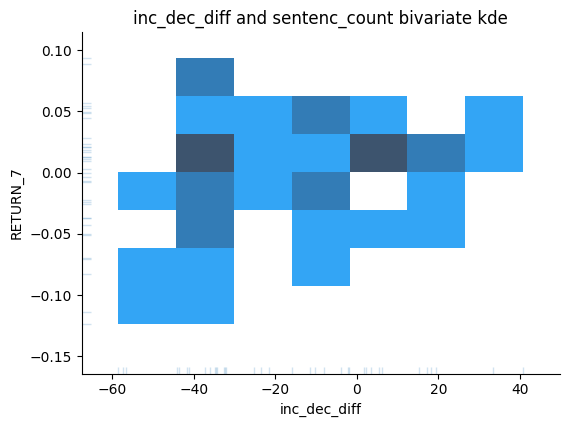

In [162]:
g = sns.displot(data=data_df, x="inc_dec_diff", y="RETURN_7", 
            rug=True, rug_kws={"alpha": 0.2, "height": 0.02})

g.fig.set_size_inches(6,4)
plt.title('inc_dec_diff and sentenc_count bivariate kde')

Text(0.5, 1.0, 'inc_dec_diff and sentenc_count bivariate kde')

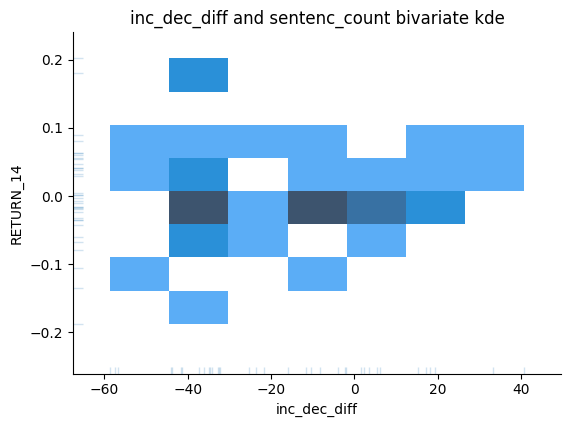

In [163]:
g = sns.displot(data=data_df, x="inc_dec_diff", y="RETURN_14", 
            rug=True, rug_kws={"alpha": 0.2, "height": 0.02})

g.fig.set_size_inches(6,4)
plt.title('inc_dec_diff and sentenc_count bivariate kde')

Text(0.5, 1.0, 'inc_dec_diff and sentenc_count bivariate kde')

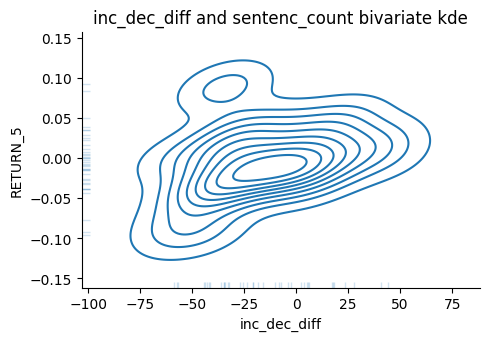

In [ ]:
g = sns.displot(data=data_df, x="inc_dec_diff", y="RETURN_5", 
            rug=True, kind='kde', rug_kws={"alpha": 0.2, "height": 0.02})

g.fig.set_size_inches(5,3)
plt.title('inc_dec_diff and sentenc_count bivariate kde')

Text(0.5, 1.0, 'inc_dec_diff and sentenc_count bivariate kde')

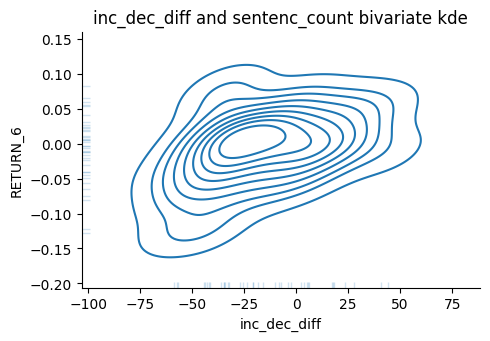

In [ ]:
g = sns.displot(data=data_df, x="inc_dec_diff", y="RETURN_6", 
            rug=True, kind='kde', rug_kws={"alpha": 0.2, "height": 0.02})

g.fig.set_size_inches(5,3)
plt.title('inc_dec_diff and sentenc_count bivariate kde')

Text(0.5, 1.0, 'inc_dec_diff and sentenc_count bivariate kde')

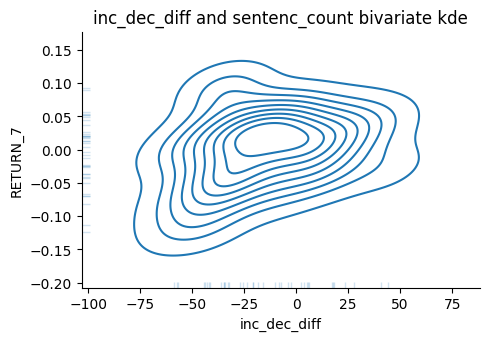

In [ ]:
g = sns.displot(data=data_df, x="inc_dec_diff", y="RETURN_7", 
            rug=True, kind='kde', rug_kws={"alpha": 0.2, "height": 0.02})

g.fig.set_size_inches(5,3)
plt.title('inc_dec_diff and sentenc_count bivariate kde')

Text(0.5, 1.0, 'inc_dec_diff and sentenc_count bivariate kde')

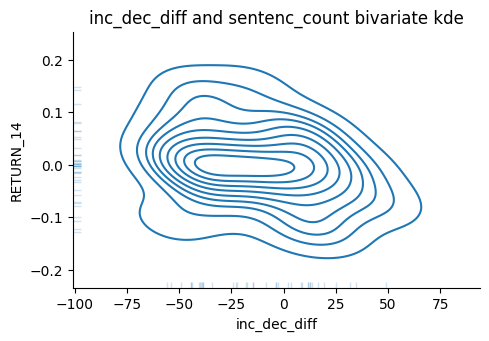

In [ ]:
g = sns.displot(data=data_df, x="inc_dec_diff", y="RETURN_14", 
            rug=True, kind='kde', rug_kws={"alpha": 0.2, "height": 0.02})

g.fig.set_size_inches(5,3)
plt.title('inc_dec_diff and sentenc_count bivariate kde')

<Axes: xlabel='sentiment_measure', ylabel='RETURN_14'>

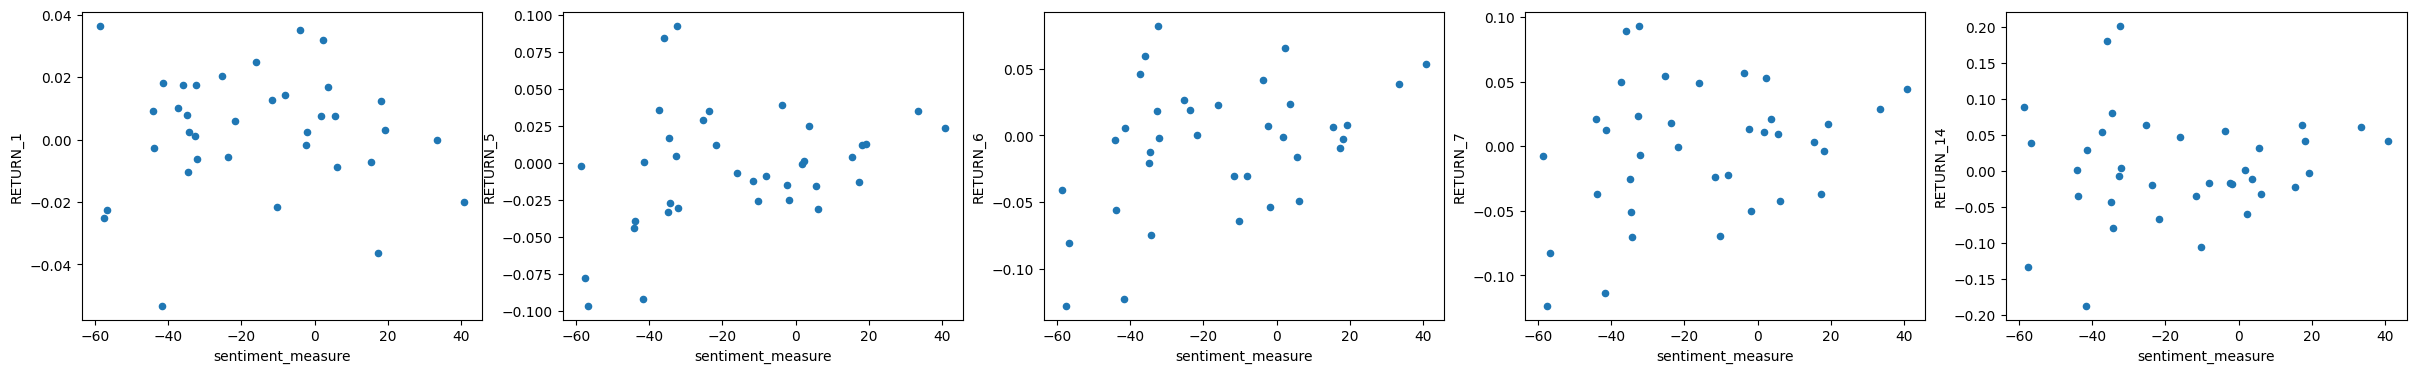

In [23]:
# threshold: vol - 0.12, rsi - 30/70
fig, axes = plt.subplots(nrows=1, ncols=5,figsize=(30,4))

data_df.plot(x='sentiment_measure',y='RETURN_1',kind='scatter',ax=axes[0])
data_df.plot(x='sentiment_measure',y='RETURN_5',kind='scatter',ax=axes[1])
data_df.plot(x='sentiment_measure',y='RETURN_6',kind='scatter',ax=axes[2])
data_df.plot(x='sentiment_measure',y='RETURN_7',kind='scatter',ax=axes[3])
data_df.plot(x='sentiment_measure',y='RETURN_14',kind='scatter',ax=axes[4])
# data_df.plot(x='inc_dec_diff',y='RETURN_28',kind='scatter',ax=axes[5])

<Axes: xlabel='inclination_measure', ylabel='RETURN_6'>

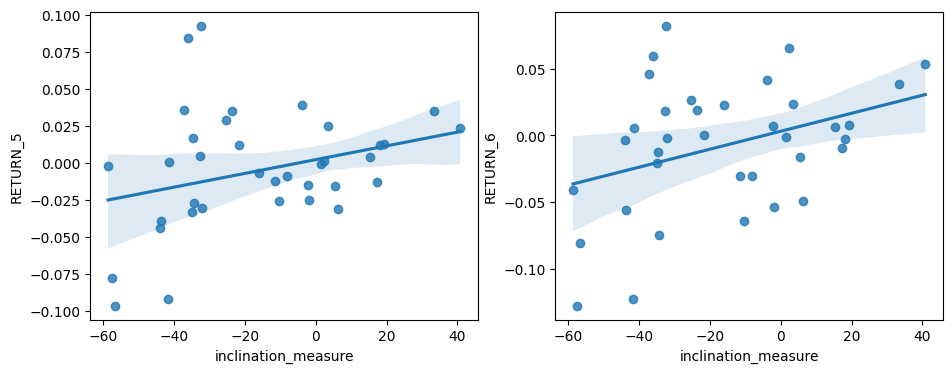

In [40]:
# threshold: vol - 0.12, rsi - 30/70
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(11,4))

# sns.regplot(x='sentiment_measure', y='RETURN_1', data=data_df, robust=True, ax=axes[0])
sns.regplot(x='inclination_measure', y='RETURN_5', data=data_df, robust=True, ax=axes[0])
sns.regplot(x='inclination_measure', y='RETURN_6', data=data_df, robust=True, ax=axes[1])
# sns.regplot(x='inclination_measure', y='RETURN_7', data=data_df, robust=True, ax=axes[2])
# sns.regplot(x='sentiment_measure', y='RETURN_14', data=data_df, robust=True, ax=axes[4])

<Axes: xlabel='sentiment_measure', ylabel='RETURN_14'>

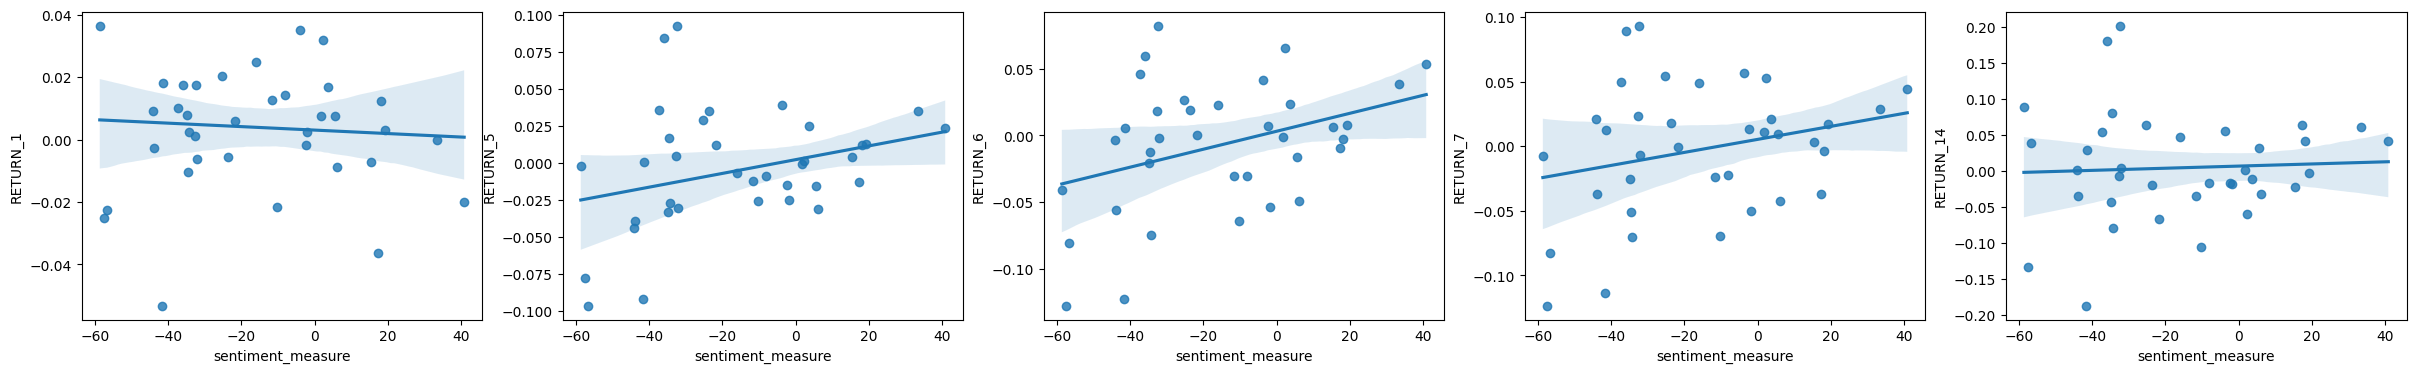

In [60]:
# threshold: vol - 0.12, rsi - 30/70
fig, axes = plt.subplots(nrows=1, ncols=5,figsize=(30,4))

sns.regplot(x='sentiment_measure', y='RETURN_1', data=data_df, robust=True, ax=axes[0])
sns.regplot(x='sentiment_measure', y='RETURN_5', data=data_df, robust=True, ax=axes[1])
sns.regplot(x='sentiment_measure', y='RETURN_6', data=data_df, robust=True, ax=axes[2])
sns.regplot(x='sentiment_measure', y='RETURN_7', data=data_df, robust=True, ax=axes[3])
sns.regplot(x='sentiment_measure', y='RETURN_14', data=data_df, robust=True, ax=axes[4])

<Axes: xlabel='inclination_measure', ylabel='RETURN_21'>

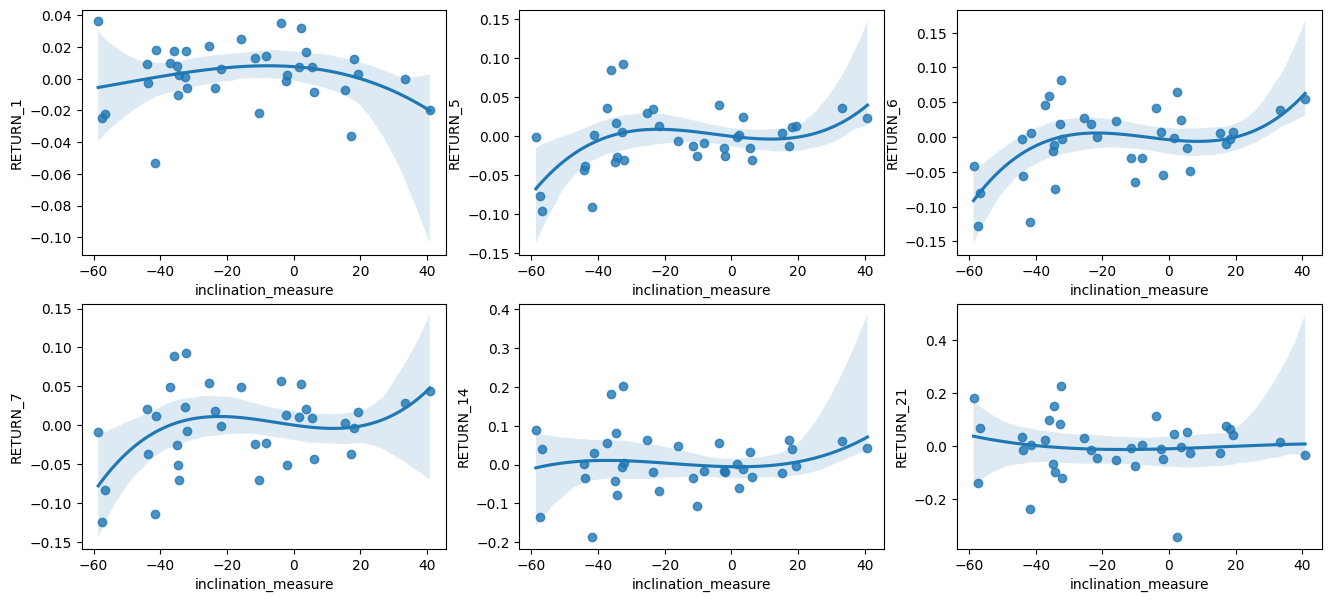

In [37]:
# threshold: vol - 0.12, rsi - 30/70
%matplotlib inline
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(16,7))

sns.regplot(x='inclination_measure', y='RETURN_1', data=data_df, order=3, ax=axes[0][0])
sns.regplot(x='inclination_measure', y='RETURN_5', data=data_df, order=3, ax=axes[0][1])
sns.regplot(x='inclination_measure', y='RETURN_6', data=data_df, order=3, ax=axes[0][2])
sns.regplot(x='inclination_measure', y='RETURN_7', data=data_df, order=3, ax=axes[1][0])
sns.regplot(x='inclination_measure', y='RETURN_14', data=data_df, order=3, ax=axes[1][1])
sns.regplot(x='inclination_measure', y='RETURN_21', data=data_df, order=3, ax=axes[1][2])

<Axes: xlabel='sentiment_measure', ylabel='VOLATILITY_28'>

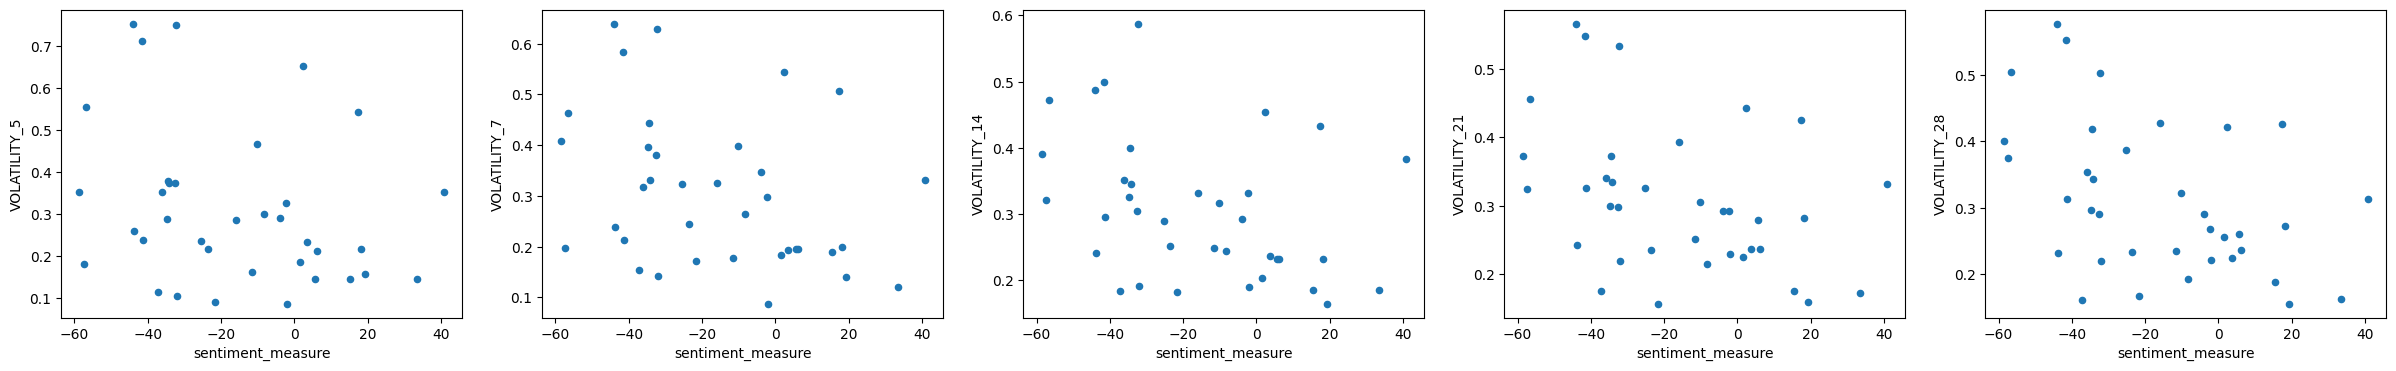

In [65]:
# threshold: vol - 0.12, rsi - 30/70
fig, axes = plt.subplots(nrows=1, ncols=5,figsize=(16,7))

data_df.plot(x='sentiment_measure',y='VOLATILITY_5',kind='scatter',ax=axes[0])
data_df.plot(x='sentiment_measure',y='VOLATILITY_7',kind='scatter',ax=axes[1])
data_df.plot(x='sentiment_measure',y='VOLATILITY_14',kind='scatter',ax=axes[2])
data_df.plot(x='sentiment_measure',y='VOLATILITY_21',kind='scatter',ax=axes[3])
data_df.plot(x='sentiment_measure',y='VOLATILITY_28',kind='scatter',ax=axes[4])
# data_df.plot(x='inc_dec_diff',y='RETURN_28',kind='scatter',ax=axes[5])

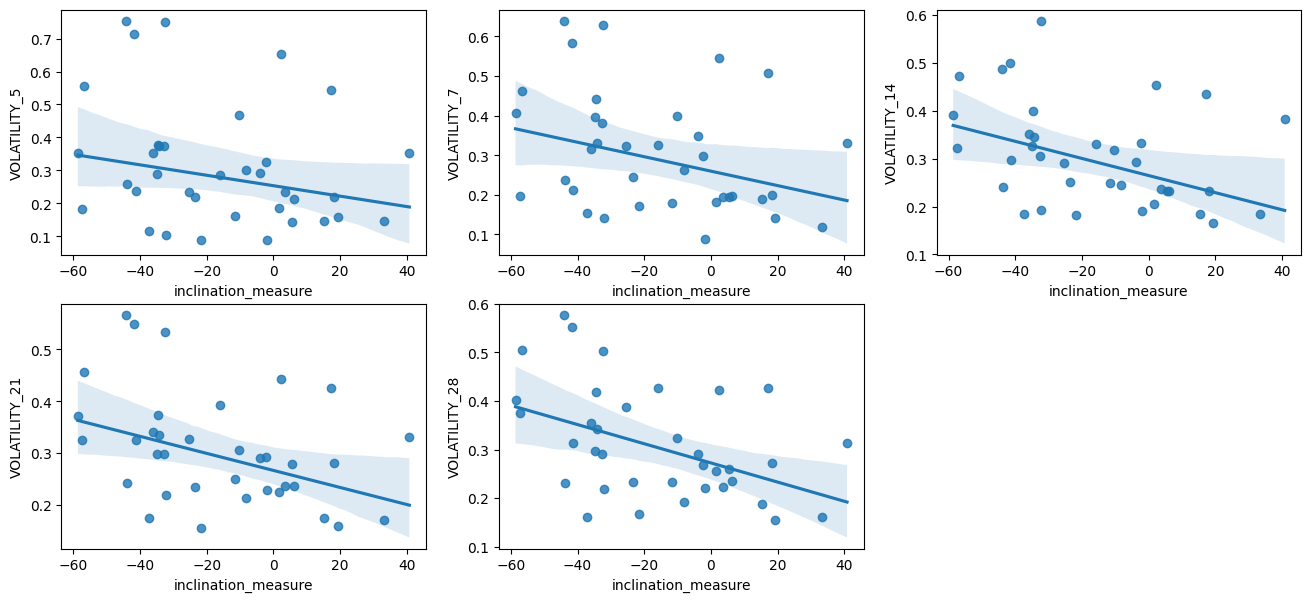

In [44]:
# threshold: vol - 0.12, rsi - 30/70
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(16,7))

sns.regplot(x='inclination_measure', y='VOLATILITY_5', data=data_df, robust=True, ax=axes[0][0])
sns.regplot(x='inclination_measure', y='VOLATILITY_7', data=data_df, robust=True, ax=axes[0][1])
sns.regplot(x='inclination_measure', y='VOLATILITY_14', data=data_df, robust=True, ax=axes[0][2])
sns.regplot(x='inclination_measure', y='VOLATILITY_21', data=data_df, robust=True, ax=axes[1][0])
sns.regplot(x='inclination_measure', y='VOLATILITY_28', data=data_df, robust=True, ax=axes[1][1])
axes[1,2].set_visible(False)

Text(0.5, 1.0, 'inc_dec_diff and sentenc_count bivariate kde')

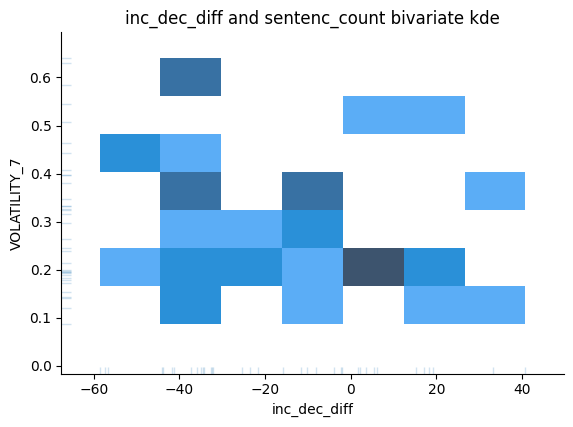

In [164]:
g = sns.displot(data=data_df, x="inc_dec_diff", y="VOLATILITY_7", 
            rug=True, rug_kws={"alpha": 0.2, "height": 0.02})

g.fig.set_size_inches(6,4)
plt.title('inc_dec_diff and sentenc_count bivariate kde')

Text(0.5, 1.0, 'inc_dec_diff and sentenc_count bivariate kde')

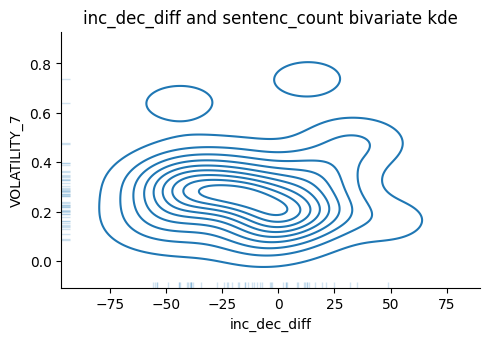

In [ ]:
g = sns.displot(data=data_df, x="inc_dec_diff", y="VOLATILITY_7", kind='kde',
            rug=True, rug_kws={"alpha": 0.2, "height": 0.02})

g.fig.set_size_inches(5,3)
plt.title('inc_dec_diff and sentenc_count bivariate kde')

In [34]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

smf.ols(formula='RETURN_5 ~ inclination_measure', data=data_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               RETURN_5   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     3.533
Date:                Sun, 02 Jun 2024   Prob (F-statistic):             0.0688
Time:                        19:53:02   Log-Likelihood:                 67.000
No. Observations:                  36   AIC:                            -130.0
Df Residuals:                      34   BIC:                            -126.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.0040      0.008      0.522      0.605      -0.012       0.019
inclination_measure     0.0005      0.000      1.880      0.069   -3.84e-05       0.001
==============================================================================
Omnibus:                        5.708   Durbin-Watson:                   1.627
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                4.302
Skew:                           0.643   Prob(JB):                        0.116
Kurtosis:                       4.102   Cond. No.                         35.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

smf.ols(formula='RETURN_6 ~ inclination_measure', data=data_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               RETURN_6   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     5.845
Date:                Sun, 02 Jun 2024   Prob (F-statistic):             0.0211
Time:                        19:53:04   Log-Likelihood:                 60.871
No. Observations:                  36   AIC:                            -117.7
Df Residuals:                      34   BIC:                            -114.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.0039      0.009      0.435      0.666      -0.014       0.022
inclination_measure     0.0007      0.000      2.418      0.021       0.000       0.001
==============================================================================
Omnibus:                        0.045   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.978   Jarque-Bera (JB):                0.064
Skew:                          -0.040   Prob(JB):                        0.968
Kurtosis:                       2.809   Cond. No.                         35.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

smf.ols(formula='RETURN_7 ~ inclination_measure', data=data_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               RETURN_7   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     2.804
Date:                Sun, 02 Jun 2024   Prob (F-statistic):              0.103
Time:                        19:53:06   Log-Likelihood:                 57.858
No. Observations:                  36   AIC:                            -111.7
Df Residuals:                      34   BIC:                            -108.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.0059      0.010      0.603      0.550      -0.014       0.026
inclination_measure     0.0005      0.000      1.674      0.103      -0.000       0.001
==============================================================================
Omnibus:                        0.009   Durbin-Watson:                   1.742
Prob(Omnibus):                  0.995   Jarque-Bera (JB):                0.126
Skew:                           0.033   Prob(JB):                        0.939
Kurtosis:                       2.718   Cond. No.                         35.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# smf.ols(formula='RETURN_5 ~ inc_dec_diff', data=data_df).fit().summary()

smf.ols(formula = 'RETURN_5 ~ sentiment_measure + I(sentiment_measure**2) + I(sentiment_measure**3)', data = data_df).fit().summary()

In [52]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# smf.ols(formula='RETURN_5 ~ inc_dec_diff', data=data_df).fit().summary()

smf.ols(formula = 'RETURN_6 ~ sentiment_measure + I(sentiment_measure**2) + I(sentiment_measure**3)', data = data_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               RETURN_6   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     4.891
Date:                Wed, 03 Apr 2024   Prob (F-statistic):            0.00655
Time:                        17:28:36   Log-Likelihood:                 64.809
No. Observations:                  36   AIC:                            -121.6
Df Residuals:                      32   BIC:                            -115.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.0038      0.011     -0.345      0.733      -0.026       0.019
sentiment_measure            -0.0005      0.001     -0.933      0.358      -0.002       0.001
I(sentiment_measure ** 2)  1.669e-05   1.45e-05      1.147      0.260   -1.29e-05    4.63e-05
I(sentiment_measure ** 3)  8.608e-07   3.31e-07      2.597      0.014    1.86e-07    1.54e-06
==============================================================================
Omnibus:                        1.278   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.600
Skew:                          -0.297   Prob(JB):                        0.741
Kurtosis:                       3.216   Cond. No.                     1.02e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# smf.ols(formula='RETURN_5 ~ inc_dec_diff', data=data_df).fit().summary()

smf.ols(formula = 'RETURN_5 ~ I(sentiment_measure**3)', data = data_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               RETURN_5   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     9.211
Date:                Wed, 03 Apr 2024   Prob (F-statistic):            0.00459
Time:                        18:10:40   Log-Likelihood:                 69.535
No. Observations:                  36   AIC:                            -135.1
Df Residuals:                      34   BIC:                            -131.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.0063      0.007      0.924      0.362      -0.008       0.020
I(sentiment_measure ** 3)  3.177e-07   1.05e-07      3.035      0.005    1.05e-07     5.3e-07
==============================================================================
Omnibus:                        7.778   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                6.366
Skew:                           0.877   Prob(JB):                       0.0415
Kurtosis:                       4.080   Cond. No.                     7.46e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# smf.ols(formula='RETURN_5 ~ inc_dec_diff', data=data_df).fit().summary()

smf.ols(formula = 'RETURN_6 ~ I(sentiment_measure**3)', data = data_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               RETURN_6   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     12.83
Date:                Wed, 03 Apr 2024   Prob (F-statistic):            0.00106
Time:                        18:10:28   Log-Likelihood:                 63.777
No. Observations:                  36   AIC:                            -123.6
Df Residuals:                      34   BIC:                            -120.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.0061      0.008      0.763      0.451      -0.010       0.022
I(sentiment_measure ** 3)  4.399e-07   1.23e-07      3.581      0.001     1.9e-07     6.9e-07
==============================================================================
Omnibus:                        0.192   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.908   Jarque-Bera (JB):                0.120
Skew:                          -0.124   Prob(JB):                        0.942
Kurtosis:                       2.862   Cond. No.                     7.46e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# smf.ols(formula='RETURN_5 ~ inc_dec_diff', data=data_df).fit().summary()

smf.ols(formula = 'RETURN_7 ~ I(sentiment_measure**3)', data = data_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               RETURN_7   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     7.256
Date:                Wed, 03 Apr 2024   Prob (F-statistic):             0.0109
Time:                        18:10:10   Log-Likelihood:                 59.913
No. Observations:                  36   AIC:                            -115.8
Df Residuals:                      34   BIC:                            -112.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.0087      0.009      0.977      0.336      -0.009       0.027
I(sentiment_measure ** 3)  3.684e-07   1.37e-07      2.694      0.011    9.05e-08    6.46e-07
==============================================================================
Omnibus:                        0.104   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.949   Jarque-Bera (JB):                0.296
Skew:                           0.084   Prob(JB):                        0.862
Kurtosis:                       2.589   Cond. No.                     7.46e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

smf.ols(formula='VOLATILITY_28 ~ sentiment_measure', data=data_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          VOLATILITY_28   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     8.990
Date:                Wed, 03 Apr 2024   Prob (F-statistic):            0.00505
Time:                        18:15:15   Log-Likelihood:                 31.935
No. Observations:                  36   AIC:                            -59.87
Df Residuals:                      34   BIC:                            -56.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.2791      0.020     13.837      0.000       0.238       0.320
sentiment_measure    -0.0020      0.001     -2.998      0.005      -0.003      -0.001
==============================================================================
Omnibus:                        1.568   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.457   Jarque-Bera (JB):                1.497
Skew:                           0.433   Prob(JB):                        0.473
Kurtosis:                       2.503   Cond. No.                         35.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

smf.ols(formula='VOLATILITY_21 ~ sentiment_measure', data=data_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          VOLATILITY_21   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     6.333
Date:                Wed, 03 Apr 2024   Prob (F-statistic):             0.0167
Time:                        18:15:47   Log-Likelihood:                 32.893
No. Observations:                  36   AIC:                            -61.79
Df Residuals:                      34   BIC:                            -58.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.2812      0.020     14.320      0.000       0.241       0.321
sentiment_measure    -0.0016      0.001     -2.517      0.017      -0.003      -0.000
==============================================================================
Omnibus:                        3.525   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.172   Jarque-Bera (JB):                2.997
Skew:                           0.703   Prob(JB):                        0.223
Kurtosis:                       2.861   Cond. No.                         35.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

smf.ols(formula='VOLATILITY_14 ~ sentiment_measure', data=data_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          VOLATILITY_14   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     5.481
Date:                Wed, 03 Apr 2024   Prob (F-statistic):             0.0252
Time:                        18:15:20   Log-Likelihood:                 32.852
No. Observations:                  36   AIC:                            -61.70
Df Residuals:                      34   BIC:                            -58.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.2818      0.020     14.335      0.000       0.242       0.322
sentiment_measure    -0.0015      0.001     -2.341      0.025      -0.003      -0.000
==============================================================================
Omnibus:                        4.697   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.096   Jarque-Bera (JB):                3.948
Skew:                           0.811   Prob(JB):                        0.139
Kurtosis:                       3.024   Cond. No.                         35.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

smf.ols(formula='VOLATILITY_7 ~ sentiment_measure', data=data_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           VOLATILITY_7   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     4.249
Date:                Wed, 03 Apr 2024   Prob (F-statistic):             0.0470
Time:                        18:15:29   Log-Likelihood:                 20.202
No. Observations:                  36   AIC:                            -36.40
Df Residuals:                      34   BIC:                            -33.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.2744      0.028      9.819      0.000       0.218       0.331
sentiment_measure    -0.0019      0.001     -2.061      0.047      -0.004   -2.68e-05
==============================================================================
Omnibus:                        3.258   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.196   Jarque-Bera (JB):                2.958
Skew:                           0.679   Prob(JB):                        0.228
Kurtosis:                       2.645   Cond. No.                         35.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### icln

In [88]:
icln_benchmark = pd.read_csv('/home/congress-user/data_collection/energy_data/icln.csv')
icln_benchmark = icln_benchmark.drop(columns=['Unnamed: 0'])
icln_benchmark['DATE'] = pd.to_datetime(vde_benchmark['DATE'])
icln_benchmark['year'] = icln_benchmark['DATE'].dt.year
icln_benchmark['RETURN_2'] = icln_benchmark['PRICE'].pct_change(2).shift(-2)
icln_benchmark['RETURN_3'] = icln_benchmark['PRICE'].pct_change(3).shift(-3)
icln_benchmark['RETURN_4'] = icln_benchmark['PRICE'].pct_change(4).shift(-4)
icln_benchmark['RETURN_6'] = icln_benchmark['PRICE'].pct_change(6).shift(-6)
icln_benchmark

DATE      PRICE   Volume  RETURN_1  RETURN_5  RETURN_7  RETURN_14  \
0    2004-09-29  52.770000     2000 -0.032405 -0.099678 -0.091908  -0.061967   
1    2004-09-30  51.060001     9800 -0.017626 -0.069526 -0.060909  -0.028594   
2    2004-10-01  50.160000     7700  0.001794 -0.044657 -0.051037  -0.019537   
3    2004-10-04  50.250000    17100 -0.028856 -0.045771 -0.044378  -0.002388   
4    2004-10-05  48.799999    14900 -0.026434 -0.024590 -0.011066   0.008197   
...         ...        ...      ...       ...       ...       ...        ...   
3917 2020-04-22  13.770000  3770200 -0.000726       NaN       NaN        NaN   
3918 2020-04-23  13.760000  4393400  0.010174       NaN       NaN        NaN   
3919 2020-04-24  13.900000  3623300  0.012230       NaN       NaN        NaN   
3920 2020-04-27  14.070000  3054100 -0.009240       NaN       NaN        NaN   
3921 2020-04-28  13.940000  2201300       NaN       NaN       NaN        NaN   

      RETURN_21  RETURN_28  VOLUME_1  ...  VOLATILITY_5  VOLATILITY_7  \
0     -0.099678  -0.111806  3.900000  ...           NaN           NaN   
1     -0.075402  -0.072072 -0.214286  ...           NaN           NaN   
2     -0.036683  -0.055821  1.220779  ...           NaN           NaN   
3     -0.016119  -0.073831 -0.128655  ...           NaN           NaN   
4      0.002869  -0.060656 -0.550336  ...           NaN           NaN   
...         ...        ...       ...  ...           ...           ...   
3917        NaN        NaN  0.165296  ...      0.241621      0.223528   
3918        NaN        NaN -0.175286  ...      0.263010      0.227958   
3919        NaN        NaN -0.157094  ...      0.309861      0.254783   
3920        NaN        NaN -0.279231  ...      0.224577      0.282545   
3921        NaN        NaN       NaN  ...      0.137626      0.283197   

      VOLATILITY_14  VOLATILITY_21  VOLATILITY_28  year  RETURN_2  RETURN_3  \
0               NaN            NaN            NaN  2004 -0.049460 -0.047754   
1               NaN            NaN            NaN  2004 -0.015864 -0.044262   
2               NaN            NaN            NaN  2004 -0.027113 -0.052831   
3               NaN            NaN            NaN  2004 -0.054527 -0.054527   
4               NaN            NaN            NaN  2004 -0.026434 -0.018033   
...             ...            ...            ...   ...       ...       ...   
3917       0.193935       0.281524       0.324564  2020  0.009441  0.021786   
3918       0.186133       0.280015       0.324337  2020  0.022529  0.013081   
3919       0.203891       0.261974       0.324512  2020  0.002878       NaN   
3920       0.220238       0.235324       0.326600  2020       NaN       NaN   
3921       0.207516       0.199957       0.323627  2020       NaN       NaN   

      RETURN_4  RETURN_6  
0    -0.075232 -0.099678  
1    -0.069526 -0.061496  
2    -0.052831 -0.044059  
3    -0.046368 -0.052736  
4    -0.017418 -0.015984  
...        ...       ...  
3917  0.012346       NaN  
3918       NaN       NaN  
3919       NaN       NaN  
3920       NaN       NaN  
3921       NaN       NaN  

[3922 rows x 26 columns]

In [89]:
data_df = filtered4[['date','inc_dec_diff']].merge(icln_benchmark, left_on='date',right_on='DATE')
data_df.head(5)

date  inc_dec_diff       DATE  PRICE  Volume  RETURN_1  RETURN_5  \
0 2005-03-02     -8.203125 2005-03-02  16.83   19600  0.057041  0.122400   
1 2008-05-20      6.194690 2008-05-20  10.04   12700 -0.018924  0.013944   
2 2008-07-15    -10.276680 2008-07-15   8.80   20500 -0.011364 -0.006818   
3 2008-07-17    -34.853420 2008-07-17   8.87   28500 -0.002255 -0.009019   
4 2008-09-11      2.272727 2008-09-11   7.06   12400  0.001416  0.002833   

   RETURN_7  RETURN_14  RETURN_21  ...  VOLATILITY_5  VOLATILITY_7  \
0  0.053476   0.075460   0.162210  ...      2.047748      1.679212   
1 -0.018924  -0.055777  -0.066733  ...      0.356448      0.308869   
2 -0.001136  -0.025000  -0.075000  ...      0.191221      0.157470   
3 -0.015784  -0.025930  -0.087937  ...      0.267108      0.226051   
4  0.026912  -0.016997   0.007082  ...      0.294278      0.272772   

   VOLATILITY_14  VOLATILITY_21  VOLATILITY_28  year  RETURN_2  RETURN_3  \
0       1.629376       1.605022       1.481453  2005  0.116459  0.139037   
1       0.288934       0.286120       0.284939  2008 -0.017928 -0.007968   
2       0.156720       0.177731       0.190963  2008  0.007955  0.005682   
3       0.187124       0.183517       0.196751  2008 -0.018038 -0.014656   
4       0.230793       0.226800       0.220406  2008  0.002833 -0.018414   

   RETURN_4  RETURN_6  
0 -0.007724  0.080214  
1  0.003984  0.002988  
2 -0.010227  0.007955  
3  0.000000 -0.019166  
4  0.007082  0.002833  

[5 rows x 28 columns]

In [90]:
data_df = data_df.rename(columns={'inc_dec_diff':'sentiment_measure'})

<Axes: xlabel='sentiment_measure', ylabel='RETURN_14'>

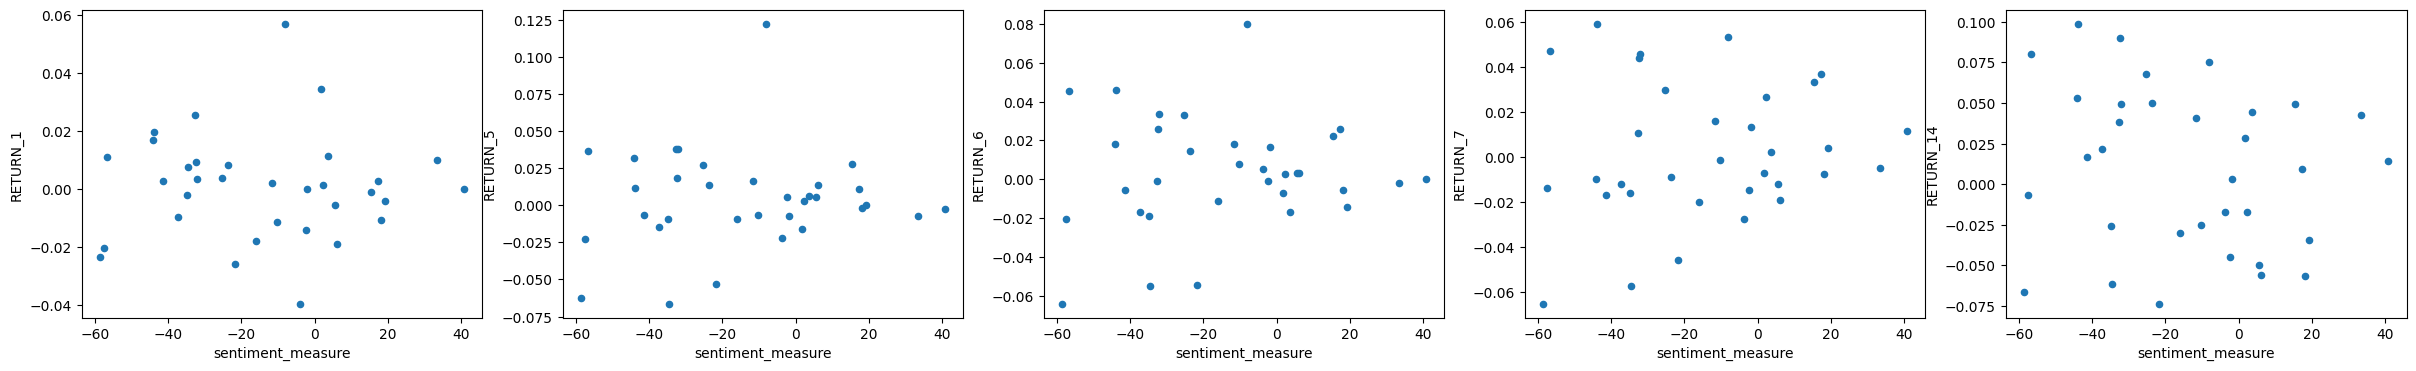

In [92]:
# threshold: vol - 0.12, rsi - 30/70
fig, axes = plt.subplots(nrows=1, ncols=5,figsize=(30,4))

data_df.plot(x='sentiment_measure',y='RETURN_1',kind='scatter',ax=axes[0])
data_df.plot(x='sentiment_measure',y='RETURN_5',kind='scatter',ax=axes[1])
data_df.plot(x='sentiment_measure',y='RETURN_6',kind='scatter',ax=axes[2])
data_df.plot(x='sentiment_measure',y='RETURN_7',kind='scatter',ax=axes[3])
data_df.plot(x='sentiment_measure',y='RETURN_14',kind='scatter',ax=axes[4])
# data_df.plot(x='inc_dec_diff',y='RETURN_28',kind='scatter',ax=axes[5])

<Axes: xlabel='sentiment_measure', ylabel='RETURN_21'>

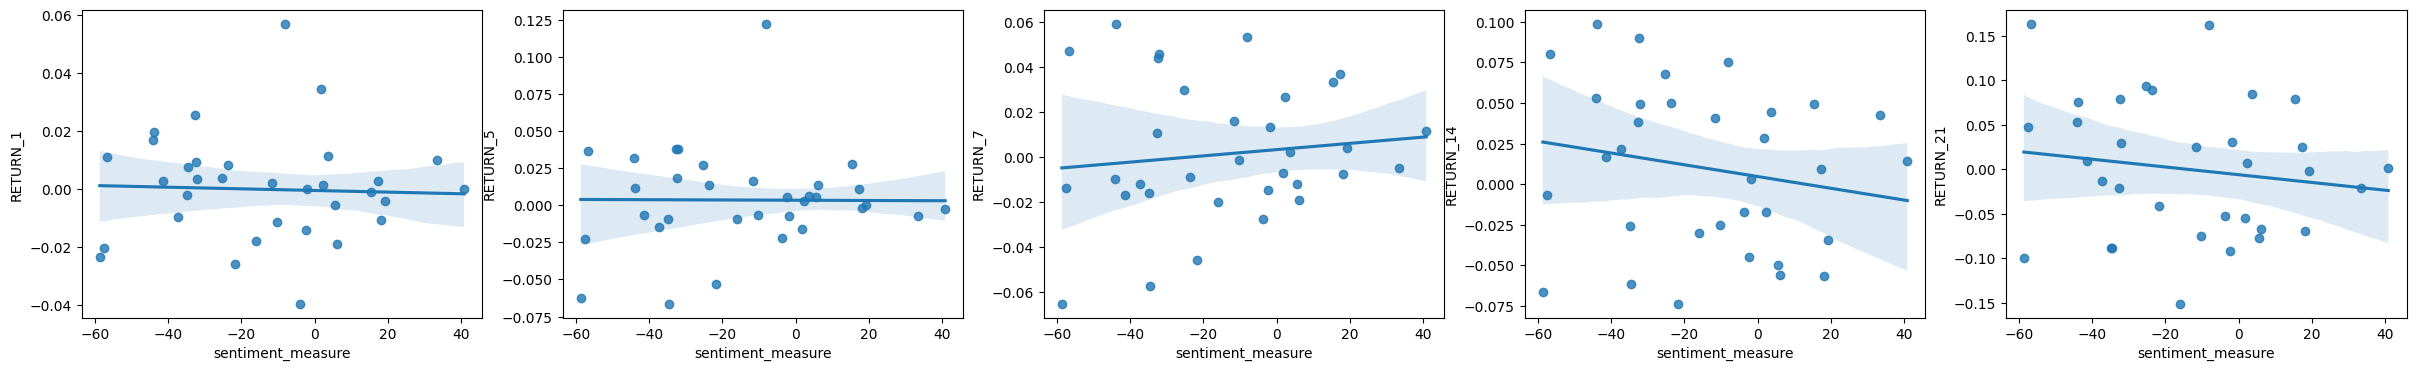

In [94]:
# threshold: vol - 0.12, rsi - 30/70
fig, axes = plt.subplots(nrows=1, ncols=5,figsize=(30,4))

sns.regplot(x='sentiment_measure', y='RETURN_1', data=data_df, robust=True, ax=axes[0])
sns.regplot(x='sentiment_measure', y='RETURN_5', data=data_df, robust=True, ax=axes[1])
sns.regplot(x='sentiment_measure', y='RETURN_7', data=data_df, robust=True, ax=axes[2])
sns.regplot(x='sentiment_measure', y='RETURN_14', data=data_df, robust=True, ax=axes[3])
sns.regplot(x='sentiment_measure', y='RETURN_21', data=data_df, robust=True, ax=axes[4])

<Axes: xlabel='sentiment_measure', ylabel='RETURN_14'>

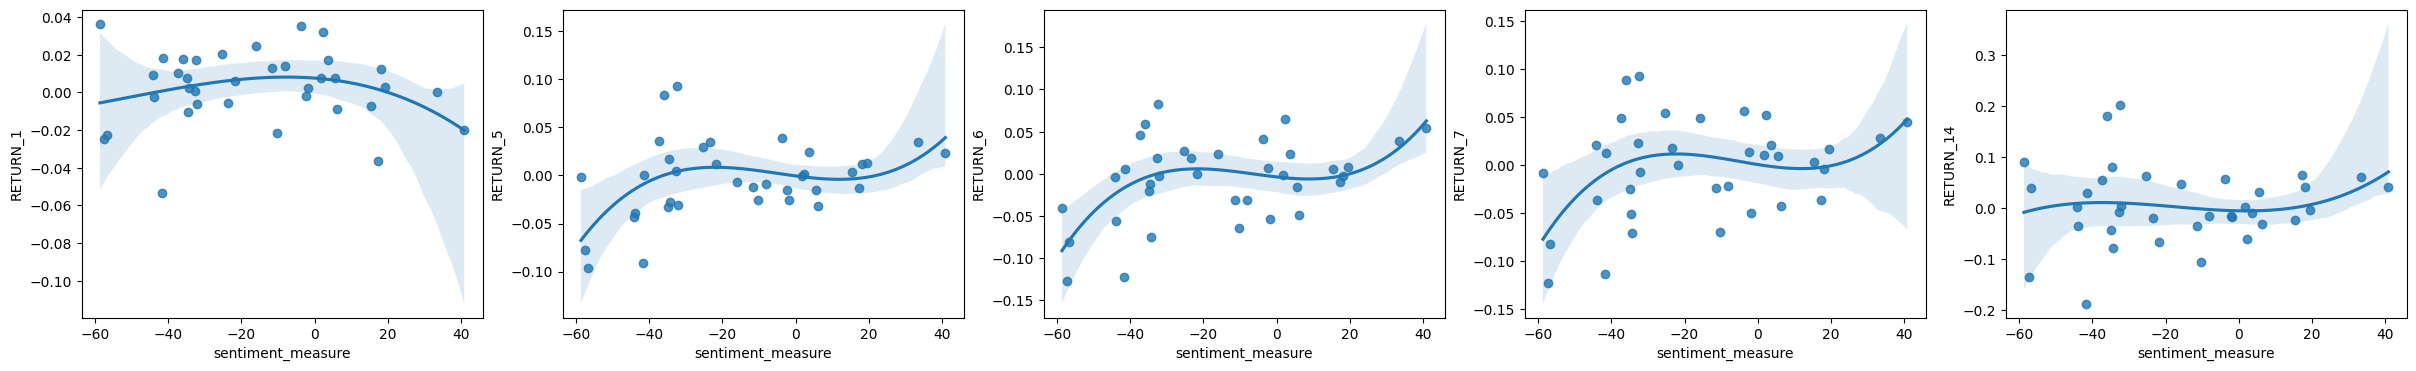

In [ ]:
# threshold: vol - 0.12, rsi - 30/70
%matplotlib inline
fig, axes = plt.subplots(nrows=1, ncols=5,figsize=(30,4))

sns.regplot(x='sentiment_measure', y='RETURN_1', data=data_df, order=3, ax=axes[0])
sns.regplot(x='sentiment_measure', y='RETURN_5', data=data_df, order=3, ax=axes[1])
sns.regplot(x='sentiment_measure', y='RETURN_6', data=data_df, order=3, ax=axes[2])
sns.regplot(x='sentiment_measure', y='RETURN_7', data=data_df, order=3, ax=axes[3])
sns.regplot(x='sentiment_measure', y='RETURN_14', data=data_df, order=3, ax=axes[4])

In [95]:
data_df.columns

Index(['date', 'sentiment_measure', 'DATE', 'PRICE', 'Volume', 'RETURN_1',
       'RETURN_5', 'RETURN_7', 'RETURN_14', 'RETURN_21', 'RETURN_28',
       'VOLUME_1', 'VOLUME_5', 'VOLUME_7', 'VOLUME_14', 'VOLUME_21',
       'VOLUME_28', 'Log_Ret', 'VOLATILITY_5', 'VOLATILITY_7', 'VOLATILITY_14',
       'VOLATILITY_21', 'VOLATILITY_28', 'year', 'RETURN_2', 'RETURN_3',
       'RETURN_4', 'RETURN_6'],
      dtype='object')

<Axes: xlabel='sentiment_measure', ylabel='VOLATILITY_28'>

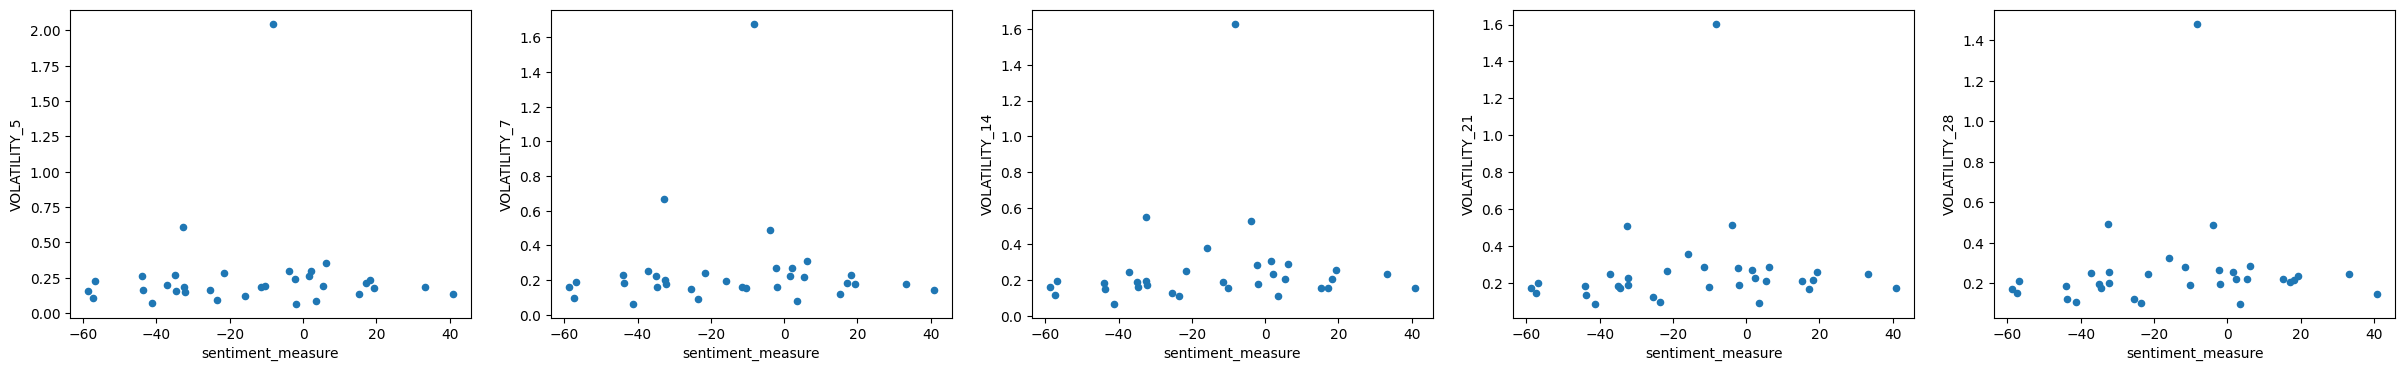

In [96]:
# threshold: vol - 0.12, rsi - 30/70
fig, axes = plt.subplots(nrows=1, ncols=5,figsize=(30,4))

data_df.plot(x='sentiment_measure',y='VOLATILITY_5',kind='scatter',ax=axes[0])
data_df.plot(x='sentiment_measure',y='VOLATILITY_7',kind='scatter',ax=axes[1])
data_df.plot(x='sentiment_measure',y='VOLATILITY_14',kind='scatter',ax=axes[2])
data_df.plot(x='sentiment_measure',y='VOLATILITY_21',kind='scatter',ax=axes[3])
data_df.plot(x='sentiment_measure',y='VOLATILITY_28',kind='scatter',ax=axes[4])
# data_df.plot(x='inc_dec_diff',y='RETURN_28',kind='scatter',ax=axes[5])

<Axes: xlabel='sentiment_measure', ylabel='VOLATILITY_28'>

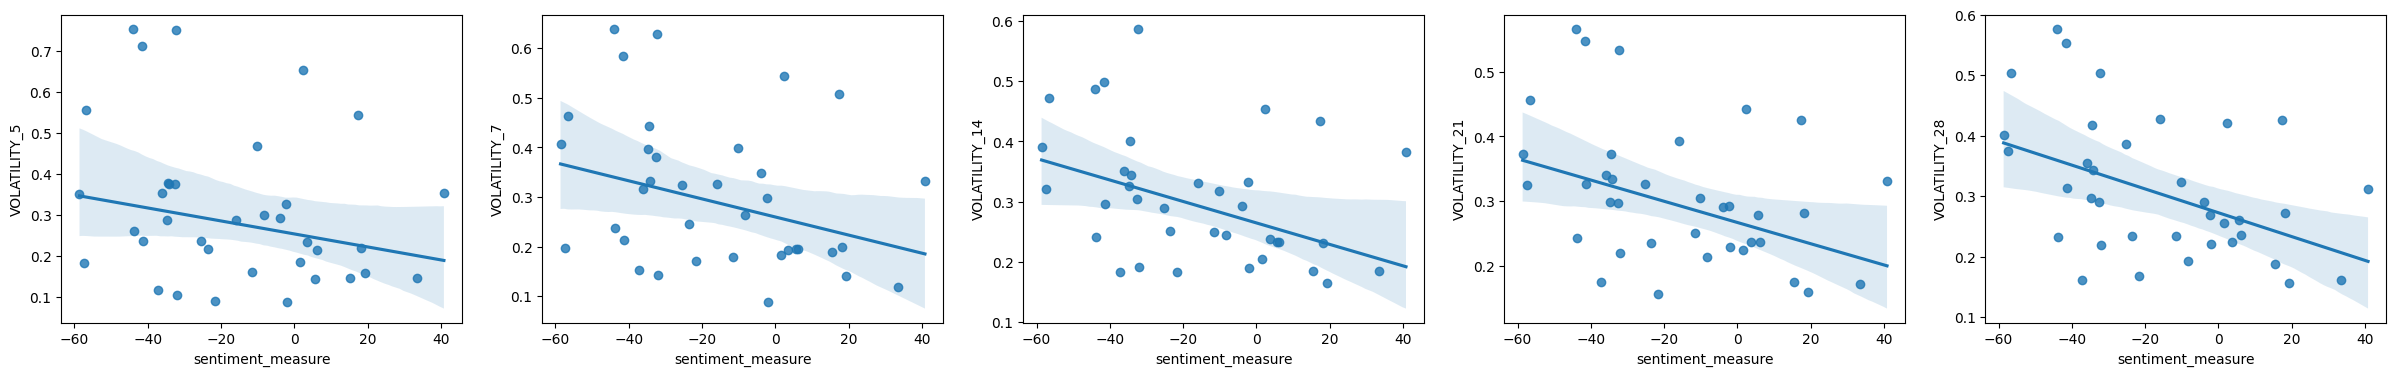

In [ ]:
# threshold: vol - 0.12, rsi - 30/70
fig, axes = plt.subplots(nrows=1, ncols=5,figsize=(30,4))

sns.regplot(x='sentiment_measure', y='VOLATILITY_5', data=data_df, robust=True, ax=axes[0])
sns.regplot(x='sentiment_measure', y='VOLATILITY_7', data=data_df, robust=True, ax=axes[1])
sns.regplot(x='sentiment_measure', y='VOLATILITY_14', data=data_df, robust=True, ax=axes[2])
sns.regplot(x='sentiment_measure', y='VOLATILITY_21', data=data_df, robust=True, ax=axes[3])
sns.regplot(x='sentiment_measure', y='VOLATILITY_28', data=data_df, robust=True, ax=axes[4])

Text(0.5, 1.0, 'inc_dec_diff and sentenc_count bivariate kde')

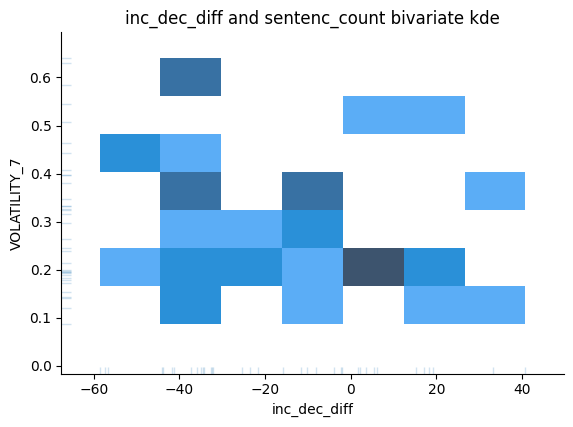

In [ ]:
g = sns.displot(data=data_df, x="inc_dec_diff", y="VOLATILITY_7", 
            rug=True, rug_kws={"alpha": 0.2, "height": 0.02})

g.fig.set_size_inches(6,4)
plt.title('inc_dec_diff and sentenc_count bivariate kde')

Text(0.5, 1.0, 'inc_dec_diff and sentenc_count bivariate kde')

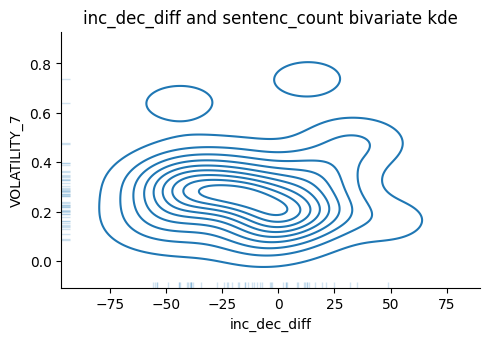

In [ ]:
g = sns.displot(data=data_df, x="inc_dec_diff", y="VOLATILITY_7", kind='kde',
            rug=True, rug_kws={"alpha": 0.2, "height": 0.02})

g.fig.set_size_inches(5,3)
plt.title('inc_dec_diff and sentenc_count bivariate kde')

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# smf.ols(formula='RETURN_5 ~ inc_dec_diff', data=data_df).fit().summary()

smf.ols(formula = 'RETURN_5 ~ sentiment_measure + I(sentiment_measure**2)', data = data_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               RETURN_5   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     2.456
Date:                Wed, 03 Apr 2024   Prob (F-statistic):              0.101
Time:                        17:26:54   Log-Likelihood:                 67.718
No. Observations:                  36   AIC:                            -129.4
Df Residuals:                      33   BIC:                            -124.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.0094      0.009      1.056      0.299      -0.009       0.028
sentiment_measure             0.0002      0.000      0.600      0.552      -0.000       0.001
I(sentiment_measure ** 2) -1.063e-05   9.17e-06     -1.159      0.255   -2.93e-05    8.03e-06
==============================================================================
Omnibus:                        5.785   Durbin-Watson:                   1.708
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                4.281
Skew:                           0.738   Prob(JB):                        0.118
Kurtosis:                       3.821   Cond. No.                     1.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

smf.ols(formula='RETURN_5 ~ inc_dec_diff', data=data_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               RETURN_5   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     3.533
Date:                Wed, 03 Apr 2024   Prob (F-statistic):             0.0688
Time:                        17:21:09   Log-Likelihood:                 67.000
No. Observations:                  36   AIC:                            -130.0
Df Residuals:                      34   BIC:                            -126.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0040      0.008      0.522      0.605      -0.012       0.019
inc_dec_diff     0.0005      0.000      1.880      0.069   -3.84e-05       0.001
==============================================================================
Omnibus:                        5.708   Durbin-Watson:                   1.627
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                4.302
Skew:                           0.643   Prob(JB):                        0.116
Kurtosis:                       4.102   Cond. No.                         35.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# smf.ols(formula='RETURN_5 ~ inc_dec_diff', data=data_df).fit().summary()

smf.ols(formula = 'RETURN_6 ~ sentiment_measure + I(sentiment_measure**2) + I(sentiment_measure**3)', data = data_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               RETURN_6   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     4.891
Date:                Wed, 03 Apr 2024   Prob (F-statistic):            0.00655
Time:                        17:28:36   Log-Likelihood:                 64.809
No. Observations:                  36   AIC:                            -121.6
Df Residuals:                      32   BIC:                            -115.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.0038      0.011     -0.345      0.733      -0.026       0.019
sentiment_measure            -0.0005      0.001     -0.933      0.358      -0.002       0.001
I(sentiment_measure ** 2)  1.669e-05   1.45e-05      1.147      0.260   -1.29e-05    4.63e-05
I(sentiment_measure ** 3)  8.608e-07   3.31e-07      2.597      0.014    1.86e-07    1.54e-06
==============================================================================
Omnibus:                        1.278   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.600
Skew:                          -0.297   Prob(JB):                        0.741
Kurtosis:                       3.216   Cond. No.                     1.02e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# smf.ols(formula='RETURN_5 ~ inc_dec_diff', data=data_df).fit().summary()

smf.ols(formula = 'RETURN_5 ~ I(sentiment_measure**3)', data = data_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               RETURN_5   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     9.211
Date:                Wed, 03 Apr 2024   Prob (F-statistic):            0.00459
Time:                        18:10:40   Log-Likelihood:                 69.535
No. Observations:                  36   AIC:                            -135.1
Df Residuals:                      34   BIC:                            -131.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.0063      0.007      0.924      0.362      -0.008       0.020
I(sentiment_measure ** 3)  3.177e-07   1.05e-07      3.035      0.005    1.05e-07     5.3e-07
==============================================================================
Omnibus:                        7.778   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                6.366
Skew:                           0.877   Prob(JB):                       0.0415
Kurtosis:                       4.080   Cond. No.                     7.46e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# smf.ols(formula='RETURN_5 ~ inc_dec_diff', data=data_df).fit().summary()

smf.ols(formula = 'RETURN_6 ~ I(sentiment_measure**3)', data = data_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               RETURN_6   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     12.83
Date:                Wed, 03 Apr 2024   Prob (F-statistic):            0.00106
Time:                        18:10:28   Log-Likelihood:                 63.777
No. Observations:                  36   AIC:                            -123.6
Df Residuals:                      34   BIC:                            -120.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.0061      0.008      0.763      0.451      -0.010       0.022
I(sentiment_measure ** 3)  4.399e-07   1.23e-07      3.581      0.001     1.9e-07     6.9e-07
==============================================================================
Omnibus:                        0.192   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.908   Jarque-Bera (JB):                0.120
Skew:                          -0.124   Prob(JB):                        0.942
Kurtosis:                       2.862   Cond. No.                     7.46e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# smf.ols(formula='RETURN_5 ~ inc_dec_diff', data=data_df).fit().summary()

smf.ols(formula = 'RETURN_7 ~ I(sentiment_measure**3)', data = data_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               RETURN_7   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     7.256
Date:                Wed, 03 Apr 2024   Prob (F-statistic):             0.0109
Time:                        18:10:10   Log-Likelihood:                 59.913
No. Observations:                  36   AIC:                            -115.8
Df Residuals:                      34   BIC:                            -112.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.0087      0.009      0.977      0.336      -0.009       0.027
I(sentiment_measure ** 3)  3.684e-07   1.37e-07      2.694      0.011    9.05e-08    6.46e-07
==============================================================================
Omnibus:                        0.104   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.949   Jarque-Bera (JB):                0.296
Skew:                           0.084   Prob(JB):                        0.862
Kurtosis:                       2.589   Cond. No.                     7.46e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

smf.ols(formula='RETURN_6 ~ sentiment_measure', data=data_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               RETURN_6   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     5.845
Date:                Wed, 03 Apr 2024   Prob (F-statistic):             0.0211
Time:                        17:27:45   Log-Likelihood:                 60.871
No. Observations:                  36   AIC:                            -117.7
Df Residuals:                      34   BIC:                            -114.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0039      0.009      0.435      0.666      -0.014       0.022
sentiment_measure     0.0007      0.000      2.418      0.021       0.000       0.001
==============================================================================
Omnibus:                        0.045   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.978   Jarque-Bera (JB):                0.064
Skew:                          -0.040   Prob(JB):                        0.968
Kurtosis:                       2.809   Cond. No.                         35.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

smf.ols(formula='VOLATILITY_28 ~ sentiment_measure', data=data_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          VOLATILITY_28   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     8.990
Date:                Wed, 03 Apr 2024   Prob (F-statistic):            0.00505
Time:                        18:15:15   Log-Likelihood:                 31.935
No. Observations:                  36   AIC:                            -59.87
Df Residuals:                      34   BIC:                            -56.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.2791      0.020     13.837      0.000       0.238       0.320
sentiment_measure    -0.0020      0.001     -2.998      0.005      -0.003      -0.001
==============================================================================
Omnibus:                        1.568   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.457   Jarque-Bera (JB):                1.497
Skew:                           0.433   Prob(JB):                        0.473
Kurtosis:                       2.503   Cond. No.                         35.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

smf.ols(formula='VOLATILITY_21 ~ sentiment_measure', data=data_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          VOLATILITY_21   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     6.333
Date:                Wed, 03 Apr 2024   Prob (F-statistic):             0.0167
Time:                        18:15:47   Log-Likelihood:                 32.893
No. Observations:                  36   AIC:                            -61.79
Df Residuals:                      34   BIC:                            -58.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.2812      0.020     14.320      0.000       0.241       0.321
sentiment_measure    -0.0016      0.001     -2.517      0.017      -0.003      -0.000
==============================================================================
Omnibus:                        3.525   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.172   Jarque-Bera (JB):                2.997
Skew:                           0.703   Prob(JB):                        0.223
Kurtosis:                       2.861   Cond. No.                         35.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

smf.ols(formula='VOLATILITY_14 ~ sentiment_measure', data=data_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          VOLATILITY_14   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     5.481
Date:                Wed, 03 Apr 2024   Prob (F-statistic):             0.0252
Time:                        18:15:20   Log-Likelihood:                 32.852
No. Observations:                  36   AIC:                            -61.70
Df Residuals:                      34   BIC:                            -58.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.2818      0.020     14.335      0.000       0.242       0.322
sentiment_measure    -0.0015      0.001     -2.341      0.025      -0.003      -0.000
==============================================================================
Omnibus:                        4.697   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.096   Jarque-Bera (JB):                3.948
Skew:                           0.811   Prob(JB):                        0.139
Kurtosis:                       3.024   Cond. No.                         35.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

smf.ols(formula='VOLATILITY_7 ~ sentiment_measure', data=data_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           VOLATILITY_7   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     4.249
Date:                Wed, 03 Apr 2024   Prob (F-statistic):             0.0470
Time:                        18:15:29   Log-Likelihood:                 20.202
No. Observations:                  36   AIC:                            -36.40
Df Residuals:                      34   BIC:                            -33.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.2744      0.028      9.819      0.000       0.218       0.331
sentiment_measure    -0.0019      0.001     -2.061      0.047      -0.004   -2.68e-05
==============================================================================
Omnibus:                        3.258   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.196   Jarque-Bera (JB):                2.958
Skew:                           0.679   Prob(JB):                        0.228
Kurtosis:                       2.645   Cond. No.                         35.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# VDE MACD analysis

In [11]:
vde_df = pd.read_csv('/home/congress-user/data_collection/energy_data/vde.csv')
vde_df = vde_df.drop(columns=['Unnamed: 0'])
vde_df['DATE'] = pd.to_datetime(vde_df['DATE'])
vde_df['year'] = vde_df['DATE'].dt.year
vde_df = vde_df[['DATE','year','PRICE','Volume']]
vde_df

DATE  year       PRICE  Volume
0    2004-09-29  2004   49.970001     900
1    2004-09-30  2004   50.419998    4500
2    2004-10-01  2004   51.070000    6700
3    2004-10-04  2004   51.119999    6800
4    2004-10-05  2004   51.590000    8600
...         ...   ...         ...     ...
4858 2024-01-18  2024  111.769997  730600
4859 2024-01-19  2024  112.050003  505100
4860 2024-01-22  2024  112.500000  660300
4861 2024-01-23  2024  112.839996  517600
4862 2024-01-24  2024  114.470001  713400

[4863 rows x 4 columns]

In [12]:
# Calculate the 12-period EMA
vde_df['EMA12'] = vde_df['PRICE'].ewm(span=12, adjust=False).mean()

# Calculate the 26-period EMA
vde_df['EMA26'] = vde_df['PRICE'].ewm(span=26, adjust=False).mean()

# Calculate MACD (the difference between 12-period EMA and 26-period EMA)
vde_df['MACD'] = vde_df['EMA12'] - vde_df['EMA26']

# Calculate the 9-period EMA of MACD (Signal Line)
vde_df['Signal_Line'] = vde_df['MACD'].ewm(span=9, adjust=False).mean()
vde_df['MACD_Histogram'] = vde_df['MACD'] - vde_df['Signal_Line']
vde_df

DATE  year       PRICE  Volume       EMA12       EMA26      MACD  \
0    2004-09-29  2004   49.970001     900   49.970001   49.970001  0.000000   
1    2004-09-30  2004   50.419998    4500   50.039231   50.003334  0.035897   
2    2004-10-01  2004   51.070000    6700   50.197811   50.082346  0.115465   
3    2004-10-04  2004   51.119999    6800   50.339686   50.159210  0.180477   
4    2004-10-05  2004   51.590000    8600   50.532042   50.265194  0.266848   
...         ...   ...         ...     ...         ...         ...       ...   
4858 2024-01-18  2024  111.769997  730600  114.722956  116.150416 -1.427461   
4859 2024-01-19  2024  112.050003  505100  114.311732  115.846682 -1.534950   
4860 2024-01-22  2024  112.500000  660300  114.033004  115.598780 -1.565775   
4861 2024-01-23  2024  112.839996  517600  113.849464  115.394425 -1.544961   
4862 2024-01-24  2024  114.470001  713400  113.944932  115.325949 -1.381018   

      Signal_Line  MACD_Histogram  
0        0.000000        0.000000  
1        0.007179        0.028718  
2        0.028836        0.086628  
3        0.059165        0.121312  
4        0.100701        0.166147  
...           ...             ...  
4858    -0.802776       -0.624685  
4859    -0.949211       -0.585739  
4860    -1.072524       -0.493252  
4861    -1.167011       -0.377950  
4862    -1.209812       -0.171205  

[4863 rows x 9 columns]

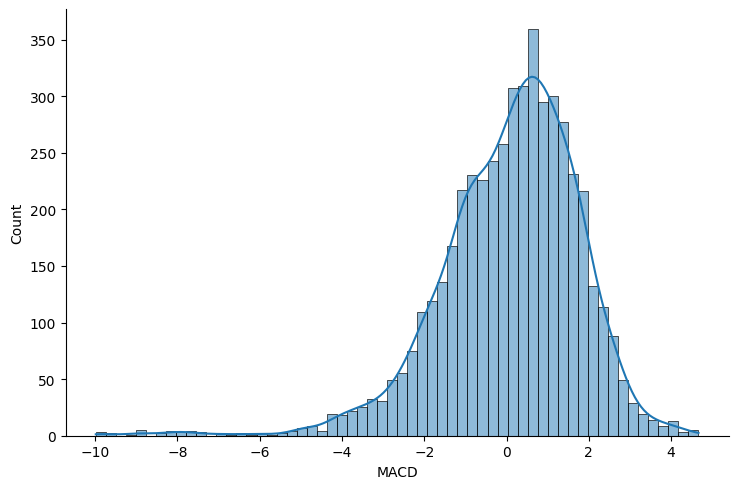

In [13]:
g = sns.displot(vde_df['MACD'], kde=True)
g.fig.set_size_inches(8,5)

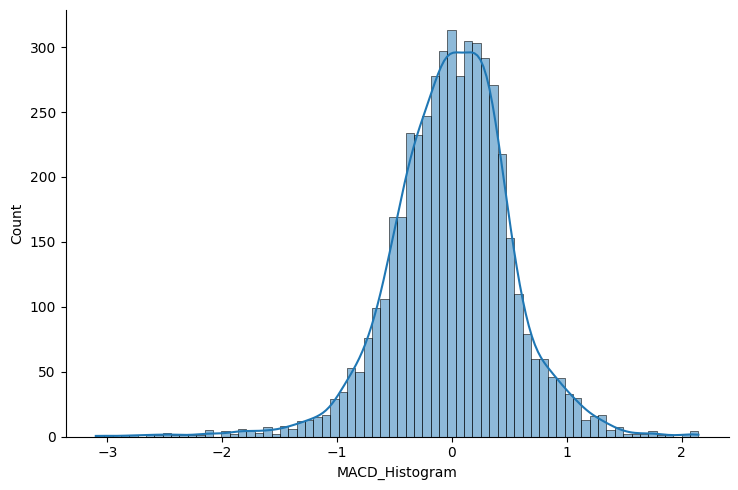

In [14]:
g = sns.displot(vde_df['MACD_Histogram'], kde=True)
g.fig.set_size_inches(8,5)

In [19]:
import plotly.graph_objects as go

# Create a Plotly figure
fig = go.Figure()

# # MACD and Signal lines
# fig.add_trace(go.Scatter(x=vde_df.index, y=vde_df['MACD'], mode='lines', name='MACD'))
# fig.add_trace(go.Scatter(x=vde_df.index, y=vde_df['Signal_Line'], mode='lines', name='Signal'))

# Histogram
fig.add_trace(go.Bar(x=vde_df['DATE'], y=vde_df['MACD_Histogram'], name='Histogram',
                marker_color=['green' if val >= 0 else 'red' for val in vde_df['MACD_Histogram']]))

# # Customize the chart
# fig.update_xaxes(rangeslider=dict(visible=False))
# fig.update_layout(plot_bgcolor='#efefff', font_family='Monospace', font_color='#000000', font_size=20,width=1500)
# fig.update_layout(
#         title="MACD chart for GLD"
#  )
# Show the chart
fig.show()

In [20]:
vde_df

DATE  year       PRICE  Volume       EMA12       EMA26      MACD  \
0    2004-09-29  2004   49.970001     900   49.970001   49.970001  0.000000   
1    2004-09-30  2004   50.419998    4500   50.039231   50.003334  0.035897   
2    2004-10-01  2004   51.070000    6700   50.197811   50.082346  0.115465   
3    2004-10-04  2004   51.119999    6800   50.339686   50.159210  0.180477   
4    2004-10-05  2004   51.590000    8600   50.532042   50.265194  0.266848   
...         ...   ...         ...     ...         ...         ...       ...   
4858 2024-01-18  2024  111.769997  730600  114.722956  116.150416 -1.427461   
4859 2024-01-19  2024  112.050003  505100  114.311732  115.846682 -1.534950   
4860 2024-01-22  2024  112.500000  660300  114.033004  115.598780 -1.565775   
4861 2024-01-23  2024  112.839996  517600  113.849464  115.394425 -1.544961   
4862 2024-01-24  2024  114.470001  713400  113.944932  115.325949 -1.381018   

      Signal_Line  MACD_Histogram  
0        0.000000        0.000000  
1        0.007179        0.028718  
2        0.028836        0.086628  
3        0.059165        0.121312  
4        0.100701        0.166147  
...           ...             ...  
4858    -0.802776       -0.624685  
4859    -0.949211       -0.585739  
4860    -1.072524       -0.493252  
4861    -1.167011       -0.377950  
4862    -1.209812       -0.171205  

[4863 rows x 9 columns]

In [21]:
vde_temp = vde_df.copy()

def rsi_calc(df):
    change = df['PRICE'].diff()
    change.dropna(inplace=True)
    change_up = change.copy()
    change_down = change.copy()
    change_up[change_up<0] = 0
    change_down[change_down>0] = 0
    change.equals(change_up+change_down)
    
    avg_up = change_up.rolling(14).mean()
    avg_down = change_down.rolling(14).mean().abs()
    rsi = 100*avg_up/(avg_up+avg_down)
    return rsi

vde_temp['rsi'] = rsi_calc(vde_temp)
vde_temp = vde_temp[~vde_temp['rsi'].isna()]
vde_temp

DATE  year       PRICE  Volume       EMA12       EMA26      MACD  \
14   2004-10-19  2004   49.740002     400   50.595919   50.566811  0.029108   
15   2004-10-20  2004   50.720001   10600   50.615009   50.578158  0.036850   
16   2004-10-21  2004   51.230000   14100   50.709623   50.626443  0.083180   
17   2004-10-22  2004   51.230000    3800   50.789681   50.671151  0.118530   
18   2004-10-25  2004   51.000000   11700   50.822038   50.695510  0.126528   
...         ...   ...         ...     ...         ...         ...       ...   
4858 2024-01-18  2024  111.769997  730600  114.722956  116.150416 -1.427461   
4859 2024-01-19  2024  112.050003  505100  114.311732  115.846682 -1.534950   
4860 2024-01-22  2024  112.500000  660300  114.033004  115.598780 -1.565775   
4861 2024-01-23  2024  112.839996  517600  113.849464  115.394425 -1.544961   
4862 2024-01-24  2024  114.470001  713400  113.944932  115.325949 -1.381018   

      Signal_Line  MACD_Histogram        rsi  
14       0.227433       -0.198325  48.306341  
15       0.189317       -0.152466  52.049199  
16       0.168089       -0.084909  51.114206  
17       0.158177       -0.039647  50.771395  
18       0.151847       -0.025320  45.718435  
...           ...             ...        ...  
4858    -0.802776       -0.624685  27.080824  
4859    -0.949211       -0.585739  31.443672  
4860    -1.072524       -0.493252  34.296996  
4861    -1.167011       -0.377950  30.507311  
4862    -1.209812       -0.171205  30.891523  

[4849 rows x 10 columns]

In [46]:
result_df

hearing_num  sentence_count  keyword_count  irrel_count  rel_count  \
0        107-017            3080             42            2         40   
1          107-1            2606             18           15          3   
2         107-10            3284           1100           90       1010   
3        107-100            1832             16           14          2   
4        107-101            3326             10            9          1   
...          ...             ...            ...          ...        ...   
1505       117-9            2820              3            3          0   
1506       118-2            2902              7            7          0   
1507       118-3            1485             28           12         16   
1508       118-5            2032             12           10          2   
1509       118-8            3127             28           12         16   

      neutral_count  inc_count  dec_count       date  year    month quarter  \
0                30          0         10 2001-03-07  2001  2001-03  2001Q1   
1                 3          0          0 2001-02-15  2001  2001-02  2001Q1   
2               409        211        390 2001-03-27  2001  2001-03  2001Q1   
3                 1          1          0 2002-03-13  2002  2002-03  2002Q1   
4                 1          0          0 2002-04-17  2002  2002-04  2002Q2   
...             ...        ...        ...        ...   ...      ...     ...   
1505              0          0          0 2021-03-02  2021  2021-03  2021Q1   
1506              0          0          0 2023-02-01  2023  2023-02  2023Q1   
1507              2          3         11 2023-02-01  2023  2023-02  2023Q1   
1508              0          1          1 2023-02-02  2023  2023-02  2023Q1   
1509              7          2          7 2023-02-08  2023  2023-02  2023Q1   

      keyword_pct  relevancy_pct  neutral_pct   inc_pct    dec_pct  \
0        1.363636       1.298701     0.974026  0.000000   0.324675   
1        0.690714       0.115119     0.115119  0.000000   0.000000   
2       33.495737      30.755177    12.454324  6.425091  11.875761   
3        0.873362       0.109170     0.054585  0.054585   0.000000   
4        0.300661       0.030066     0.030066  0.000000   0.000000   
...           ...            ...          ...       ...        ...   
1505     0.106383       0.000000     0.000000  0.000000   0.000000   
1506     0.241213       0.000000     0.000000  0.000000   0.000000   
1507     1.885522       1.077441     0.134680  0.202020   0.740741   
1508     0.590551       0.098425     0.000000  0.049213   0.049213   
1509     0.895427       0.511673     0.223857  0.063959   0.223857   

      inc_dec_diff  
0       -25.000000  
1         0.000000  
2       -17.722772  
3        50.000000  
4         0.000000  
...            ...  
1505      0.000000  
1506      0.000000  
1507    -50.000000  
1508      0.000000  
1509    -31.250000  

[1510 rows x 18 columns]

In [47]:
temp3 = result_df.copy()
temp3['date'] = pd.to_datetime(temp3['date'])
temp3 = temp3.merge(vde_df,left_on='date',right_on='DATE')
temp3

hearing_num  sentence_count  keyword_count  irrel_count  rel_count  \
0        108-122            1240              1            1          0   
1        108-133            1748              8            8          0   
2        108-123            1138             14            9          5   
3        108-126            3958             20           19          1   
4        108-129            2137             13           13          0   
...          ...             ...            ...          ...        ...   
1243       117-9            2820              3            3          0   
1244       118-2            2902              7            7          0   
1245       118-3            1485             28           12         16   
1246       118-5            2032             12           10          2   
1247       118-8            3127             28           12         16   

      neutral_count  inc_count  dec_count       date year_x  ... inc_dec_diff  \
0                 0          0          0 2004-09-29   2004  ...         0.00   
1                 0          0          0 2004-09-29   2004  ...         0.00   
2                 4          1          0 2004-09-30   2004  ...        20.00   
3                 1          0          0 2004-12-07   2004  ...         0.00   
4                 0          0          0 2004-10-06   2004  ...         0.00   
...             ...        ...        ...        ...    ...  ...          ...   
1243              0          0          0 2021-03-02   2021  ...         0.00   
1244              0          0          0 2023-02-01   2023  ...         0.00   
1245              2          3         11 2023-02-01   2023  ...       -50.00   
1246              0          1          1 2023-02-02   2023  ...         0.00   
1247              7          2          7 2023-02-08   2023  ...       -31.25   

           DATE  year_y       PRICE   Volume       EMA12       EMA26  \
0    2004-09-29    2004   49.970001      900   49.970001   49.970001   
1    2004-09-29    2004   49.970001      900   49.970001   49.970001   
2    2004-09-30    2004   50.419998     4500   50.039231   50.003334   
3    2004-12-07    2004   50.889999     5100   52.209993   51.930314   
4    2004-10-06    2004   52.580002    14400   50.847113   50.436661   
...         ...     ...         ...      ...         ...         ...   
1243 2021-03-02    2021   68.050003  1317400   65.950610   63.041985   
1244 2023-02-01    2023  122.589996   709000  124.277139  123.284003   
1245 2023-02-01    2023  122.589996   709000  124.277139  123.284003   
1246 2023-02-02    2023  119.709999  1257000  123.574502  123.019262   
1247 2023-02-08    2023  121.519997   274300  122.204681  122.392799   

          MACD Signal_Line  MACD_Histogram  
0     0.000000    0.000000        0.000000  
1     0.000000    0.000000        0.000000  
2     0.035897    0.007179        0.028718  
3     0.279679    0.524059       -0.244381  
4     0.410452    0.162651        0.247800  
...        ...         ...             ...  
1243  2.908624    2.581202        0.327423  
1244  0.993137    1.057732       -0.064596  
1245  0.993137    1.057732       -0.064596  
1246  0.555241    0.957234       -0.401993  
1247 -0.188118    0.331564       -0.519682  

[1248 rows x 27 columns]

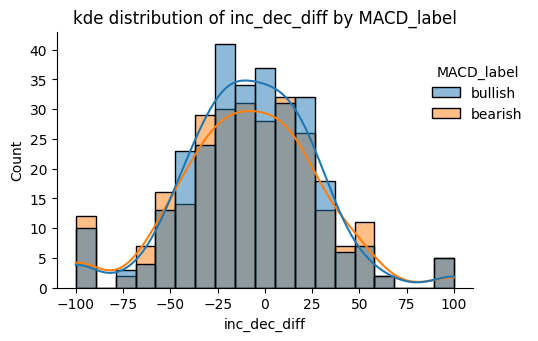

In [54]:
temp3['MACD_label'] = np.select((temp3['MACD_Histogram'] > 0, temp3['MACD_Histogram'] < 0, temp3['MACD_Histogram'] == 0),
                                  ('bullish','bearish','neutral'))
g = sns.displot(data=temp3[temp3['inc_dec_diff']!=0], x="inc_dec_diff", hue="MACD_label",kde=True)
g.fig.set_size_inches(6,3)
plt.title('kde distribution of inc_dec_diff by MACD_label')
sns.move_legend(g, "upper right", bbox_to_anchor=(0.9, 0.9))

### predict icln base on VDE

In [70]:
icln_df = pd.read_csv('/home/congress-user/data_collection/energy_data/icln.csv')
icln_df = icln_df.drop(columns=['Unnamed: 0'])
icln_df['DATE'] = pd.to_datetime(icln_df['DATE'])
icln_df['year'] = icln_df['DATE'].dt.year
icln_df

DATE      PRICE   Volume  RETURN_1  RETURN_5  RETURN_7  RETURN_14  \
0    2008-06-25  52.770000     2000 -0.032405 -0.099678 -0.091908  -0.061967   
1    2008-06-26  51.060001     9800 -0.017626 -0.069526 -0.060909  -0.028594   
2    2008-06-27  50.160000     7700  0.001794 -0.044657 -0.051037  -0.019537   
3    2008-06-30  50.250000    17100 -0.028856 -0.045771 -0.044378  -0.002388   
4    2008-07-01  48.799999    14900 -0.026434 -0.024590 -0.011066   0.008197   
...         ...        ...      ...       ...       ...       ...        ...   
3917 2024-01-18  13.770000  3770200 -0.000726       NaN       NaN        NaN   
3918 2024-01-19  13.760000  4393400  0.010174       NaN       NaN        NaN   
3919 2024-01-22  13.900000  3623300  0.012230       NaN       NaN        NaN   
3920 2024-01-23  14.070000  3054100 -0.009240       NaN       NaN        NaN   
3921 2024-01-24  13.940000  2201300       NaN       NaN       NaN        NaN   

      RETURN_21  RETURN_28  VOLUME_1  ...  VOLUME_14  VOLUME_21  VOLUME_28  \
0     -0.099678  -0.111806  3.900000  ...   1.150000   0.350000  -0.200000   
1     -0.075402  -0.072072 -0.214286  ...  -0.520408   0.918367  -0.591837   
2     -0.036683  -0.055821  1.220779  ...  -0.376623   1.493506  -0.207792   
3     -0.016119  -0.073831 -0.128655  ...   0.011696  -0.789474  -0.713450   
4      0.002869  -0.060656 -0.550336  ...  -0.362416  -0.785235  -0.832215   
...         ...        ...       ...  ...        ...        ...        ...   
3917        NaN        NaN  0.165296  ...        NaN        NaN        NaN   
3918        NaN        NaN -0.175286  ...        NaN        NaN        NaN   
3919        NaN        NaN -0.157094  ...        NaN        NaN        NaN   
3920        NaN        NaN -0.279231  ...        NaN        NaN        NaN   
3921        NaN        NaN       NaN  ...        NaN        NaN        NaN   

       Log_Ret  VOLATILITY_5  VOLATILITY_7  VOLATILITY_14  VOLATILITY_21  \
0          NaN           NaN           NaN            NaN            NaN   
1    -0.032941           NaN           NaN            NaN            NaN   
2    -0.017784           NaN           NaN            NaN            NaN   
3     0.001793           NaN           NaN            NaN            NaN   
4    -0.029280           NaN           NaN            NaN            NaN   
...        ...           ...           ...            ...            ...   
3917  0.004367      0.241621      0.223528       0.193935       0.281524   
3918 -0.000726      0.263010      0.227958       0.186133       0.280015   
3919  0.010123      0.309861      0.254783       0.203891       0.261974   
3920  0.012156      0.224577      0.282545       0.220238       0.235324   
3921 -0.009282      0.137626      0.283197       0.207516       0.199957   

      VOLATILITY_28  year  
0               NaN  2008  
1               NaN  2008  
2               NaN  2008  
3               NaN  2008  
4               NaN  2008  
...             ...   ...  
3917       0.324564  2024  
3918       0.324337  2024  
3919       0.324512  2024  
3920       0.326600  2024  
3921       0.323627  2024  

[3922 rows x 22 columns]

In [79]:
data_df = analysis1[['date','inc_dec_diff']].merge(vde_temp, left_on='date',right_on='DATE').merge(icln_df, left_on='date',right_on='DATE')
data_df = data_df.rename(columns={'PRICE_y':'ICLN_Price','MACD_Histogram':'VDE_MACD','rsi':'VDE_RSI'})
data_df

date  inc_dec_diff     DATE_x  year_x     PRICE_x  Volume_x  \
0    2008-06-26    -30.000000 2008-06-26    2008  126.709999     61500   
1    2008-07-10     -3.040541 2008-07-10    2008  121.209999    166500   
2    2008-07-15    -10.276680 2008-07-15    2008  116.750000    181700   
3    2008-07-17    -34.853420 2008-07-17    2008  112.320000    158800   
4    2008-07-17      0.000000 2008-07-17    2008  112.320000    158800   
...         ...           ...        ...     ...         ...       ...   
1027 2021-03-02      0.000000 2021-03-02    2021   68.050003   1317400   
1028 2023-02-01      0.000000 2023-02-01    2023  122.589996    709000   
1029 2023-02-01      0.000000 2023-02-01    2023  122.589996    709000   
1030 2023-02-02      0.000000 2023-02-02    2023  119.709999   1257000   
1031 2023-02-08      0.000000 2023-02-08    2023  121.519997    274300   

           EMA12       EMA26      MACD  Signal_Line  ...  VOLUME_14  \
0     127.517098  126.397440  1.119658     1.356646  ...  -0.520408   
1     123.843904  125.009761 -1.165857     0.041856  ...   2.272727   
2     122.112824  123.889677 -1.776853    -0.723893  ...  -0.719008   
3     119.581371  122.370820 -2.789449    -1.384904  ...  -0.148936   
4     119.581371  122.370820 -2.789449    -1.384904  ...  -0.148936   
...          ...         ...       ...          ...  ...        ...   
1027   65.950610   63.041985  2.908624     2.581202  ...   0.206915   
1028  124.277139  123.284003  0.993137     1.057732  ...   0.753912   
1029  124.277139  123.284003  0.993137     1.057732  ...   0.753912   
1030  123.574502  123.019262  0.555241     0.957234  ...  -0.630311   
1031  122.204681  122.392799 -0.188118     0.331564  ...  -0.107319   

      VOLUME_21 VOLUME_28   Log_Ret  VOLATILITY_5  VOLATILITY_7  \
0      0.918367 -0.591837 -0.032941           NaN           NaN   
1      3.454545  0.636364  0.008785      0.107159      0.249803   
2     -0.685950 -0.504132 -0.017417      0.229922      0.192495   
3     -0.148936 -0.042553  0.002018      0.256271      0.226306   
4     -0.148936 -0.042553  0.002018      0.256271      0.226306   
...         ...       ...       ...           ...           ...   
1027   1.295303  0.220077 -0.032579      0.588303      0.621481   
1028  -0.389561 -0.302408  0.010074      0.276799      0.241308   
1029  -0.389561 -0.302408  0.010074      0.276799      0.241308   
1030  -0.625481 -0.500000 -0.006225      0.284227      0.239577   
1031  -0.110536  0.080530 -0.007948      0.161872      0.267463   

      VOLATILITY_14  VOLATILITY_21  VOLATILITY_28  year_y  
0               NaN            NaN            NaN    2008  
1               NaN            NaN            NaN    2008  
2               NaN            NaN            NaN    2008  
3          0.252597            NaN            NaN    2008  
4          0.252597            NaN            NaN    2008  
...             ...            ...            ...     ...  
1027       0.487467       0.436061       0.461054    2021  
1028       0.255548       0.266047       0.250460    2023  
1029       0.255548       0.266047       0.250460    2023  
1030       0.247570       0.263384       0.248140    2023  
1031       0.223581       0.256162       0.251629    2023  

[1032 rows x 34 columns]

In [82]:
data_df.columns

Index(['date', 'inc_dec_diff', 'DATE_x', 'year_x', 'PRICE_x', 'Volume_x',
       'EMA12', 'EMA26', 'MACD', 'Signal_Line', 'VDE_MACD', 'VDE_RSI',
       'DATE_y', 'ICLN_Price', 'Volume_y', 'RETURN_1', 'RETURN_5', 'RETURN_7',
       'RETURN_14', 'RETURN_21', 'RETURN_28', 'VOLUME_1', 'VOLUME_5',
       'VOLUME_7', 'VOLUME_14', 'VOLUME_21', 'VOLUME_28', 'Log_Ret',
       'VOLATILITY_5', 'VOLATILITY_7', 'VOLATILITY_14', 'VOLATILITY_21',
       'VOLATILITY_28', 'year_y'],
      dtype='object')

In [80]:
import statsmodels.api as sm

X = data_df[['inc_dec_diff','VDE_MACD','VDE_RSI']]
Y = data_df['Log_Ret']
S = sm.add_constant(X)

#fit linear regression model
model = sm.OLS(Y, X).fit()

#view model summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                Log_Ret   R-squared (uncentered):                   0.029
Model:                            OLS   Adj. R-squared (uncentered):              0.026
Method:                 Least Squares   F-statistic:                              10.34
Date:                Fri, 29 Mar 2024   Prob (F-statistic):                    1.04e-06
Time:                        17:34:39   Log-Likelihood:                          2667.9
No. Observations:                1032   AIC:                                     -5330.
Df Residuals:                    1029   BIC:                                     -5315.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [81]:
import statsmodels.api as sm

X = data_df[['inc_dec_diff','VDE_MACD','VDE_RSI']]
Y = data_df['ICLN_Price']
S = sm.add_constant(X)

#fit linear regression model
model = sm.OLS(Y, X).fit()

#view model summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:             ICLN_Price   R-squared (uncentered):                   0.784
Model:                            OLS   Adj. R-squared (uncentered):              0.783
Method:                 Least Squares   F-statistic:                              1246.
Date:                Fri, 29 Mar 2024   Prob (F-statistic):                        0.00
Time:                        17:34:56   Log-Likelihood:                         -3429.5
No. Observations:                1032   AIC:                                      6865.
Df Residuals:                    1029   BIC:                                      6880.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

### predict ieo base on VDE

In [87]:
ieo_df = pd.read_csv('/home/congress-user/data_collection/energy_data/ieo.csv')
ieo_df = ieo_df.drop(columns=['Unnamed: 0'])
ieo_df['DATE'] = pd.to_datetime(icln_df['DATE'])
ieo_df['year'] = ieo_df['DATE'].dt.year
ieo_df

DATE      PRICE  Volume  RETURN_1  RETURN_5  RETURN_7  RETURN_14  \
0    2008-06-25  51.189999    1000  0.000000 -0.033991 -0.059582  -0.093182   
1    2008-06-26  51.189999    9300  0.003516 -0.061340 -0.083805  -0.084391   
2    2008-06-27  51.369999   37400  0.009928 -0.062877 -0.104536  -0.101616   
3    2008-06-30  51.880001    8600 -0.008096 -0.095991 -0.107941  -0.085004   
4    2008-07-01  51.459999   20600 -0.039059 -0.106102 -0.120093  -0.075204   
...         ...        ...     ...       ...       ...       ...        ...   
4455        NaT  87.760002  131100  0.004558       NaN       NaN        NaN   
4456        NaT  88.160004   97900  0.003630       NaN       NaN        NaN   
4457        NaT  88.480003  163800  0.001356       NaN       NaN        NaN   
4458        NaT  88.599998   68500  0.014108       NaN       NaN        NaN   
4459        NaT  89.849998  112600       NaN       NaN       NaN        NaN   

      RETURN_21  RETURN_28  VOLUME_1  ...  VOLUME_14  VOLUME_21  VOLUME_28  \
0     -0.085954  -0.115452  8.300000  ...  11.300000   5.800000  14.500000   
1     -0.120922  -0.112131  3.021505  ...   1.967742  -0.462366   0.182796   
2     -0.119136  -0.153397 -0.770053  ...  -0.946524  -0.748663  -0.585561   
3     -0.137625  -0.164996  1.395349  ...  -0.697674  -0.186047   2.825581   
4     -0.149825  -0.137388  0.864078  ...  -0.592233  -0.723301   0.606796   
...         ...        ...       ...  ...        ...        ...        ...   
4455        NaN        NaN -0.253242  ...        NaN        NaN        NaN   
4456        NaN        NaN  0.673136  ...        NaN        NaN        NaN   
4457        NaN        NaN -0.581807  ...        NaN        NaN        NaN   
4458        NaN        NaN  0.643796  ...        NaN        NaN        NaN   
4459        NaN        NaN       NaN  ...        NaN        NaN        NaN   

       Log_Ret  VOLATILITY_5  VOLATILITY_7  VOLATILITY_14  VOLATILITY_21  \
0          NaN           NaN           NaN            NaN            NaN   
1     0.000000           NaN           NaN            NaN            NaN   
2     0.003510           NaN           NaN            NaN            NaN   
3     0.009879           NaN           NaN            NaN            NaN   
4    -0.008129           NaN           NaN            NaN            NaN   
...        ...           ...           ...            ...            ...   
4455 -0.002845      0.242257      0.206003       0.213416       0.212399   
4456  0.004548      0.249586      0.213618       0.211220       0.207583   
4457  0.003623      0.213553      0.211703       0.213857       0.201582   
4458  0.001355      0.102610      0.211988       0.205930       0.193561   
4459  0.014010      0.098622      0.215292       0.201396       0.199606   

      VOLATILITY_28    year  
0               NaN  2008.0  
1               NaN  2008.0  
2               NaN  2008.0  
3               NaN  2008.0  
4               NaN  2008.0  
...             ...     ...  
4455       0.223962     NaN  
4456       0.224446     NaN  
4457       0.222198     NaN  
4458       0.222011     NaN  
4459       0.221598     NaN  

[4460 rows x 22 columns]

In [91]:
data_df = analysis1[['date','inc_dec_diff']].merge(vde_temp, left_on='date',right_on='DATE').merge(ieo_df, left_on='date',right_on='DATE')
data_df = data_df.rename(columns={'PRICE_y':'IEO_Price','MACD_Histogram':'VDE_MACD','rsi':'VDE_RSI'})
data_df

date  inc_dec_diff     DATE_x  year_x     PRICE_x  Volume_x  \
0    2008-06-26    -30.000000 2008-06-26    2008  126.709999     61500   
1    2008-07-10     -3.040541 2008-07-10    2008  121.209999    166500   
2    2008-07-15    -10.276680 2008-07-15    2008  116.750000    181700   
3    2008-07-17    -34.853420 2008-07-17    2008  112.320000    158800   
4    2008-07-17      0.000000 2008-07-17    2008  112.320000    158800   
...         ...           ...        ...     ...         ...       ...   
1027 2021-03-02      0.000000 2021-03-02    2021   68.050003   1317400   
1028 2023-02-01      0.000000 2023-02-01    2023  122.589996    709000   
1029 2023-02-01      0.000000 2023-02-01    2023  122.589996    709000   
1030 2023-02-02      0.000000 2023-02-02    2023  119.709999   1257000   
1031 2023-02-08      0.000000 2023-02-08    2023  121.519997    274300   

           EMA12       EMA26      MACD  Signal_Line  ...  VOLUME_14  \
0     127.517098  126.397440  1.119658     1.356646  ...   1.967742   
1     123.843904  125.009761 -1.165857     0.041856  ...  -0.878893   
2     122.112824  123.889677 -1.776853    -0.723893  ...   0.819444   
3     119.581371  122.370820 -2.789449    -1.384904  ...  -0.601449   
4     119.581371  122.370820 -2.789449    -1.384904  ...  -0.601449   
...          ...         ...       ...          ...  ...        ...   
1027   65.950610   63.041985  2.908624     2.581202  ...   0.187858   
1028  124.277139  123.284003  0.993137     1.057732  ...  -0.684274   
1029  124.277139  123.284003  0.993137     1.057732  ...  -0.684274   
1030  123.574502  123.019262  0.555241     0.957234  ...  -0.367490   
1031  122.204681  122.392799 -0.188118     0.331564  ...  -0.570189   

      VOLUME_21 VOLUME_28   Log_Ret  VOLATILITY_5  VOLATILITY_7  \
0     -0.462366  0.182796  0.000000           NaN           NaN   
1     -0.430796 -0.105536  0.006068      0.256426      0.268090   
2     -0.358333 -0.772222 -0.013684      0.223177      0.224757   
3     -0.311594 -0.836957  0.009647      0.331714      0.303343   
4     -0.311594 -0.836957  0.009647      0.331714      0.303343   
...         ...       ...       ...           ...           ...   
1027   0.689576 -0.383734  0.004325      0.231097      0.262151   
1028  -0.346084 -0.102004  0.042098      0.603907      0.495783   
1029  -0.346084 -0.102004  0.042098      0.603907      0.495783   
1030  -0.645552 -0.343735 -0.018051      0.439811      0.541512   
1031   0.152629 -0.216437 -0.005731      0.351613      0.427420   

      VOLATILITY_14  VOLATILITY_21  VOLATILITY_28  year_y  
0               NaN            NaN            NaN  2008.0  
1               NaN            NaN            NaN  2008.0  
2               NaN            NaN            NaN  2008.0  
3          0.308462            NaN            NaN  2008.0  
4          0.308462            NaN            NaN  2008.0  
...             ...            ...            ...     ...  
1027       0.498173       0.451527       0.422028  2021.0  
1028       0.633576       0.609346       0.689257  2023.0  
1029       0.633576       0.609346       0.689257  2023.0  
1030       0.641740       0.616098       0.693406  2023.0  
1031       0.559675       0.565694       0.704174  2023.0  

[1032 rows x 34 columns]

In [92]:
data_df.columns

Index(['date', 'inc_dec_diff', 'DATE_x', 'year_x', 'PRICE_x', 'Volume_x',
       'EMA12', 'EMA26', 'MACD', 'Signal_Line', 'VDE_MACD', 'VDE_RSI',
       'DATE_y', 'IEO_Price', 'Volume_y', 'RETURN_1', 'RETURN_5', 'RETURN_7',
       'RETURN_14', 'RETURN_21', 'RETURN_28', 'VOLUME_1', 'VOLUME_5',
       'VOLUME_7', 'VOLUME_14', 'VOLUME_21', 'VOLUME_28', 'Log_Ret',
       'VOLATILITY_5', 'VOLATILITY_7', 'VOLATILITY_14', 'VOLATILITY_21',
       'VOLATILITY_28', 'year_y'],
      dtype='object')

In [102]:
import statsmodels.api as sm

X = data_df[['inc_dec_diff','VDE_MACD']]
Y = data_df['Log_Ret']
S = sm.add_constant(X)

#fit linear regression model
model = sm.OLS(Y, X).fit()

#view model summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                Log_Ret   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):             -0.001
Method:                 Least Squares   F-statistic:                             0.3835
Date:                Fri, 29 Mar 2024   Prob (F-statistic):                       0.682
Time:                        17:40:59   Log-Likelihood:                          2632.4
No. Observations:                1032   AIC:                                     -5261.
Df Residuals:                    1030   BIC:                                     -5251.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [97]:
import statsmodels.api as sm

X = data_df[['inc_dec_diff','VDE_MACD','VDE_RSI']]
Y = data_df['VOLUME_7']
S = sm.add_constant(X)

#fit linear regression model
model = sm.OLS(Y, X).fit()

#view model summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:               VOLUME_7   R-squared (uncentered):                   0.067
Model:                            OLS   Adj. R-squared (uncentered):              0.065
Method:                 Least Squares   F-statistic:                              24.80
Date:                Fri, 29 Mar 2024   Prob (F-statistic):                    1.70e-15
Time:                        17:39:37   Log-Likelihood:                         -2242.7
No. Observations:                1032   AIC:                                      4491.
Df Residuals:                    1029   BIC:                                      4506.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

# Measure vs Search Trend

In [11]:
result_df

hearing_num  sentence_count  keyword_count  irrel_count  rel_count  \
0        107-017            3080             42            2         40   
1          107-1            2606             18           15          3   
2         107-10            3284           1100           90       1010   
3        107-100            1832             16           14          2   
4        107-101            3326             10            9          1   
...          ...             ...            ...          ...        ...   
1505       117-9            2820              3            3          0   
1506       118-2            2902              7            7          0   
1507       118-3            1485             28           12         16   
1508       118-5            2032             12           10          2   
1509       118-8            3127             28           12         16   

      neutral_count  inc_count  dec_count       date  year    month quarter  \
0                30          0         10 2001-03-07  2001  2001-03  2001Q1   
1                 3          0          0 2001-02-15  2001  2001-02  2001Q1   
2               409        211        390 2001-03-27  2001  2001-03  2001Q1   
3                 1          1          0 2002-03-13  2002  2002-03  2002Q1   
4                 1          0          0 2002-04-17  2002  2002-04  2002Q2   
...             ...        ...        ...        ...   ...      ...     ...   
1505              0          0          0 2021-03-02  2021  2021-03  2021Q1   
1506              0          0          0 2023-02-01  2023  2023-02  2023Q1   
1507              2          3         11 2023-02-01  2023  2023-02  2023Q1   
1508              0          1          1 2023-02-02  2023  2023-02  2023Q1   
1509              7          2          7 2023-02-08  2023  2023-02  2023Q1   

      keyword_pct  relevancy_pct  neutral_pct   inc_pct    dec_pct  \
0        1.363636       1.298701     0.974026  0.000000   0.324675   
1        0.690714       0.115119     0.115119  0.000000   0.000000   
2       33.495737      30.755177    12.454324  6.425091  11.875761   
3        0.873362       0.109170     0.054585  0.054585   0.000000   
4        0.300661       0.030066     0.030066  0.000000   0.000000   
...           ...            ...          ...       ...        ...   
1505     0.106383       0.000000     0.000000  0.000000   0.000000   
1506     0.241213       0.000000     0.000000  0.000000   0.000000   
1507     1.885522       1.077441     0.134680  0.202020   0.740741   
1508     0.590551       0.098425     0.000000  0.049213   0.049213   
1509     0.895427       0.511673     0.223857  0.063959   0.223857   

      inc_dec_diff  
0       -25.000000  
1         0.000000  
2       -17.722772  
3        50.000000  
4         0.000000  
...            ...  
1505      0.000000  
1506      0.000000  
1507    -50.000000  
1508      0.000000  
1509    -31.250000  

[1510 rows x 18 columns]

## clean energy

In [12]:
clean_energy_search = pd.read_csv('/home/congress-user/data_collection/search_data/clean_energy_search.csv')
clean_energy_search = clean_energy_search.iloc[1:]
clean_energy_search = clean_energy_search.rename(columns={'Category: All categories':'#search'})
clean_energy_search['month'] = pd.to_datetime(clean_energy_search.index).to_period('M')
clean_energy_search['#search'] = clean_energy_search['#search'].astype(int)
clean_energy_search

#search    month
2004-01       18  2004-01
2004-02       19  2004-02
2004-03       36  2004-03
2004-04       25  2004-04
2004-05       12  2004-05
...          ...      ...
2023-11       66  2023-11
2023-12       60  2023-12
2024-01       68  2024-01
2024-02       79  2024-02
2024-03       80  2024-03

[243 rows x 2 columns]

In [ ]:
marked_dates_dec = result_df[result_df['inc_dec_diff'] < 0]['date'].unique()
marked_dates_inc = result_df[result_df['inc_dec_diff'] > 0]['date'].unique()
search_marked_inc = clean_energy_search[clean_energy_search['month'].isin(marked_dates_inc)]
search_marked_dec = clean_energy_search[clean_energy_search['month'].isin(marked_dates_dec)]

ax = clean_energy_search.plot(x='month',y='#search',figsize=(15,4), alpha=0.7)
search_marked_inc.plot(x='month',y='#search',kind='scatter',c='r',ax=ax)
search_marked_dec.plot(x='month',y='#search',kind='scatter',c='g',ax=ax)
# plt.title('benchmark: VDE - 1 day Volume')
plt.show()

In [29]:
temp2 = result_df.groupby(['month'])['inc_dec_diff'].sum().reset_index()
temp2 = temp2.merge(clean_energy_search)
temp2

month  inc_dec_diff  #search
0    2004-01    -33.333333       18
1    2004-02      0.000000       19
2    2004-03     29.302441       36
3    2004-04    -48.626744       25
4    2004-05      8.403383       12
..       ...           ...      ...
170  2021-04   -113.651448       59
171  2021-05   -114.529347       55
172  2021-06   -150.883960       74
173  2021-07    -17.441860       45
174  2023-02    -81.250000       72

[175 rows x 3 columns]

In [133]:
from typing import List, Union

import matplotlib.axes
import pandas as pd

def plot_multi(
    data: pd.DataFrame,
    x: Union[str, None] = None,
    y: Union[List[str], None] = None,
    spacing: float = 0.1,
    **kwargs
) -> matplotlib.axes.Axes:
    """Plot multiple Y axes on the same chart with same x axis.

    Args:
        data: dataframe which contains x and y columns
        x: column to use as x axis. If None, use index.
        y: list of columns to use as Y axes. If None, all columns are used
            except x column.
        spacing: spacing between the plots
        **kwargs: keyword arguments to pass to data.plot()

    Returns:
        a matplotlib.axes.Axes object returned from data.plot()

    Example:
    >>> plot_multi(df, figsize=(22, 10))
    >>> plot_multi(df, x='time', figsize=(22, 10))
    >>> plot_multi(df, y='price qty value'.split(), figsize=(22, 10))
    >>> plot_multi(df, x='time', y='price qty value'.split(), figsize=(22, 10))
    >>> plot_multi(df[['time price qty'.split()]], x='time', figsize=(22, 10))

    See Also:
        This code is mentioned in https://stackoverflow.com/q/11640243/2593810
    """
    from pandas.plotting._matplotlib.style import get_standard_colors

    # Get default color style from pandas - can be changed to any other color list
    if y is None:
        y = data.columns

    # remove x_col from y_cols
    if x:
        y = [col for col in y if col != x]

    if len(y) == 0:
        return
    colors = get_standard_colors(num_colors=len(y))

    if "legend" not in kwargs:
        kwargs["legend"] = False  # prevent multiple legends

    # First axis
    ax = data.plot(x=x, y=y[0], color=colors[0], **kwargs)
    ax.set_ylabel(ylabel=y[0])
    lines, labels = ax.get_legend_handles_labels()

    for i in range(1, len(y)):
        # Multiple y-axes
        ax_new = ax.twinx()
        ax_new.spines["right"].set_position(("axes", 1 + spacing * (i - 1)))
        data.plot(
            ax=ax_new, x=x, y=y[i], color=colors[i % len(colors)], **kwargs
        )
        ax_new.set_ylabel(ylabel=y[i])

        # Proper legend position
        line, label = ax_new.get_legend_handles_labels()
        lines += line
        labels += label

    ax.legend(lines, labels, loc=0)
    return ax

<Axes: xlabel='month', ylabel='inc_dec_diff'>

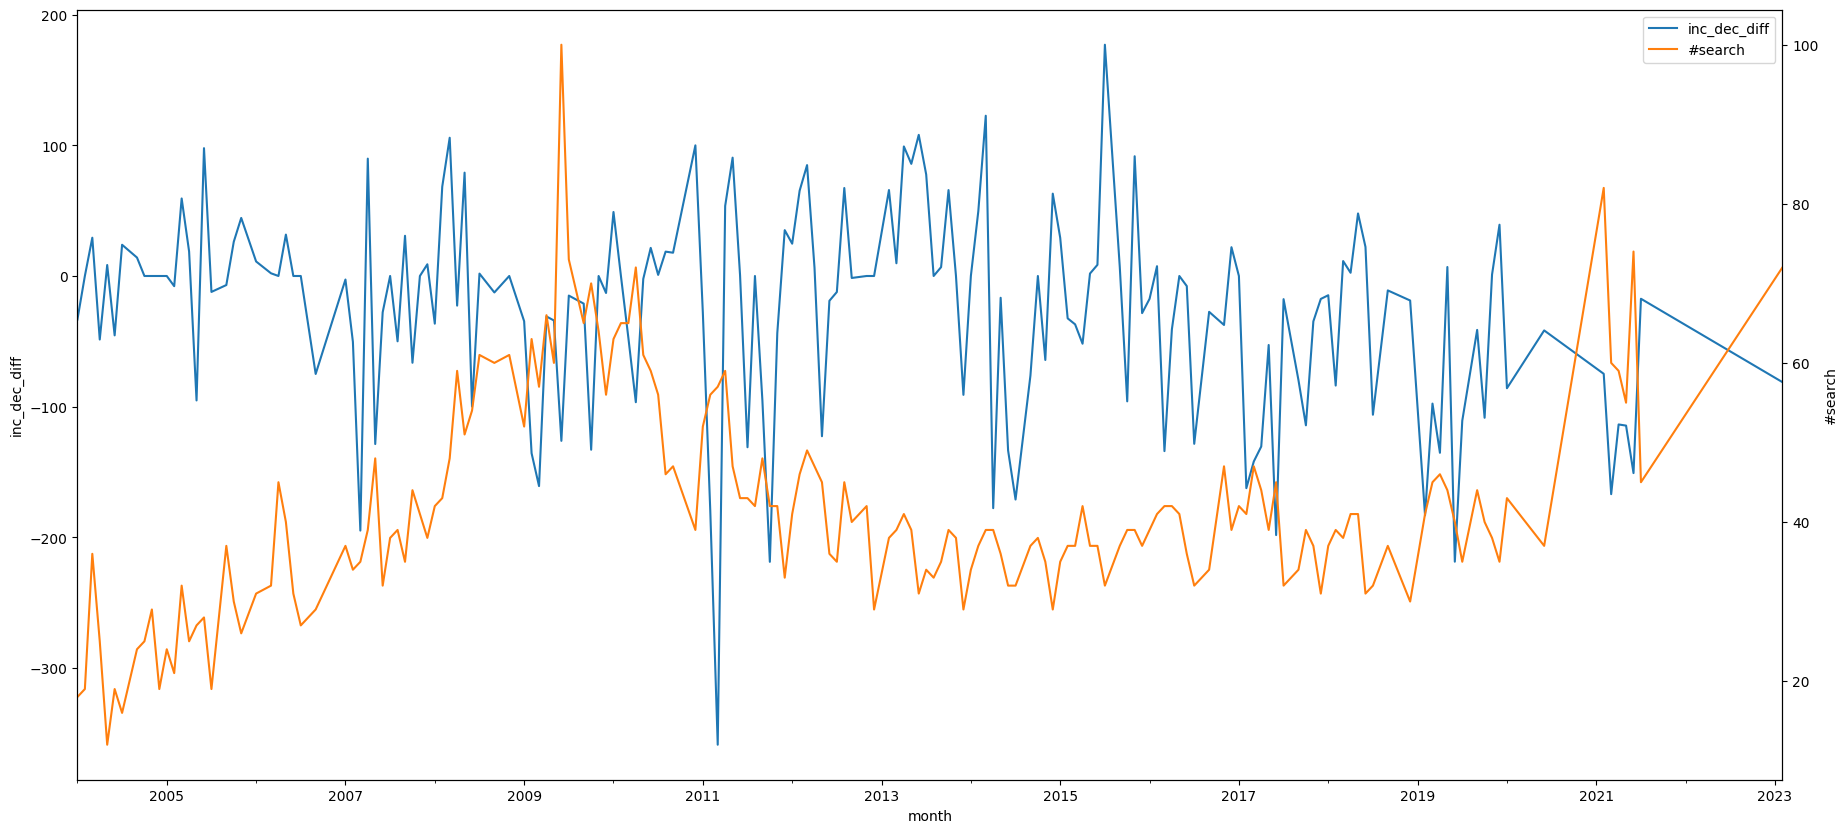

In [134]:
plot_multi(temp2, x='month', y='inc_dec_diff #search'.split(), figsize=(22, 10))

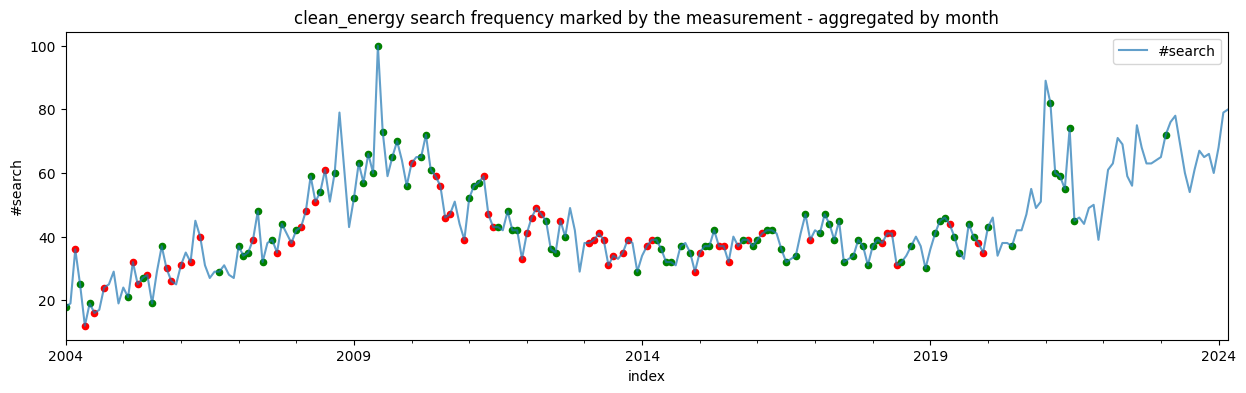

In [16]:
marked_dates_dec = temp2[temp2['inc_dec_diff'] < 0]['month'].unique()
marked_dates_inc = temp2[temp2['inc_dec_diff'] > 0]['month'].unique()
search_marked_inc = clean_energy_search[clean_energy_search['month'].isin(marked_dates_inc)]
search_marked_dec = clean_energy_search[clean_energy_search['month'].isin(marked_dates_dec)]

ax = clean_energy_search.plot(x='month',y='#search',figsize=(15,4), alpha=0.7)
# search_marked_inc.plot(x='month', y='#search',kind='scatter',c='r',ax=ax)
# search_marked_dec.plot(x='month', y='#search',kind='scatter',c='g',ax=ax)
search_marked_inc.reset_index().plot.scatter(x = 'index', y = '#search',c='r',ax=ax)
search_marked_dec.reset_index().plot.scatter(x = 'index', y = '#search',c='g',ax=ax)
plt.title('clean_energy search frequency marked by the measurement - aggregated by month')
plt.show()

In [170]:
temp3 = result_df[result_df['rel_count'] >= 22].groupby(['month'])['inc_dec_diff'].sum().reset_index()
temp3 = temp3.merge(clean_energy_search)
temp3

month  inc_dec_diff  #search
0    2004-01    -33.333333       18
1    2004-03      4.302441       36
2    2004-04     28.296333       25
3    2004-05      8.403383       12
4    2004-07     23.900888       16
..       ...           ...      ...
136  2021-03   -167.011681       60
137  2021-04   -105.318115       59
138  2021-05    -43.100775       55
139  2021-06    -50.883960       74
140  2021-07    -17.441860       45

[141 rows x 3 columns]

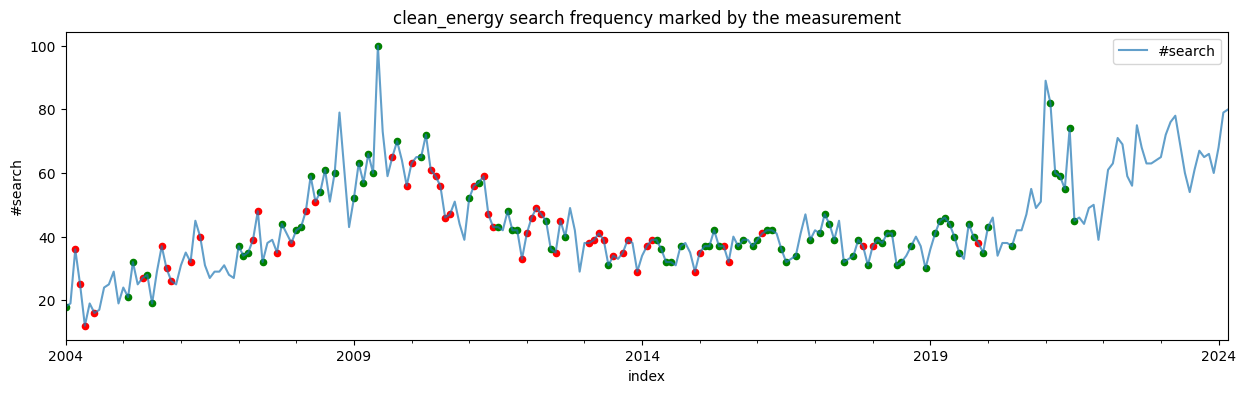

In [171]:
marked_dates_dec = temp3[temp3['inc_dec_diff'] < 0]['month'].unique()
marked_dates_inc = temp3[temp3['inc_dec_diff'] > 0]['month'].unique()
search_marked_inc = clean_energy_search[clean_energy_search['month'].isin(marked_dates_inc)]
search_marked_dec = clean_energy_search[clean_energy_search['month'].isin(marked_dates_dec)]

ax = clean_energy_search.plot(x='month',y='#search',figsize=(15,4), alpha=0.7)
# search_marked_inc.plot(x='month', y='#search',kind='scatter',c='r',ax=ax)
# search_marked_dec.plot(x='month', y='#search',kind='scatter',c='g',ax=ax)
search_marked_inc.reset_index().plot.scatter(x = 'index', y = '#search',c='r',ax=ax)
search_marked_dec.reset_index().plot.scatter(x = 'index', y = '#search',c='g',ax=ax)
plt.title('clean_energy search frequency marked by the measurement - after relevancy filtering')
plt.show()

In [192]:
temp4 = result_df.groupby(['quarter'])['inc_dec_diff'].sum().reset_index()
temp4

quarter  inc_dec_diff
0   2001Q1    138.898785
1   2001Q2    -51.634427
2   2001Q3   -137.811130
3   2001Q4     29.217967
4   2002Q1    105.408629
..     ...           ...
76  2020Q2    -41.666667
77  2021Q1   -241.894546
78  2021Q2   -379.064755
79  2021Q3    -17.441860
80  2023Q1    -81.250000

[81 rows x 2 columns]

In [198]:
clean_energy_search['quarter'] = pd.to_datetime(clean_energy_search.index).to_period('Q')
clean_energy_search

#search    month quarter
2004-01       18  2004-01  2004Q1
2004-02       19  2004-02  2004Q1
2004-03       36  2004-03  2004Q1
2004-04       25  2004-04  2004Q2
2004-05       12  2004-05  2004Q2
...          ...      ...     ...
2023-11       66  2023-11  2023Q4
2023-12       60  2023-12  2023Q4
2024-01       68  2024-01  2024Q1
2024-02       79  2024-02  2024Q1
2024-03       80  2024-03  2024Q1

[243 rows x 3 columns]

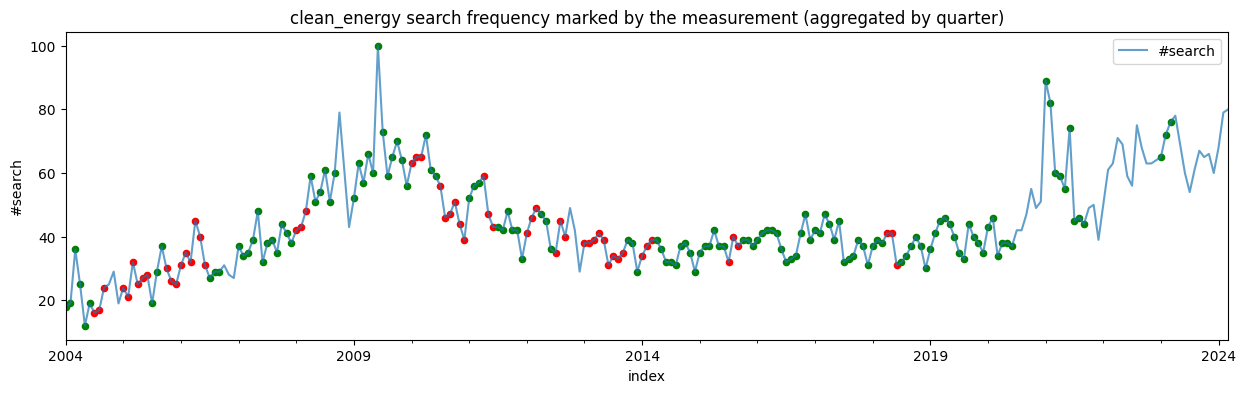

In [209]:
marked_dates_dec = temp4[temp4['inc_dec_diff'] < 0]['quarter'].unique()
marked_dates_inc = temp4[temp4['inc_dec_diff'] > 0]['quarter'].unique()
search_marked_inc = clean_energy_search[clean_energy_search['quarter'].isin(marked_dates_inc)]
search_marked_dec = clean_energy_search[clean_energy_search['quarter'].isin(marked_dates_dec)]

ax = clean_energy_search.plot(x='month',y='#search',figsize=(15,4), alpha=0.7)
# search_marked_inc.plot(x='month', y='#search',kind='scatter',c='r',ax=ax)
# search_marked_dec.plot(x='month', y='#search',kind='scatter',c='g',ax=ax)
search_marked_inc.reset_index().plot.scatter(x = 'index', y = '#search',c='r',ax=ax)
search_marked_dec.reset_index().plot.scatter(x = 'index', y = '#search',c='g',ax=ax)
plt.title('clean_energy search frequency marked by the measurement (aggregated by quarter)')
plt.show()

In [58]:
merged_clean = clean_energy_search.merge(result_df.groupby(['month'])['hearing_num'].count().reset_index(), how='left')
merged_clean = merged_clean.fillna(0)
merged_clean = merged_clean.set_index(['month'])
merged_clean['month'] = merged_clean.index
merged_clean['year'] = pd.to_datetime(merged_clean.index.astype(str)).to_period('Y')
merged_clean = merged_clean.rename(columns={'hearing_num':'#hearing'})
merged_clean.index.names = ['index']
merged_clean

#search  #hearing    month  year
index                                    
2004-01       18       3.0  2004-01  2004
2004-02       19       2.0  2004-02  2004
2004-03       36      10.0  2004-03  2004
2004-04       25       6.0  2004-04  2004
2004-05       12      12.0  2004-05  2004
...          ...       ...      ...   ...
2023-11       66       0.0  2023-11  2023
2023-12       60       0.0  2023-12  2023
2024-01       68       0.0  2024-01  2024
2024-02       79       0.0  2024-02  2024
2024-03       80       0.0  2024-03  2024

[243 rows x 4 columns]

In [33]:
temp2 = result_df.groupby(['month']).agg({'inc_dec_diff':'sum','hearing_num':'count'}).reset_index()
temp2 = temp2.merge(clean_energy_search)
temp2

month  inc_dec_diff  hearing_num  #search
0    2004-01    -33.333333            3       18
1    2004-02      0.000000            2       19
2    2004-03     29.302441           10       36
3    2004-04    -48.626744            6       25
4    2004-05      8.403383           12       12
..       ...           ...          ...      ...
170  2021-04   -113.651448            7       59
171  2021-05   -114.529347            7       55
172  2021-06   -150.883960            5       74
173  2021-07    -17.441860            3       45
174  2023-02    -81.250000            4       72

[175 rows x 4 columns]

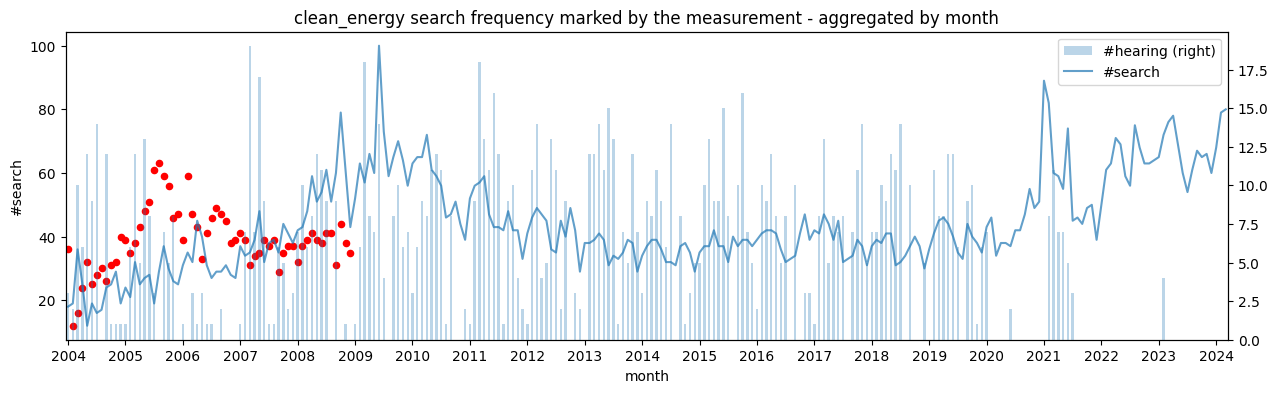

In [92]:
import matplotlib

marked_dates_dec = temp2[temp2['inc_dec_diff'] < 0]['month'].unique()
marked_dates_inc = temp2[temp2['inc_dec_diff'] > 0]['month'].unique()
search_marked_inc = clean_energy_search[clean_energy_search['month'].isin(marked_dates_inc)]
search_marked_dec = clean_energy_search[clean_energy_search['month'].isin(marked_dates_dec)]

fig, ax = plt.subplots()

search_marked_inc.reset_index().plot.scatter(x='index', y='#search',c='r',ax=ax)
merged_clean.plot.bar(x='month',y='#hearing',figsize=(15,4), alpha=0.3, ax=ax,secondary_y=True,xticks=range(len(merged_clean['year']))[::12])
merged_clean.plot(x='month',y='#search',figsize=(15,4), alpha=0.7, ax=ax, use_index=False)
# search_marked_inc.plot.scatter(x='month', y='#search',c='r',ax=ax)
# search_marked_dec.plot(x='month', y='#search',kind='scatter',c='g',ax=ax)

# search_marked_inc.reset_index().plot.scatter(x = 'index', y = '#search',c='r',ax=ax,use_index=False)
# search_marked_dec.reset_index().plot.scatter(x = 'index', y = '#search',c='g',ax=ax,use_index=False)
ax.set_xticklabels(merged_clean['year'][::12])
plt.title('clean_energy search frequency marked by the measurement - aggregated by month')
plt.show()

## fossil fuel

In [18]:
fossil_fuel_search = pd.read_csv('/home/congress-user/data_collection/search_data/fossil_fuel_search.csv')
fossil_fuel_search = fossil_fuel_search.iloc[1:]
fossil_fuel_search = fossil_fuel_search.rename(columns={'Category: All categories':'#search'})
fossil_fuel_search['month'] = pd.to_datetime(fossil_fuel_search.index).to_period('M')
fossil_fuel_search['#search'] = fossil_fuel_search['#search'].astype(int)
fossil_fuel_search

#search    month
2004-01       40  2004-01
2004-02       50  2004-02
2004-03       62  2004-03
2004-04       58  2004-04
2004-05       54  2004-05
...          ...      ...
2023-11       76  2023-11
2023-12       70  2023-12
2024-01       92  2024-01
2024-02       90  2024-02
2024-03       75  2024-03

[243 rows x 2 columns]

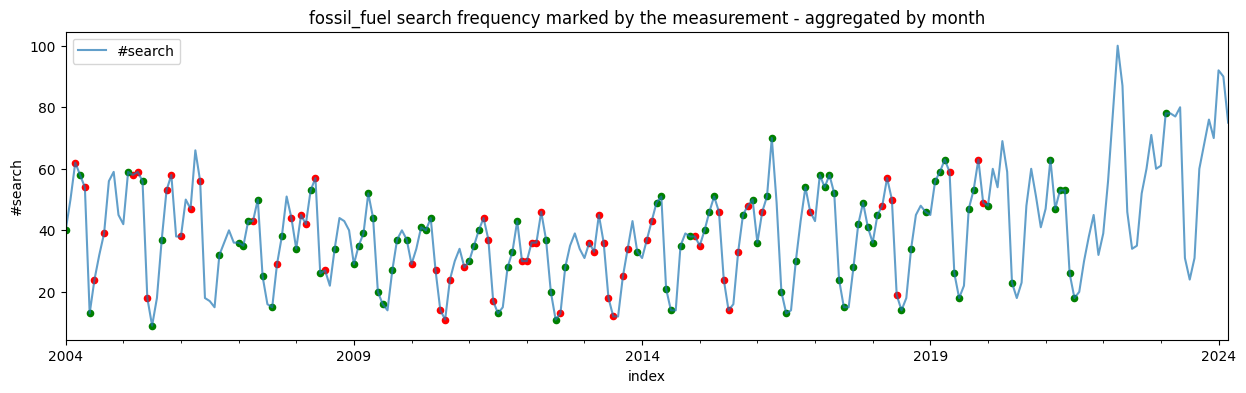

In [20]:
marked_dates_dec = temp2[temp2['inc_dec_diff'] < 0]['month'].unique()
marked_dates_inc = temp2[temp2['inc_dec_diff'] > 0]['month'].unique()
search_marked_inc = fossil_fuel_search[fossil_fuel_search['month'].isin(marked_dates_inc)]
search_marked_dec = fossil_fuel_search[fossil_fuel_search['month'].isin(marked_dates_dec)]

ax = fossil_fuel_search.plot(x='month',y='#search',figsize=(15,4), alpha=0.7)
# search_marked_inc.plot(x='month', y='#search',kind='scatter',c='r',ax=ax)
# search_marked_dec.plot(x='month', y='#search',kind='scatter',c='g',ax=ax)
search_marked_inc.reset_index().plot.scatter(x = 'index', y = '#search',c='r',ax=ax)
search_marked_dec.reset_index().plot.scatter(x = 'index', y = '#search',c='g',ax=ax)
plt.title('fossil_fuel search frequency marked by the measurement - aggregated by month')
plt.show()

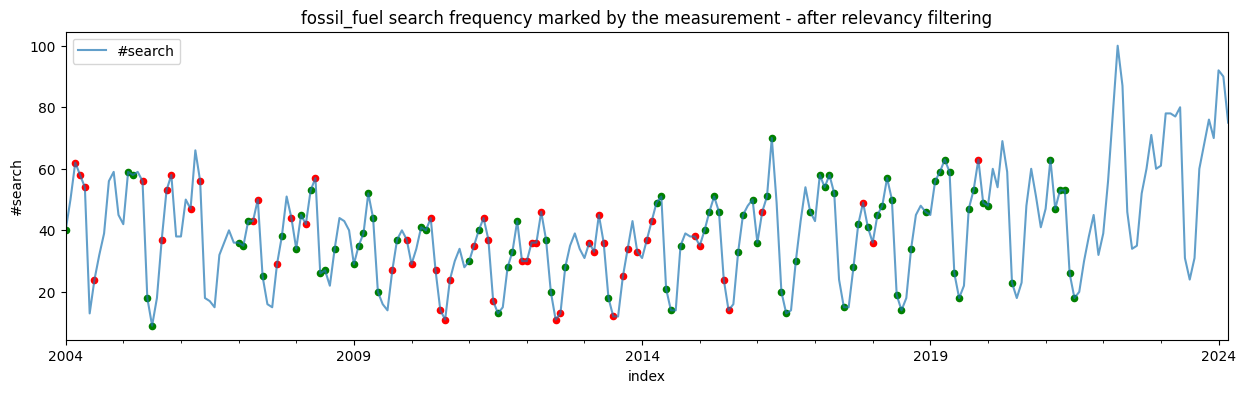

In [174]:
marked_dates_dec = temp3[temp3['inc_dec_diff'] < 0]['month'].unique()
marked_dates_inc = temp3[temp3['inc_dec_diff'] > 0]['month'].unique()
search_marked_inc = fossil_fuel_search[fossil_fuel_search['month'].isin(marked_dates_inc)]
search_marked_dec = fossil_fuel_search[fossil_fuel_search['month'].isin(marked_dates_dec)]

ax = fossil_fuel_search.plot(x='month',y='#search',figsize=(15,4), alpha=0.7)
# search_marked_inc.plot(x='month', y='#search',kind='scatter',c='r',ax=ax)
# search_marked_dec.plot(x='month', y='#search',kind='scatter',c='g',ax=ax)
search_marked_inc.reset_index().plot.scatter(x = 'index', y = '#search',c='r',ax=ax)
search_marked_dec.reset_index().plot.scatter(x = 'index', y = '#search',c='g',ax=ax)
plt.title('fossil_fuel search frequency marked by the measurement - after relevancy filtering')
plt.show()

In [220]:
fossil_fuel_search['quarter'] = pd.to_datetime(fossil_fuel_search.index).to_period('Q')
fossil_fuel_search

#search    month quarter
2004-01       40  2004-01  2004Q1
2004-02       50  2004-02  2004Q1
2004-03       62  2004-03  2004Q1
2004-04       58  2004-04  2004Q2
2004-05       54  2004-05  2004Q2
...          ...      ...     ...
2023-11       76  2023-11  2023Q4
2023-12       70  2023-12  2023Q4
2024-01       92  2024-01  2024Q1
2024-02       90  2024-02  2024Q1
2024-03       75  2024-03  2024Q1

[243 rows x 3 columns]

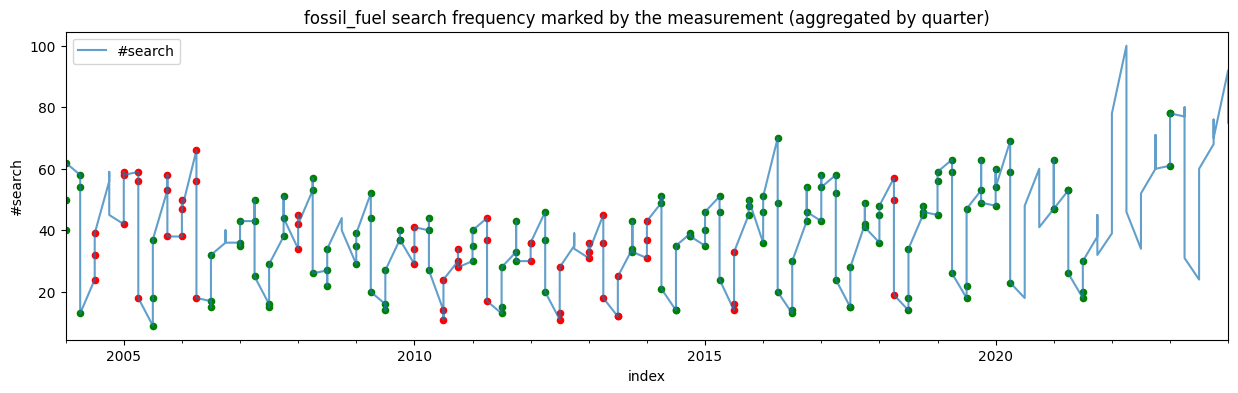

In [221]:
marked_dates_dec = temp4[temp4['inc_dec_diff'] < 0]['quarter'].unique()
marked_dates_inc = temp4[temp4['inc_dec_diff'] > 0]['quarter'].unique()
search_marked_inc = fossil_fuel_search[fossil_fuel_search['quarter'].isin(marked_dates_inc)]
search_marked_dec = fossil_fuel_search[fossil_fuel_search['quarter'].isin(marked_dates_dec)]

ax = fossil_fuel_search.plot(x='quarter',y='#search',figsize=(15,4), alpha=0.7)
# search_marked_inc.plot(x='month', y='#search',kind='scatter',c='r',ax=ax)
# search_marked_dec.plot(x='month', y='#search',kind='scatter',c='g',ax=ax)
search_marked_inc.reset_index().plot.scatter(x = 'index', y = '#search',c='r',ax=ax)
search_marked_dec.reset_index().plot.scatter(x = 'index', y = '#search',c='g',ax=ax)
plt.title('fossil_fuel search frequency marked by the measurement (aggregated by quarter)')
plt.show()